<!-- Notebook Header Start -->

<h1 align="center">Changes to Noxious Stimuli by means of Dorsal Root Ganglion Stimulation</h1>

<p align="center">
  <strong>Author:</strong> Karl Bates<br>
  <strong>Date:</strong> 2024-12-06<br>
  <strong>Affiliation:</strong> Carnegie Mellon University, Cohen-Karni Lab  || Neuromechatronics Lab
</p>

---


## 📊 Notebook Outline

* **Importing libraries & data**
* **Preprocess neurophysiology recordings for spike sorting**
* **Package preprocessed data for spike sorting using Kilosort4**
* **Run Kilosort to extract spike activity**
* **Calculate average firing rate of each cluster during noxious stimuli**
* **Compare the firing rates of clusters before and after noxious stimuli**

## 📚 References & Additional Resources

- [Kilosort4 docs](https://github.com/MouseLand/Kilosort/tree/main)
- [SpikeInterface docs](https://github.com/SpikeInterface)

---

<!-- Notebook Header End -->


# ➡ Importing Libraries & Data
---

In [1]:
# standard imports
from pathlib import Path
import os
from kilosort import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# custom imports
from automations import RM1
from automations import SpikeInterface_wrapper
from automations import Kilosort_wrapper
from automations import plots
from automations import analysis_functions

### probe definition

Using the spreadsheet, `Adapter_pinout.xlsx`, the contact ID's can be traced to the "device channel", and we can assign them on the probe. 

In this case, our channel indices correspond to the aux inputs to the intan headstage.

refer to the notebook, `RM1_pipeline.ipynb` within  the `dev_notebook` folder

In [2]:
PROBE_DIRECTORY = Path(r'D:\Data\CMU.80 Data\88 Analyzed Data\88.009 A1x32-Edge-5mm-20-177-A32 _charlie\A1x32-Edge-5mm-20-177-A32.prb')

### filepath definitions

In [3]:
# NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
# in this case, the data is saved in a folder with multiple rats
DATA_DIRECTORY = Path(fr'D:\Data\CMU.80 Data\82 External Data\82.002 Sample Rat Data from RM1 Project')  
# Create path if it doesn't exist
DATA_DIRECTORY.mkdir(parents=True, exist_ok=True)

# NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
# save data to the inbox; make sure that the folders: binary & figures exist
SAVE_DIRECTORY_DW322 = Path(fr'D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322') 
SAVE_DIRECTORY_DW323 = Path(fr'D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323') 
SAVE_DIRECTORY_DW327 = Path(fr'D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW327') 
# Create paths if they don't exist
SAVE_DIRECTORY_DW322.mkdir(parents=True, exist_ok=True)
SAVE_DIRECTORY_DW323.mkdir(parents=True, exist_ok=True)
SAVE_DIRECTORY_DW327.mkdir(parents=True, exist_ok=True)


# 📈 Preprocess data using SpikeInterface

This is used to determine which trial is most likely to produce good units in a spike sorting analysis

---

### 🐀 importing the rat

In [4]:
DW322 = RM1.Rat(DATA_DIRECTORY, PROBE_DIRECTORY, "DW322")
DW323 = RM1.Rat(DATA_DIRECTORY, PROBE_DIRECTORY, "DW323")
DW327 = RM1.Rat(DATA_DIRECTORY, PROBE_DIRECTORY, "DW327")

Reading DRGS_10_240918_140034...
Error reading stream 2 for DRGS_10_240918_140034. continuing...
Reading DRGS_11_240918_140803...
Error reading stream 2 for DRGS_11_240918_140803. continuing...
Reading DRGS_12_240918_141655...
Error reading stream 2 for DRGS_12_240918_141655. continuing...
Reading DRGS_1_240918_125448...
Error reading stream 2 for DRGS_1_240918_125448. continuing...
Reading DRGS_2_240918_130024...
Error reading stream 2 for DRGS_2_240918_130024. continuing...
Reading DRGS_3_240918_130835...
Error reading stream 2 for DRGS_3_240918_130835. continuing...
Reading DRGS_4_240918_131552...
Error reading stream 2 for DRGS_4_240918_131552. continuing...
Reading DRGS_5_240918_132233...
Error reading stream 2 for DRGS_5_240918_132233. continuing...
Reading DRGS_6_240918_132920...
Error reading stream 2 for DRGS_6_240918_132920. continuing...
Reading DRGS_7_240918_133719...
Error reading stream 2 for DRGS_7_240918_133719. continuing...
Reading DRGS_8_240918_134529...
Error readin

### 📄 metadata

#### DW322

In [5]:
DW322.qst_experiment_notes

'd1 tl, d2 am sync, a1 am monitor,a2 evf'

In [6]:
DW322.qst_trial_notes

5            Trial Number Condition amp PW (us) Freq. (Hz) drgDur. (s)  \
Trial Number                                                             
1                       1        VF  51     300          5         180   
2                       2        VF  51     300         20         180   
3                       3        VF  51     300        100         180   
4                       4        VF  51     300        100         180   
5                       5        VF  51     300          5         180   
6                       6        VF  51     300         20         180   
7                       7        VF  51     300          5         180   
8                       8        VF  51     300        100         180   
9                       9        VF  51     300         20         180   

5            Stimuli temp Stimuli Dur.                          NaN  
Trial Number                                                         
1                 vf  NaN            30  accidentally named DRGS_13  
2                 vf  NaN            30                         NaN  
3                 vf  NaN            30                         NaN  
4                 vf  NaN            30                         NaN  
5                 vf  NaN            30                         NaN  
6                 vf  NaN            30                         NaN  
7                 vf  NaN            30                         NaN  
8                 vf  NaN            30                         NaN  
9                 vf  NaN            30                         NaN

#### DW323

In [7]:
DW323.qst_experiment_notes

'd1 tl, d2 am sync, a1 am monitor,a2 evf'

In [8]:
DW323.qst_trial_notes

5            Trial Number Condition  amp PW (us) Freq. (Hz) drgDur. (s)  \
Trial Number                                                              
1                       1        VF   70     300          5         180   
2                       2        VF   70     300         20         180   
3                       3        VF   70     300        100         180   
4                       4        VF   70     300        100         180   
5                       5        VF   70     300          5         180   
6                       6        VF   70     300         20         180   
1                       1       QST   70     300        100         180   
2                       2       QST   70     300          5         180   
3                       3       NaN  NaN     NaN        NaN         NaN   
4                       4       NaN  NaN     NaN        NaN         NaN   
5                       5       NaN  NaN     NaN        NaN         NaN   

5            Stimuli temp Stimuli Dur.     NaN                        NaN  
Trial Number                                                               
1                 vf  NaN            30  pos 1  pad just prximal from toe  
2                 vf  NaN            30  pos 1                        NaN  
3                 vf  NaN            30  pos 1                        NaN  
4                 vf  NaN            30  pos 2                       toes  
5                 vf  NaN            30  pos 2                        NaN  
6                 vf  NaN            30  pos 2                        NaN  
1                QST   52      5s at 60    NaN                        NaN  
2                QST   52      5s at 60    NaN                        NaN  
3                NaN  NaN           NaN    NaN                        NaN  
4                NaN  NaN           NaN    NaN                        NaN  
5                NaN  NaN           NaN    NaN                        NaN

#### DW327

In [9]:
DW327.qst_experiment_notes

'd1 tl, d2 am sync, a1 am monitor,a2 evf'

In [10]:
DW327.qst_trial_notes

5            Trial Number Condition amp PW (us) Freq. (Hz) drgDur. (s)  \
Trial Number                                                             
1                       1        vf  63     300          5         180   
2                       2       NaN  63     300        100         180   
3                       3       NaN  63     300        100         180   
4                       4       NaN  63     300          5         180   
5                       5       NaN  63     300         20         180   
6                       6       NaN  63     300         20         180   
7                       7       NaN  63     300          5         180   
8                       8       NaN  63     300        100         180   
9                       9       NaN  63     300        100         180   
10                     10       NaN  63     300          5         180   

5            Stimuli temp Stimuli Dur.   
Trial Number                             
1                 vf  NaN     pp dur 30  
2                 vf  NaN           paw  
3                 vf  NaN           paw  
4                 vf  NaN           paw  
5                 vf  NaN           paw  
6                 vf  NaN           paw  
7                 vf  NaN           toe  
8                 vf  NaN           toe  
9                 vf  NaN           paw  
10                vf  NaN           paw

### ↩ preprocess spinal cord data & export results to binary

⚠ !!this section is commented out, since I already have this done!!
I don't remove

preprocess

In [11]:
DW322.get_sc_data()
DW322.get_analog_data()
DW322.remove_drg_stim_window_sc()
DW322.remove_drg_stim_window_analog()

DW323.get_sc_data()
DW323.get_analog_data()
DW323.remove_drg_stim_window_sc()
DW323.remove_drg_stim_window_analog()

DW327.get_sc_data()
DW327.get_analog_data()
DW327.remove_drg_stim_window_sc()
DW327.remove_drg_stim_window_analog()

Error processing nn_seond_insertion_240911_144433: 'end_frame' must be fewer than number of samples in parent: 809728
Error processing nn_seond_insertion_240911_144433: 'end_frame' must be fewer than number of samples in parent: 809728


export to binary

DW322

In [12]:
signals_DW322 = SpikeInterface_wrapper(DW322, SAVE_DIRECTORY_DW322)
# trials = ["VF_1_240918_143256",
#           "VF_2_240918_143936",
#           "VF_3_240918_144658",
#           "VF_4_240918_145638",
#           "VF_5_240918_150137",
#           "VF_6_240918_150811",
#           "VF_7_240918_151516",
#           "VF_8_240918_152056",
#           "VF_9_240918_152753"]
# signals_DW322.save_spinalcord_data_to_binary(TRIAL_NAMES=trials)

Preparing SpikeInterface wrapper for rat DW322


DW323

In [13]:
signals_DW323 = SpikeInterface_wrapper(DW323, SAVE_DIRECTORY_DW323)
# trials = ["VF_1_240911_164342",
#           "VF_2_240911_165039",
#           "VF_3_240911_165617",
#           "VF_4_240911_170446",
#           "VF_5_240911_171014",
#           "VF_6_240911_171505",
#           "VF_7_240911_180931"]
# signals_DW323.save_spinalcord_data_to_binary(TRIAL_NAMES=trials)

Preparing SpikeInterface wrapper for rat DW323


DW327

In [14]:
signals_DW327 = SpikeInterface_wrapper(DW327, SAVE_DIRECTORY_DW327)
# trials = ["VF_1_241125_153746",
#           "VF_2_241125_154307",
#           "VF_3_241125_154841",
#           "VF_4_241125_155417",
#           "VF_5_241125_155941",
#           "VF_6_241125_160515",
#           "VF_7_241125_161126",
#           "VF_8_241125_161626",
#           "VF_9_241125_162141",
#           "VF_10_241125_162725"
#         ]
# signals_DW327.save_spinalcord_data_to_binary(TRIAL_NAMES=trials)

Preparing SpikeInterface wrapper for rat DW327


# 🧠 Extract spikes with Kilosort4, import the results back into Python for analysis

⚠ !!this section is commented out, since I already have this done!!

---

In [15]:
def my_custom_criteria(cluster_labels, st, clu, est_contam_rate, fs):
    # Example criteria: Contamination rate < 0.1 and firing rate between 0.5 and 50 Hz
    contam_good = est_contam_rate < 0.2
    fr_good = np.zeros(cluster_labels.size, dtype=bool)
    for i, c in enumerate(cluster_labels):
        spikes = st[clu == c]
        fr = spikes.size / ((spikes.max() - spikes.min()) / fs)
        if 0.5 <= fr <= 50:
            fr_good[i] = True
    return np.logical_and(contam_good, fr_good)

Preparing Kilosort wrapper...
|
|
|
|
|
|
Running kilosort on DRGS_10_240918_140034
|
|
|
|
|
|


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\DRGS_10_240918_140034\DW322_DRGS_10_240918_140034_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -----------------------------

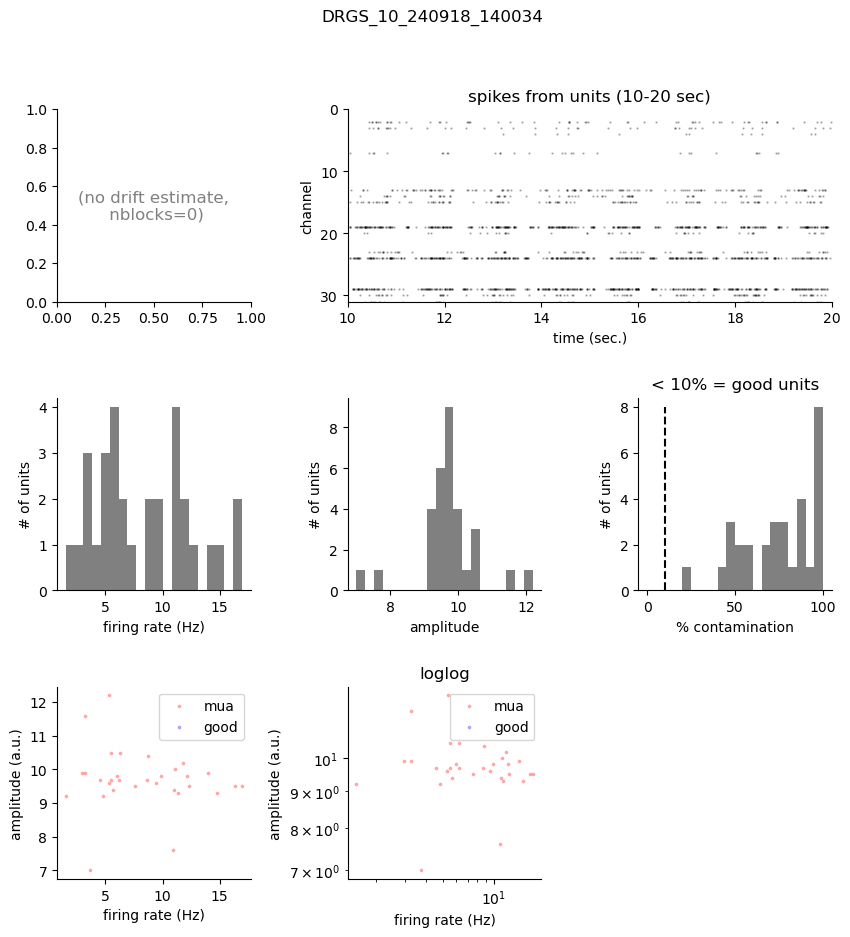

ERROR: could not plot units for DRGS_10_240918_140034, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\DRGS_11_240918_140803\DW322_DRGS_11_240918_140803_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -----------------------------

ERROR: could not plot units for DRGS_10_240918_140034, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_10_240918_140034
|
|
|
|
|
|
Running kilosort on DRGS_11_240918_140803
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  1.14s; total  1.14s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     9.00 %
kilosort.run_kilosort: Memory:       87.59 %     |     41.98   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.35 %     |      4.03   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

<Figure size 1800x450 with 0 Axes>

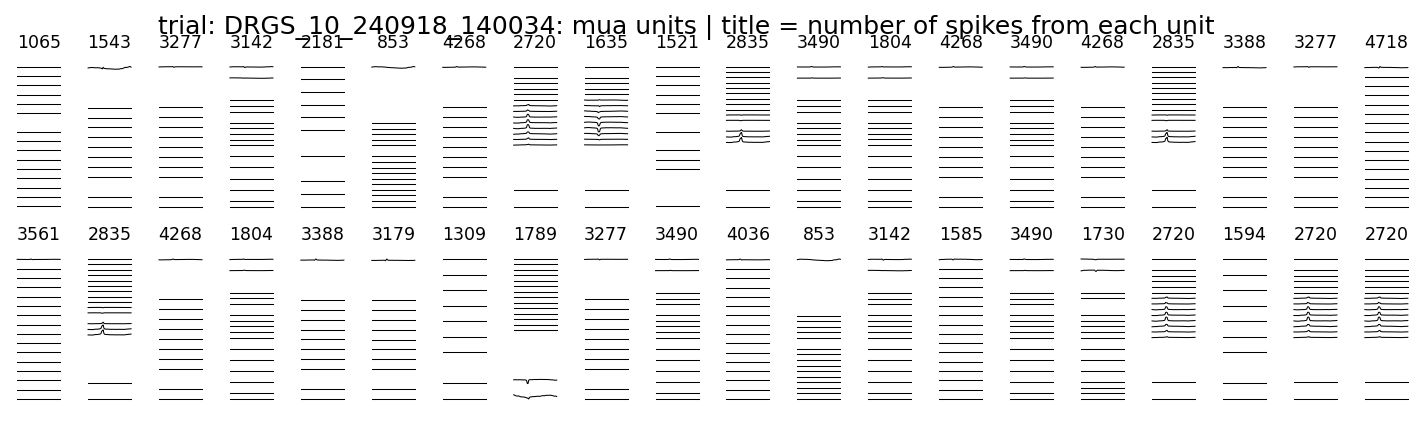

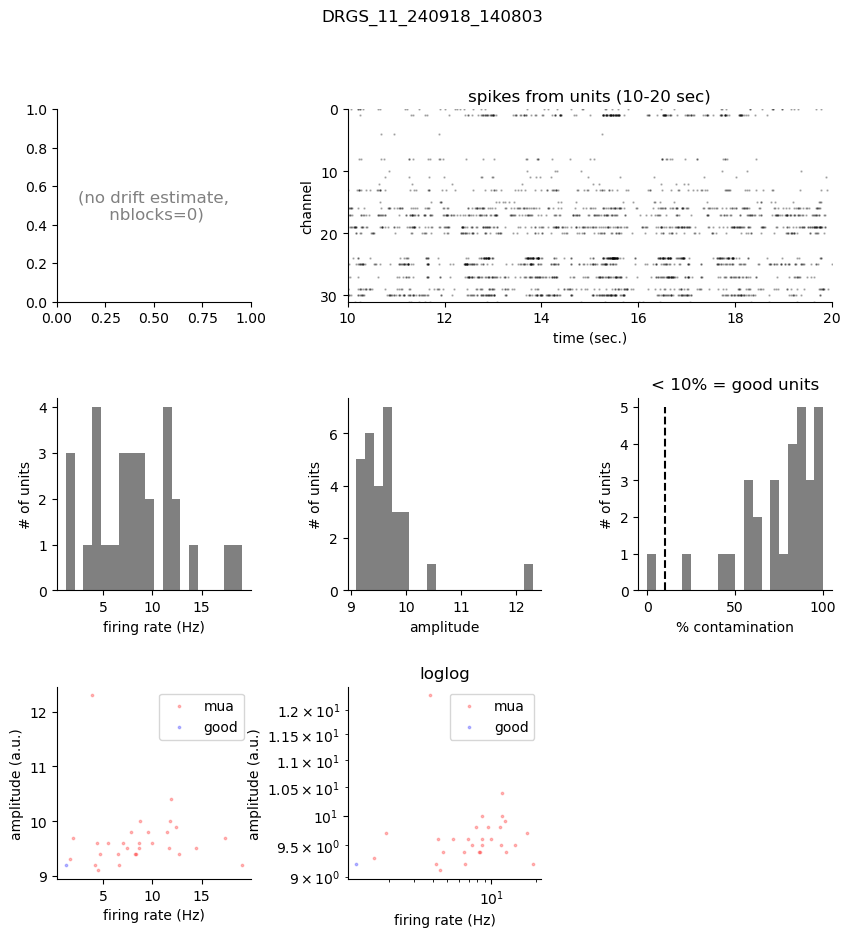

ERROR: could not plot units for DRGS_11_240918_140803, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\DRGS_12_240918_141655\DW322_DRGS_12_240918_141655_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -----------------------------

ERROR: could not plot units for DRGS_11_240918_140803, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_11_240918_140803
|
|
|
|
|
|
Running kilosort on DRGS_12_240918_141655
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  1.12s; total  1.12s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    12.50 %
kilosort.run_kilosort: Memory:       87.10 %     |     41.75   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.39 %     |      4.03   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

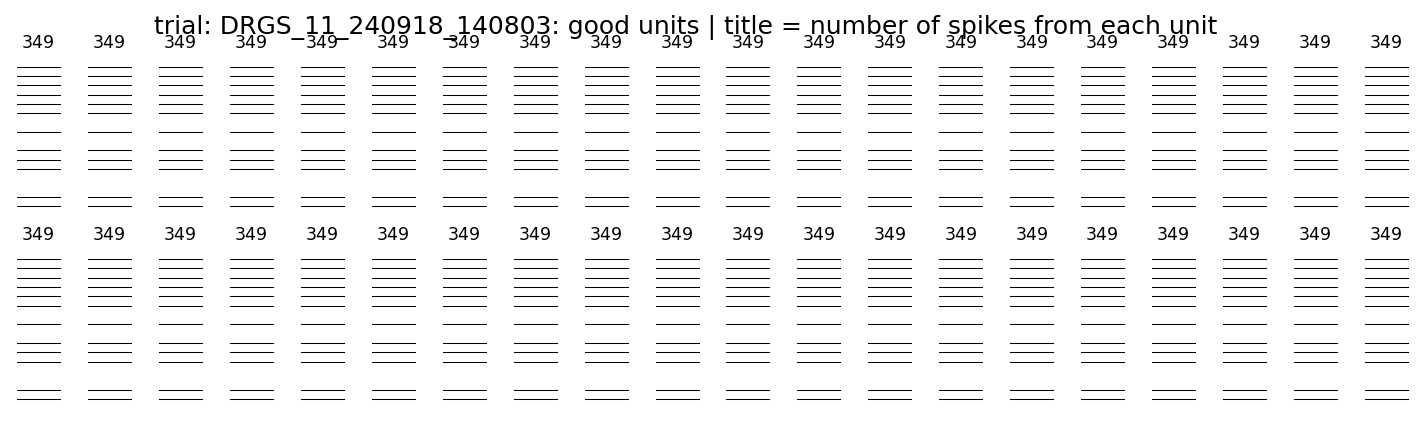

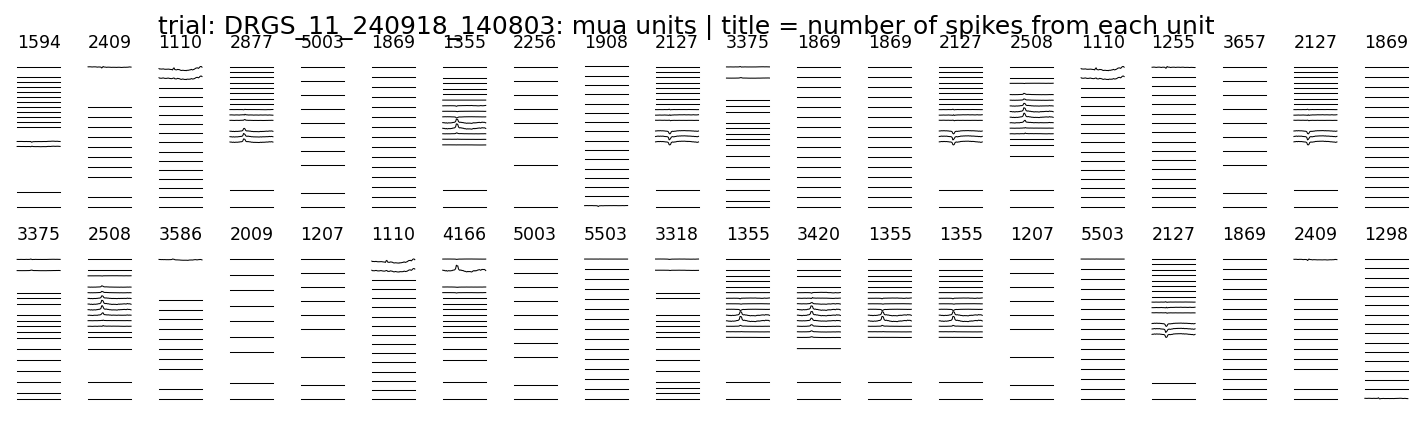

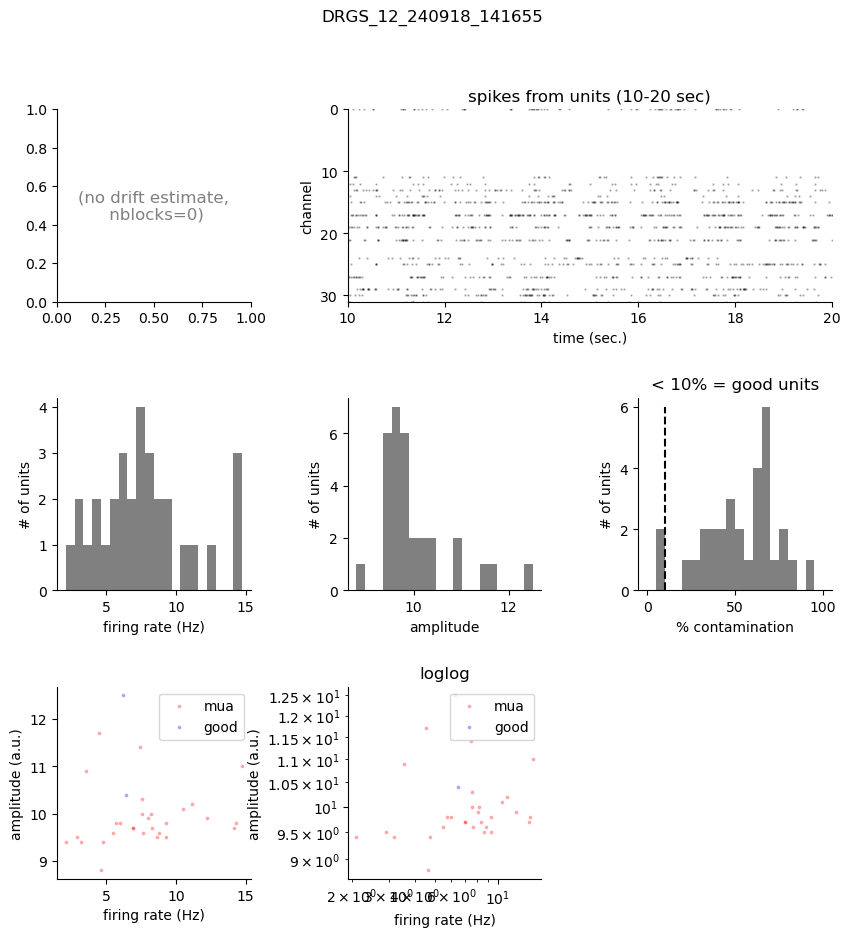

ERROR: could not plot units for DRGS_12_240918_141655, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\DRGS_1_240918_125448\DW322_DRGS_1_240918_125448_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------

ERROR: could not plot units for DRGS_12_240918_141655, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_12_240918_141655
|
|
|
|
|
|
Running kilosort on DRGS_1_240918_125448
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  3.27s; total  3.28s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    15.80 %
kilosort.run_kilosort: Memory:       87.25 %     |     41.82   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.40 %     |      4.03   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

<Figure size 1800x450 with 0 Axes>

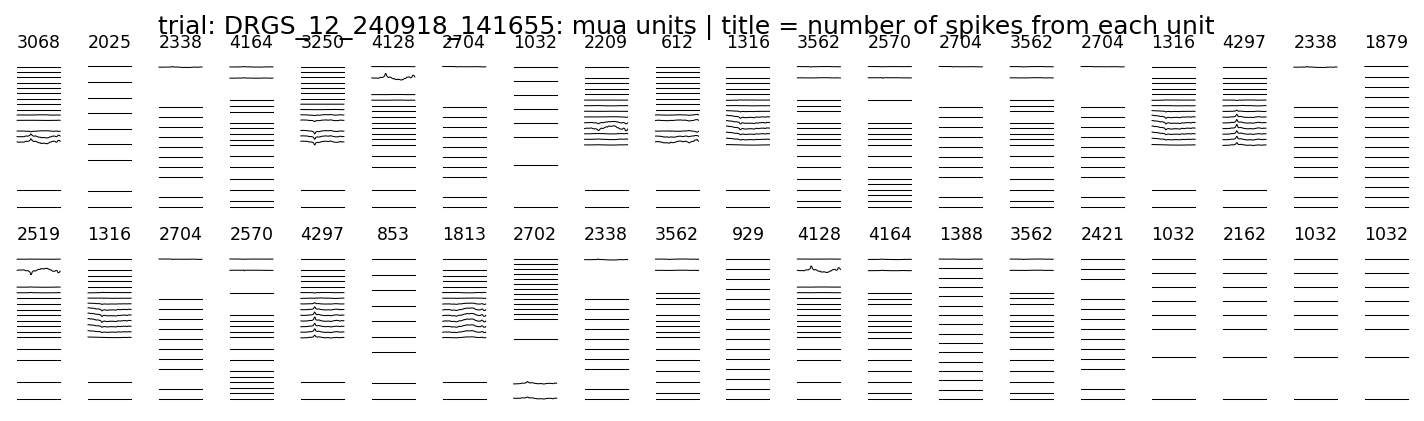

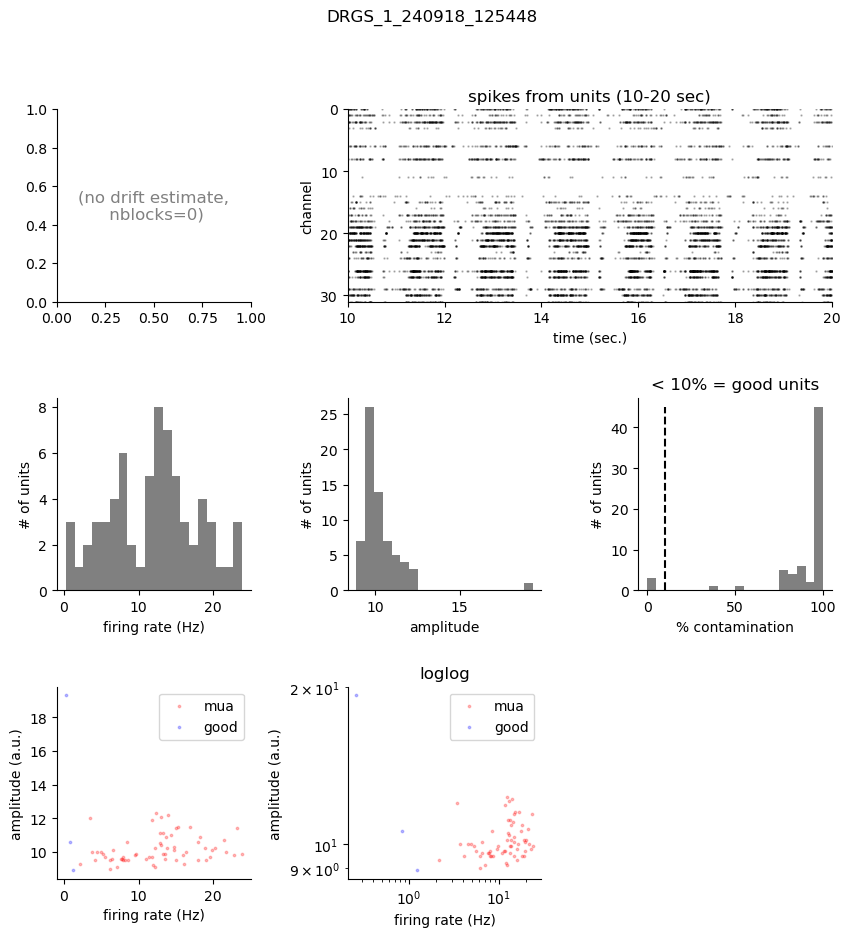

ERROR: could not plot units for DRGS_1_240918_125448, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\DRGS_2_240918_130024\DW322_DRGS_2_240918_130024_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------

ERROR: could not plot units for DRGS_1_240918_125448, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_1_240918_125448
|
|
|
|
|
|
Running kilosort on DRGS_2_240918_130024
|
|
|
|
|
|


kilosort.run_kilosort: N seconds: 258.3466666666667
kilosort.run_kilosort: N batches: 6
kilosort.run_kilosort: Preprocessing filters computed in  0.89s; total  0.89s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     9.10 %
kilosort.run_kilosort: Memory:       89.22 %     |     42.77   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.63 %     |      4.05   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.

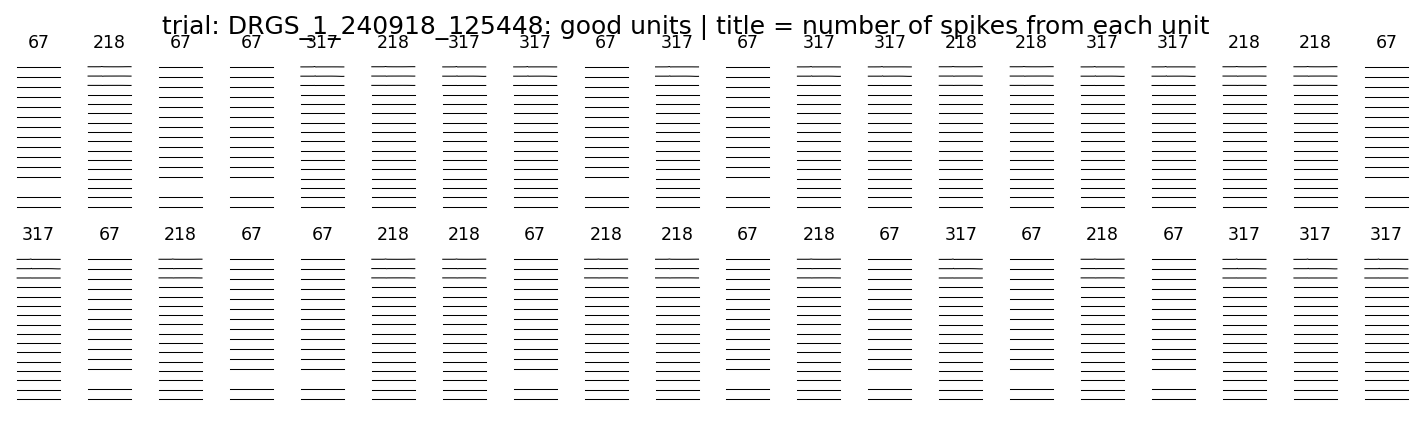

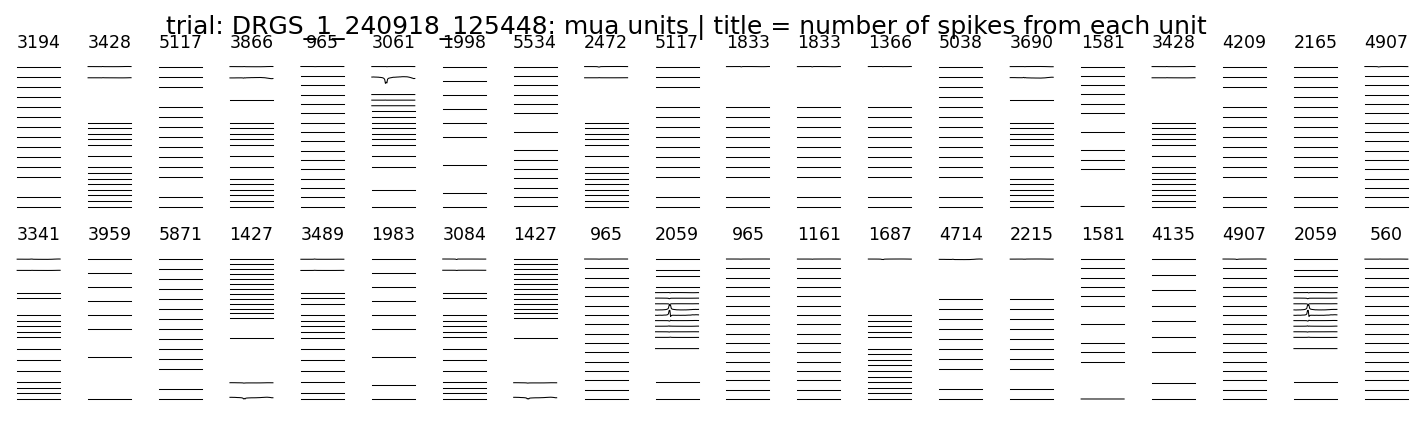

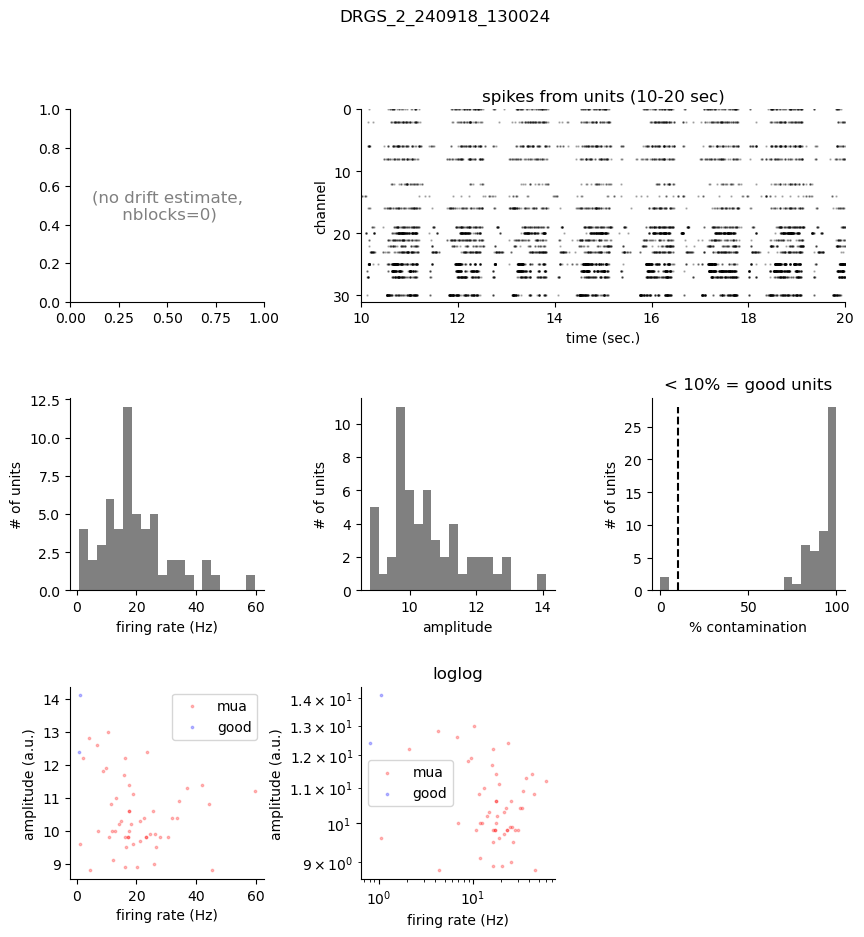

ERROR: could not plot units for DRGS_2_240918_130024, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20


ERROR: could not plot units for DRGS_2_240918_130024, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_2_240918_130024
|
|
|
|
|
|
Running kilosort on DRGS_3_240918_130835
|
|
|
|
|
|


kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\DRGS_3_240918_130835\DW322_DRGS_3_240918_130835_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: N samples: 784

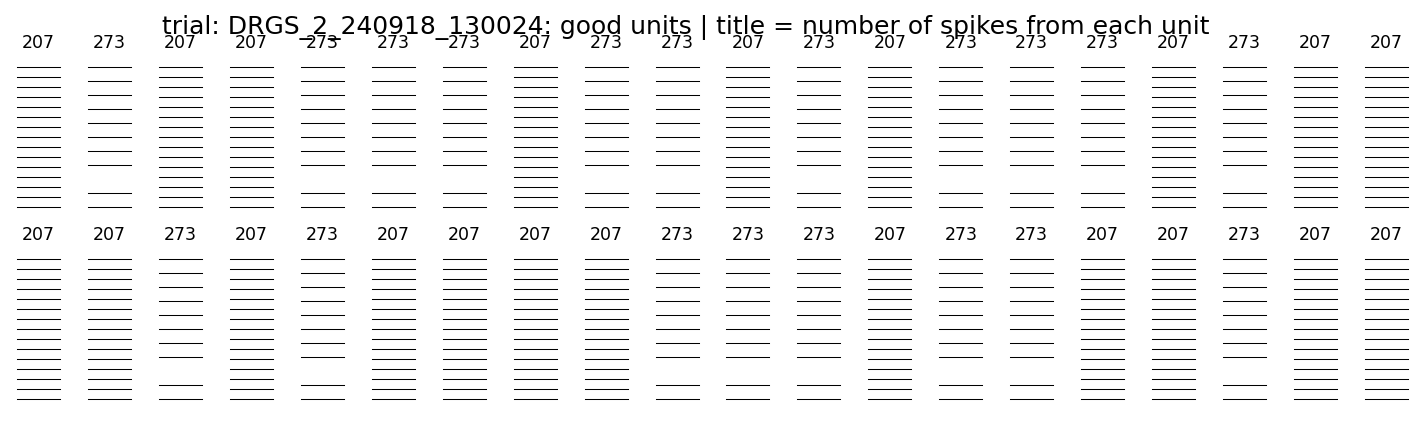

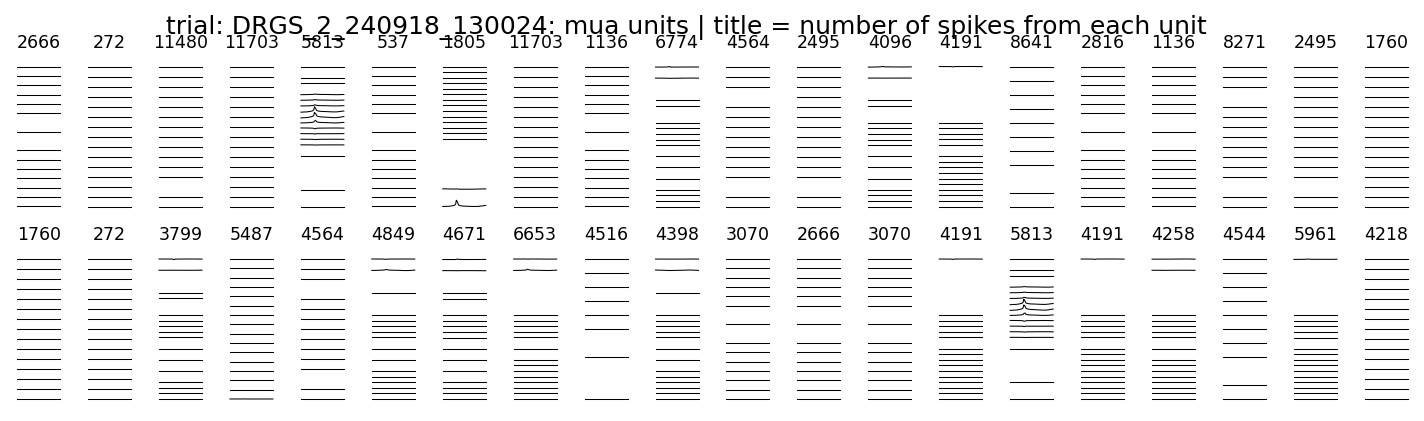

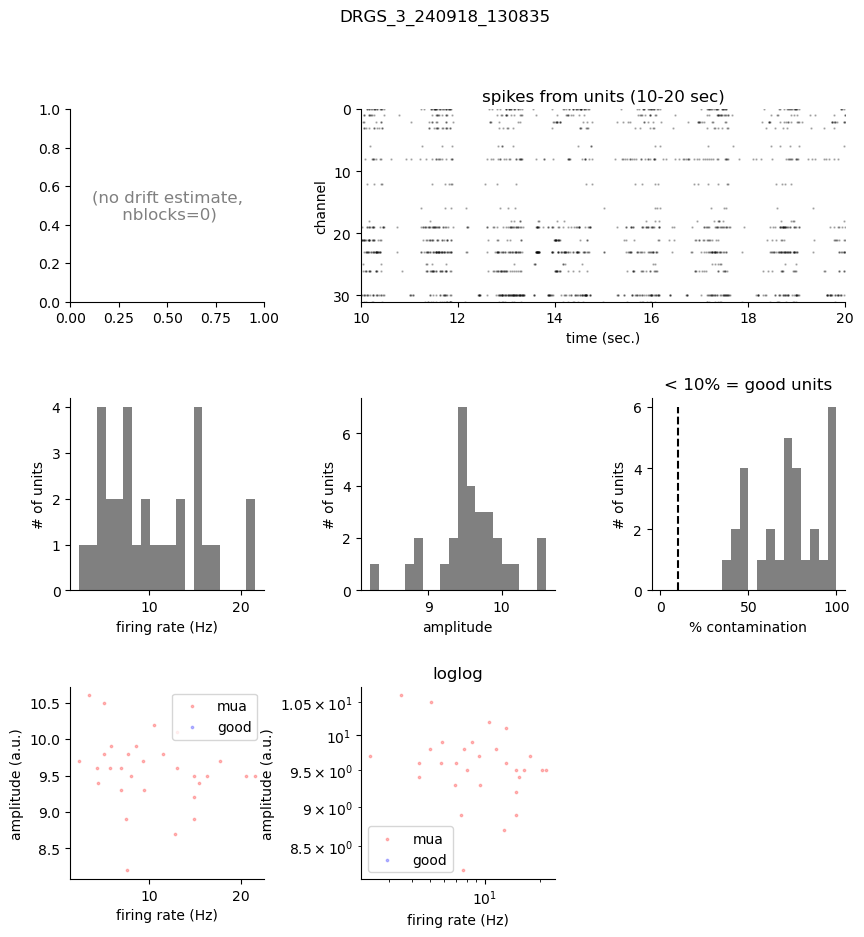

ERROR: could not plot units for DRGS_3_240918_130835, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\DRGS_4_240918_131552\DW322_DRGS_4_240918_131552_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------

ERROR: could not plot units for DRGS_3_240918_130835, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_3_240918_130835
|
|
|
|
|
|
Running kilosort on DRGS_4_240918_131552
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  0.91s; total  0.92s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     8.30 %
kilosort.run_kilosort: Memory:       88.75 %     |     42.54   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.80 %     |      4.06   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

<Figure size 1800x450 with 0 Axes>

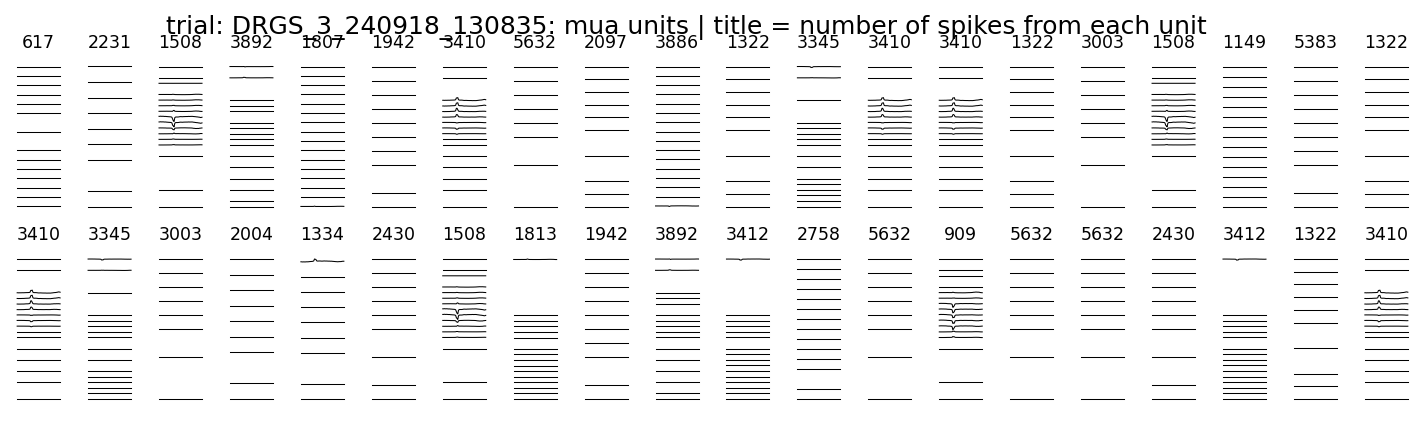

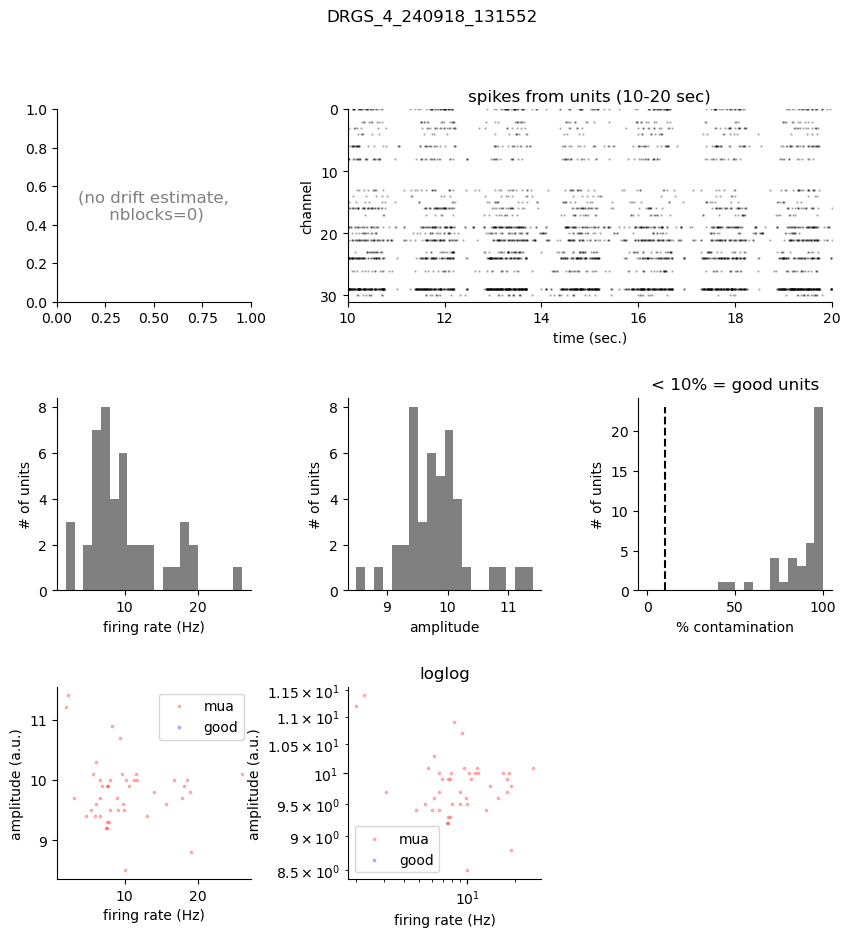

ERROR: could not plot units for DRGS_4_240918_131552, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20


ERROR: could not plot units for DRGS_4_240918_131552, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_4_240918_131552
|
|
|
|
|
|
Running kilosort on DRGS_5_240918_132233
|
|
|
|
|
|


kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\DRGS_5_240918_132233\DW322_DRGS_5_240918_132233_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: N samples: 775

<Figure size 1800x450 with 0 Axes>

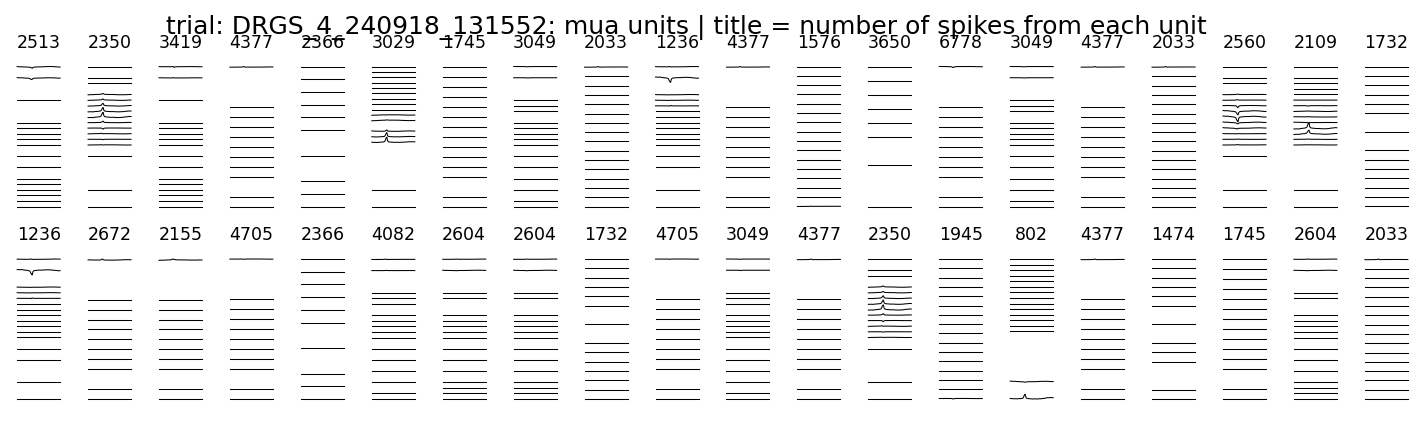

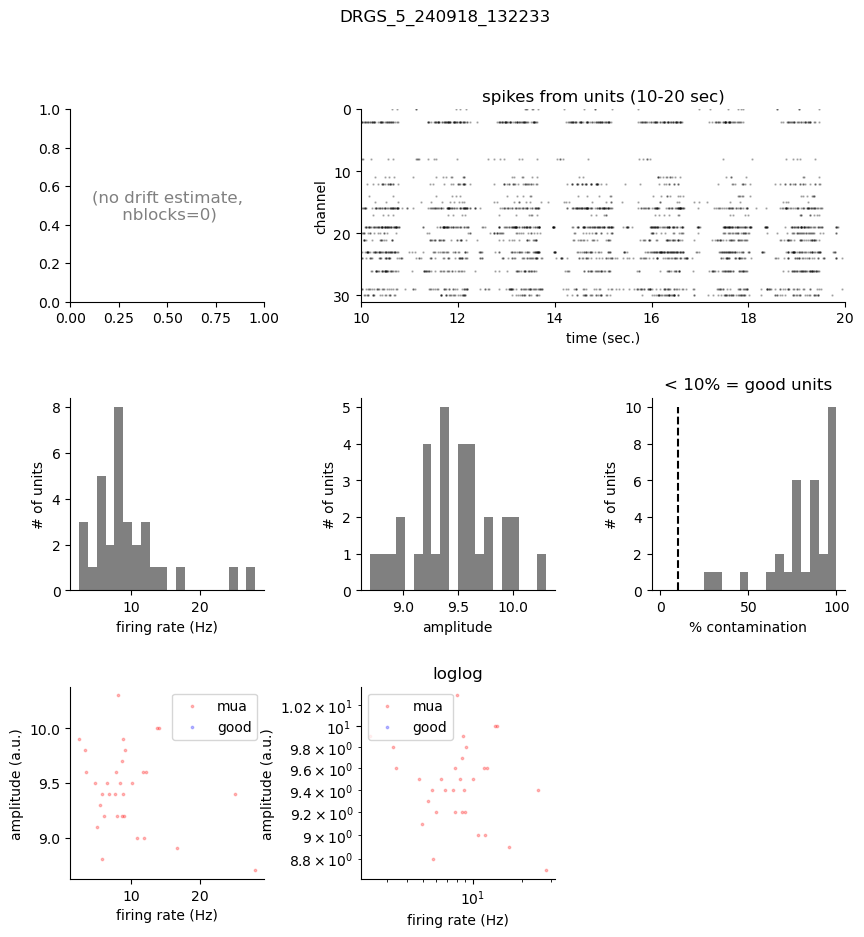

ERROR: could not plot units for DRGS_5_240918_132233, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\DRGS_6_240918_132920\DW322_DRGS_6_240918_132920_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------

ERROR: could not plot units for DRGS_5_240918_132233, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_5_240918_132233
|
|
|
|
|
|
Running kilosort on DRGS_6_240918_132920
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  0.88s; total  0.89s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     9.30 %
kilosort.run_kilosort: Memory:       88.32 %     |     42.33   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.80 %     |      4.06   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

<Figure size 1800x450 with 0 Axes>

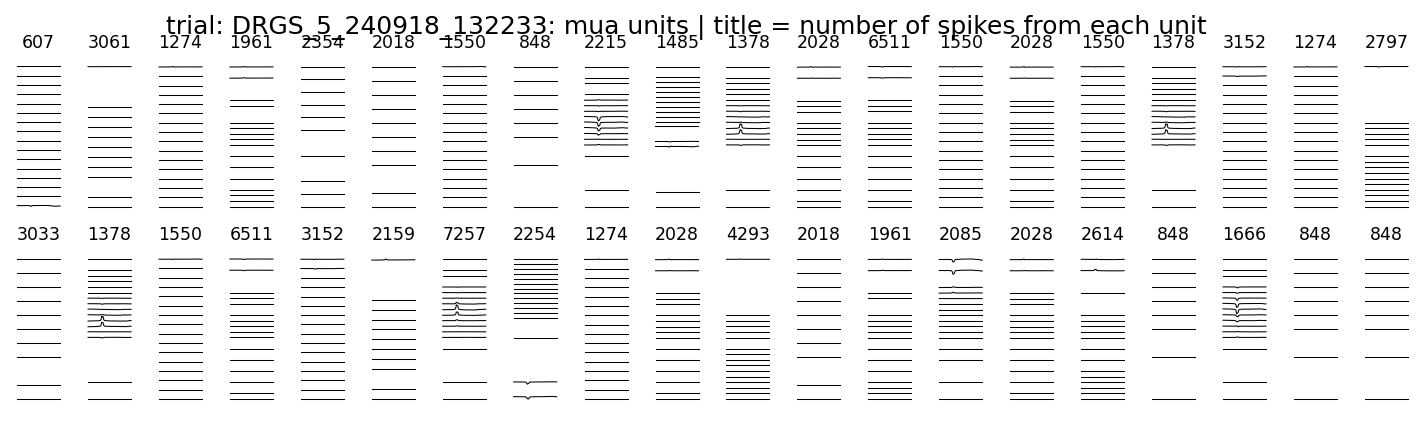

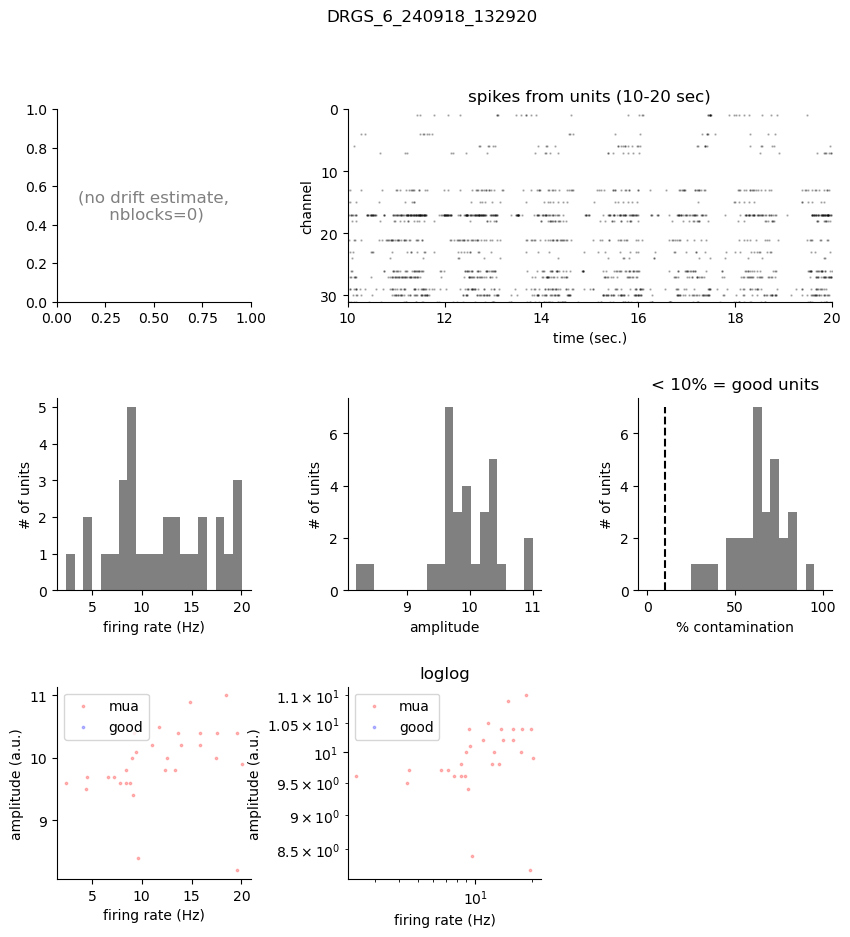

ERROR: could not plot units for DRGS_6_240918_132920, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\DRGS_7_240918_133719\DW322_DRGS_7_240918_133719_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------

ERROR: could not plot units for DRGS_6_240918_132920, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_6_240918_132920
|
|
|
|
|
|
Running kilosort on DRGS_7_240918_133719
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  0.90s; total  0.90s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     9.60 %
kilosort.run_kilosort: Memory:       88.44 %     |     42.39   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.80 %     |      4.06   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

<Figure size 1800x450 with 0 Axes>

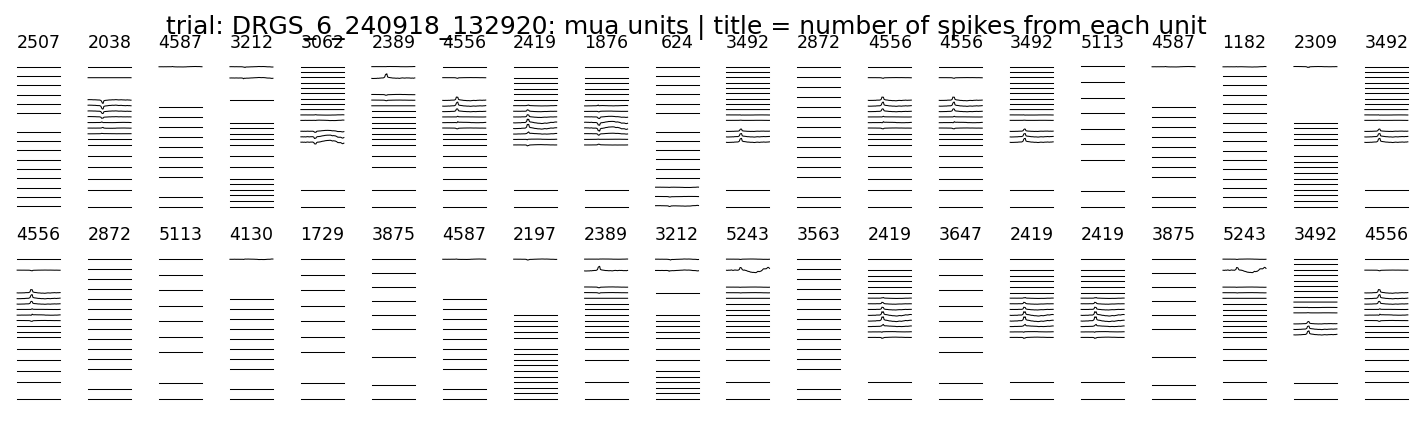

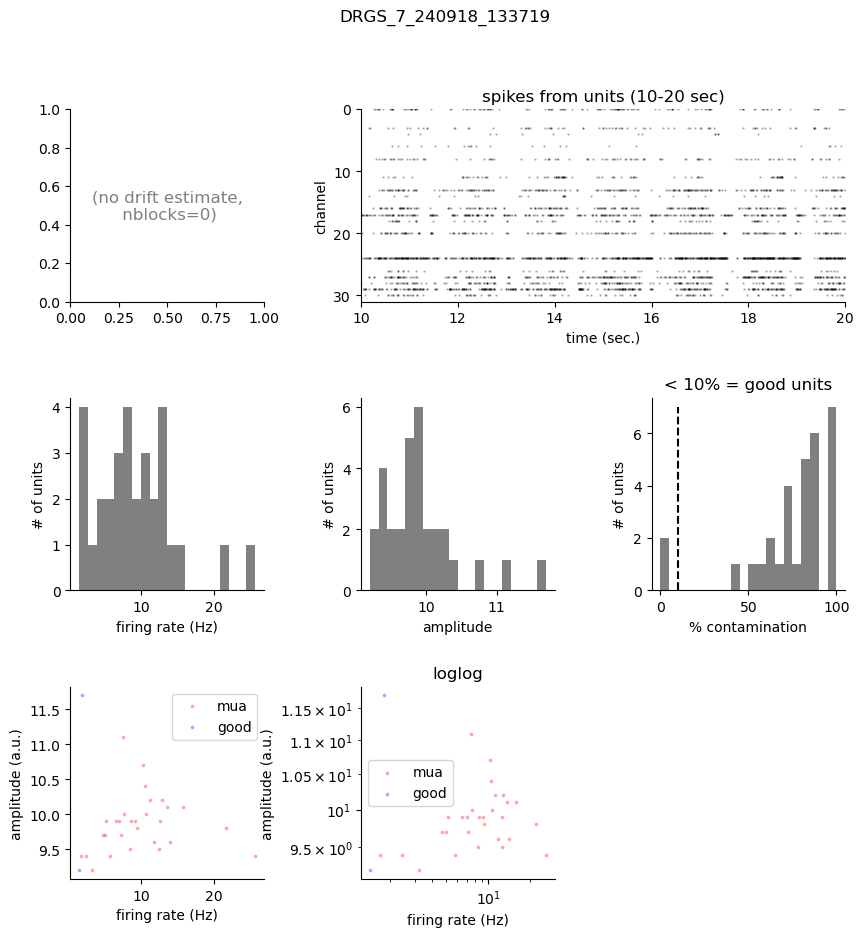

ERROR: could not plot units for DRGS_7_240918_133719, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\DRGS_8_240918_134529\DW322_DRGS_8_240918_134529_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------

ERROR: could not plot units for DRGS_7_240918_133719, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_7_240918_133719
|
|
|
|
|
|
Running kilosort on DRGS_8_240918_134529
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  0.95s; total  0.96s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    11.70 %
kilosort.run_kilosort: Memory:       88.54 %     |     42.44   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.80 %     |      4.06   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

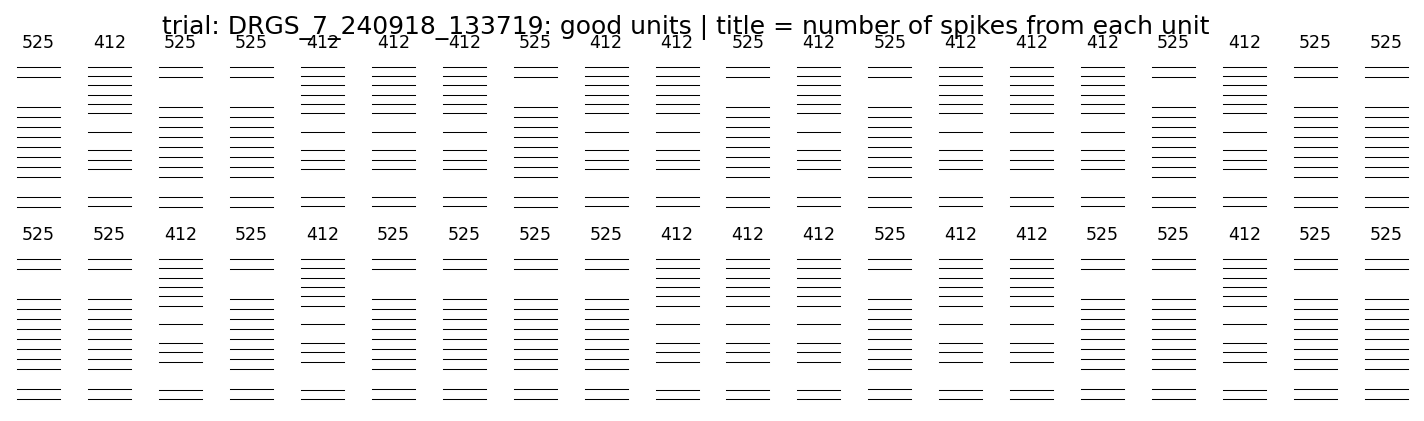

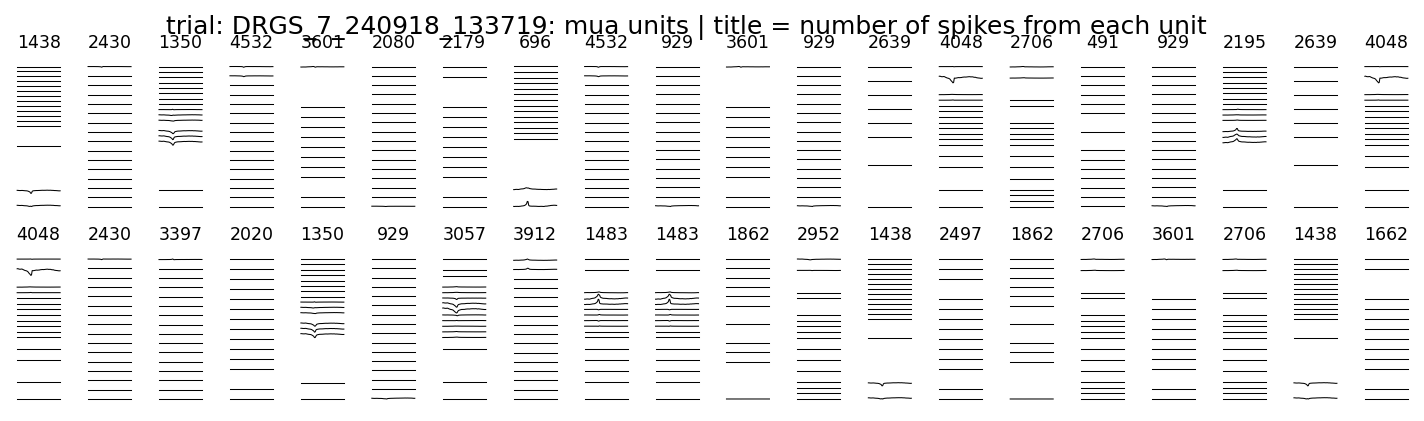

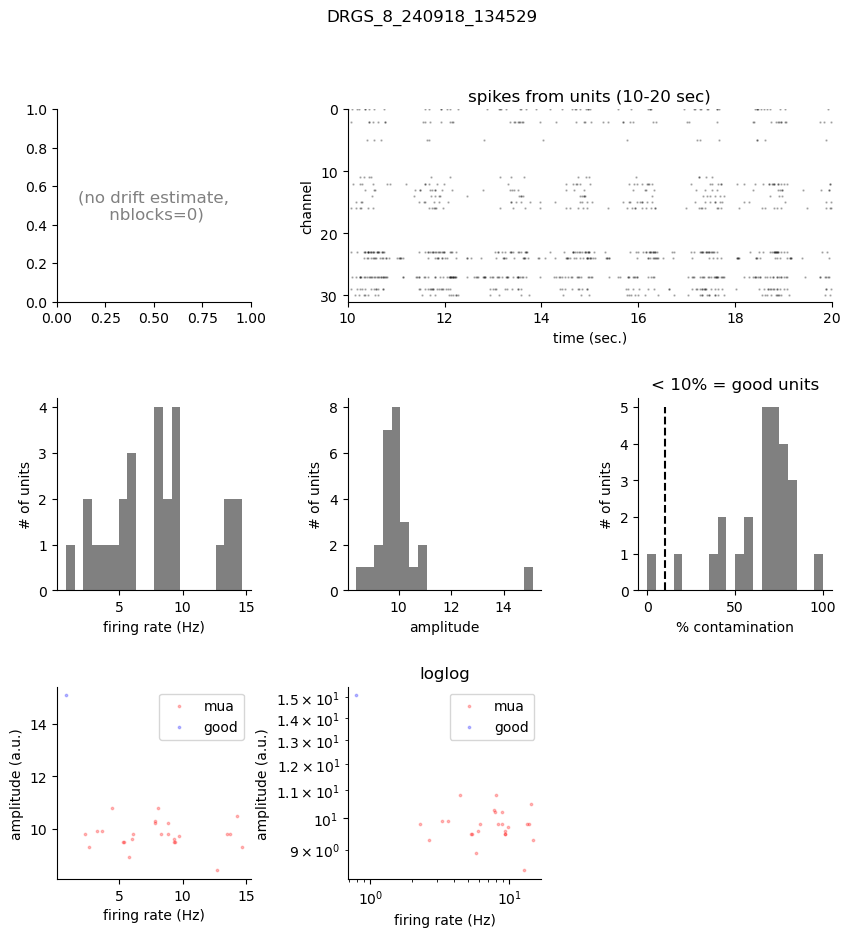

ERROR: could not plot units for DRGS_8_240918_134529, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\DRGS_9_240918_135255\DW322_DRGS_9_240918_135255_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------

ERROR: could not plot units for DRGS_8_240918_134529, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_8_240918_134529
|
|
|
|
|
|
Running kilosort on DRGS_9_240918_135255
|
|
|
|
|
|


kilosort.run_kilosort: N samples: 8744704
kilosort.run_kilosort: N seconds: 291.49013333333335
kilosort.run_kilosort: N batches: 6
kilosort.run_kilosort: Preprocessing filters computed in  0.91s; total  0.91s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     9.60 %
kilosort.run_kilosort: Memory:       88.35 %     |     42.35   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.80 %     |      4.06   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilo

<Figure size 1800x450 with 0 Axes>

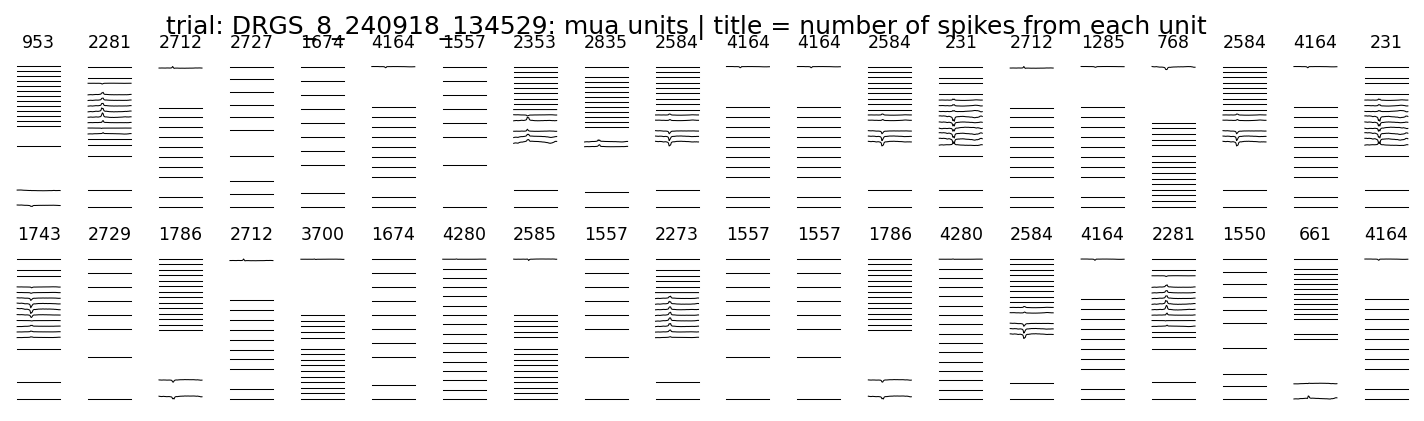

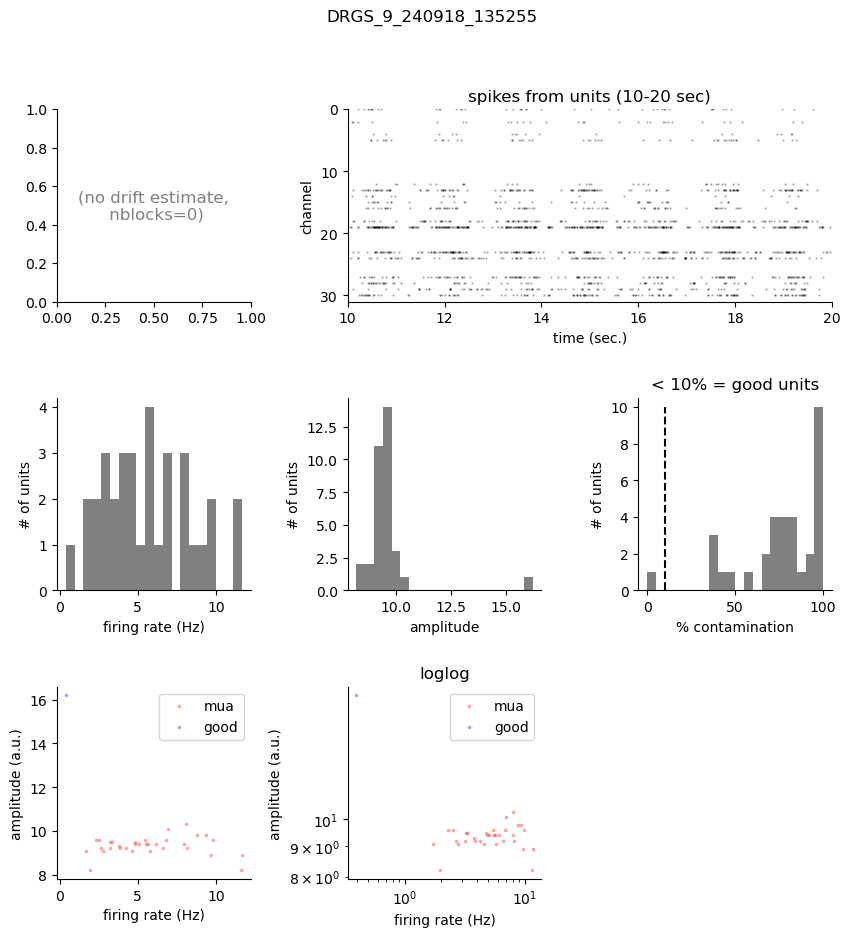

ERROR: could not plot units for DRGS_9_240918_135255, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\VF_1_240918_143256\DW322_VF_VF_1_240918_143256_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: --------------------------------

ERROR: could not plot units for DRGS_9_240918_135255, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_9_240918_135255
|
|
|
|
|
|
Running kilosort on VF_1_240918_143256
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  0.92s; total  0.92s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    10.90 %
kilosort.run_kilosort: Memory:       88.35 %     |     42.35   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.80 %     |      4.06   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

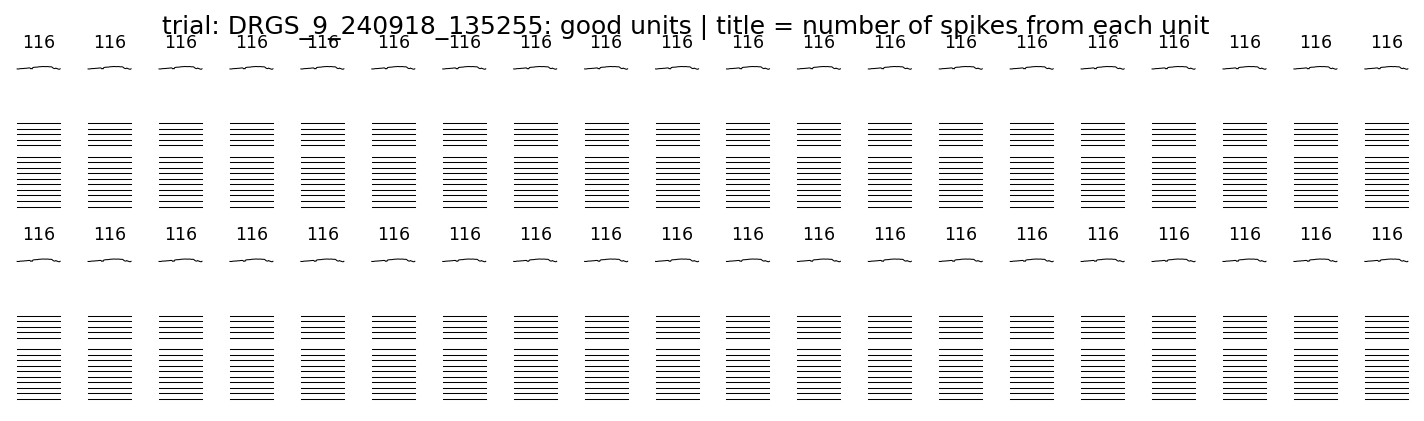

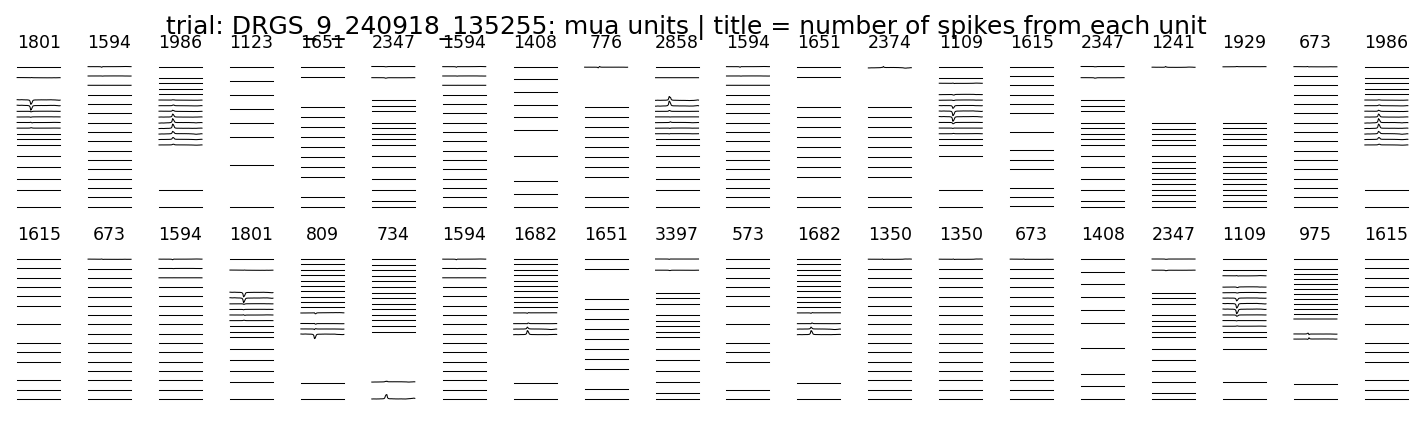

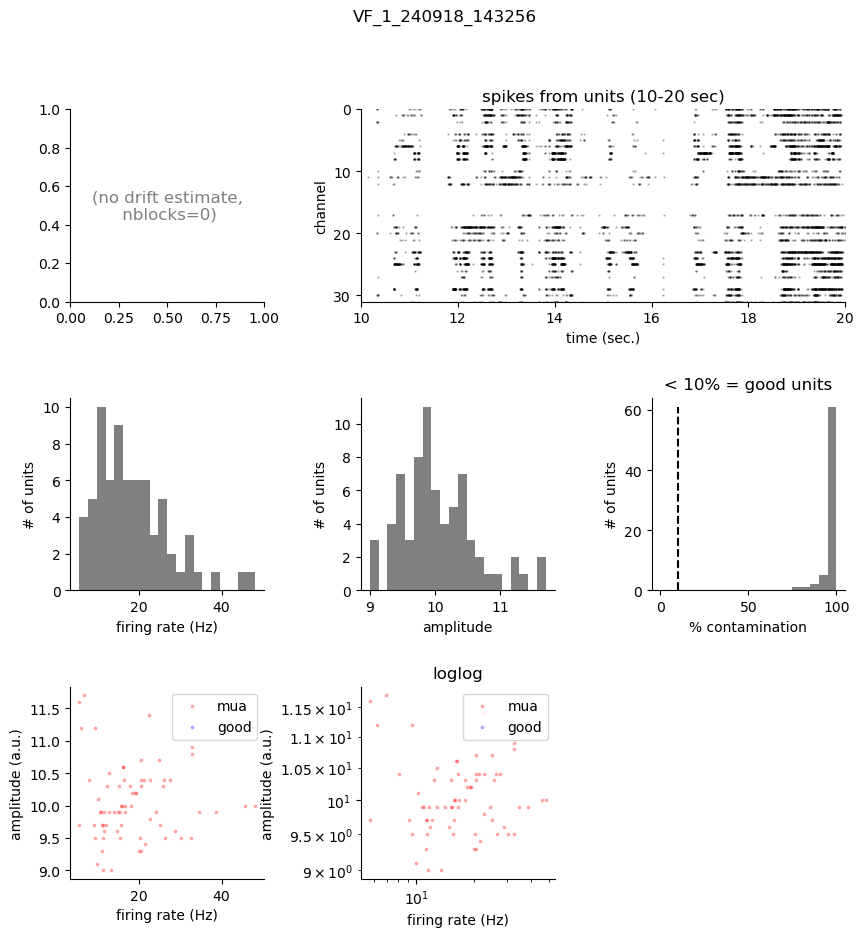

ERROR: could not plot units for VF_1_240918_143256, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64


ERROR: could not plot units for VF_1_240918_143256, mua. skipping plot...
Custom labels applied and saved for trial: VF_1_240918_143256
|
|
|
|
|
|
Running kilosort on VF_2_240918_143936
|
|
|
|
|
|


kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\VF_2_240918_143936\DW322_VF_VF_2_240918_143936_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: N samples: 7307008
kilosort.run_kilosort: N seconds: 243.56693333333334
kilosort.run_kilosort: N batches: 5
kilosort.run_kilosort: Preprocessing filters computed in  1.33s; total  1.33s
kilosort.run_kilosort:  
kilosort.ru

<Figure size 1800x450 with 0 Axes>

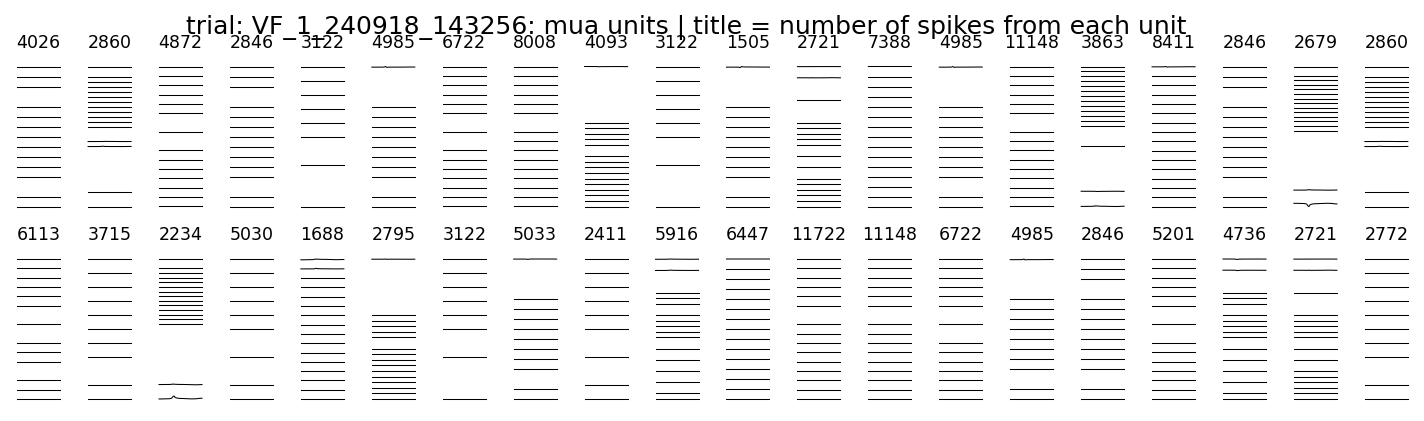

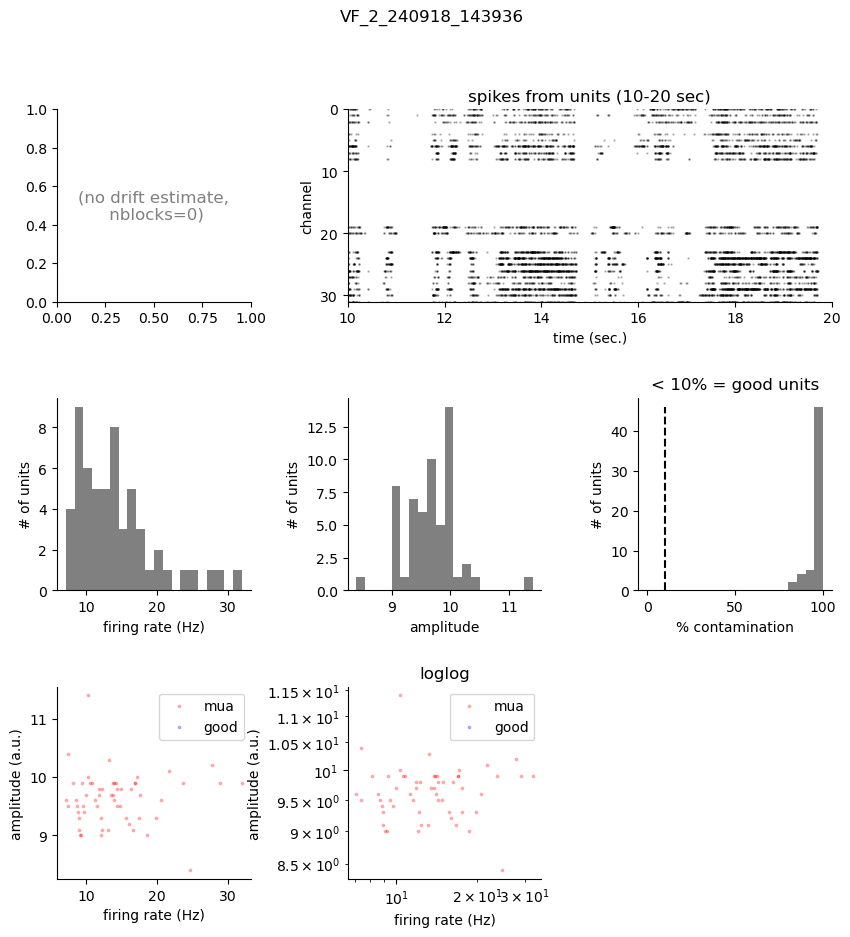

ERROR: could not plot units for VF_2_240918_143936, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\VF_3_240918_144658\DW322_VF_VF_3_240918_144658_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: --------------------------------

ERROR: could not plot units for VF_2_240918_143936, mua. skipping plot...
Custom labels applied and saved for trial: VF_2_240918_143936
|
|
|
|
|
|
Running kilosort on VF_3_240918_144658
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  1.05s; total  1.05s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    21.80 %
kilosort.run_kilosort: Memory:       86.89 %     |     41.65   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

<Figure size 1800x450 with 0 Axes>

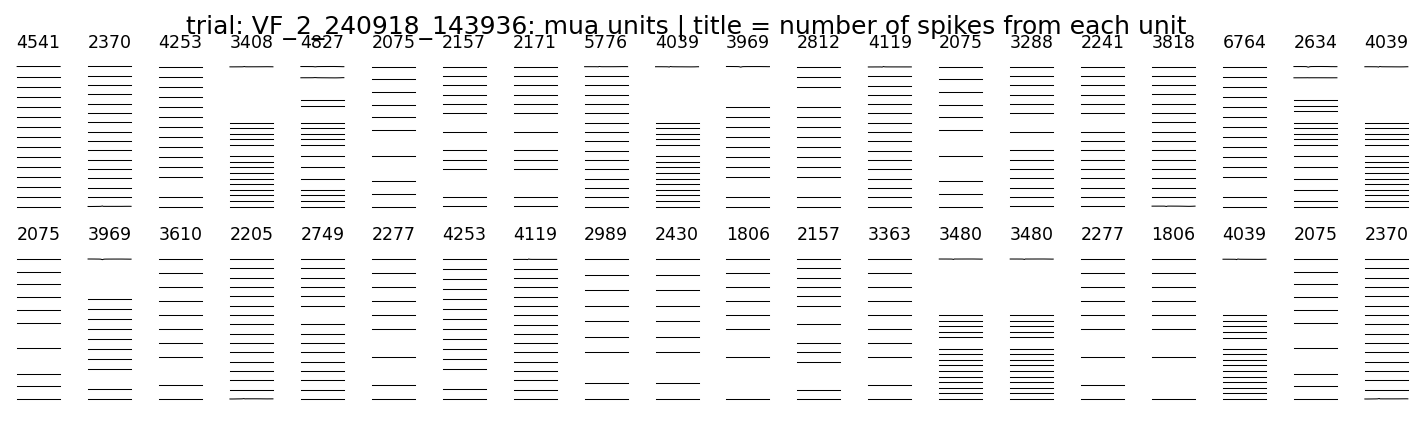

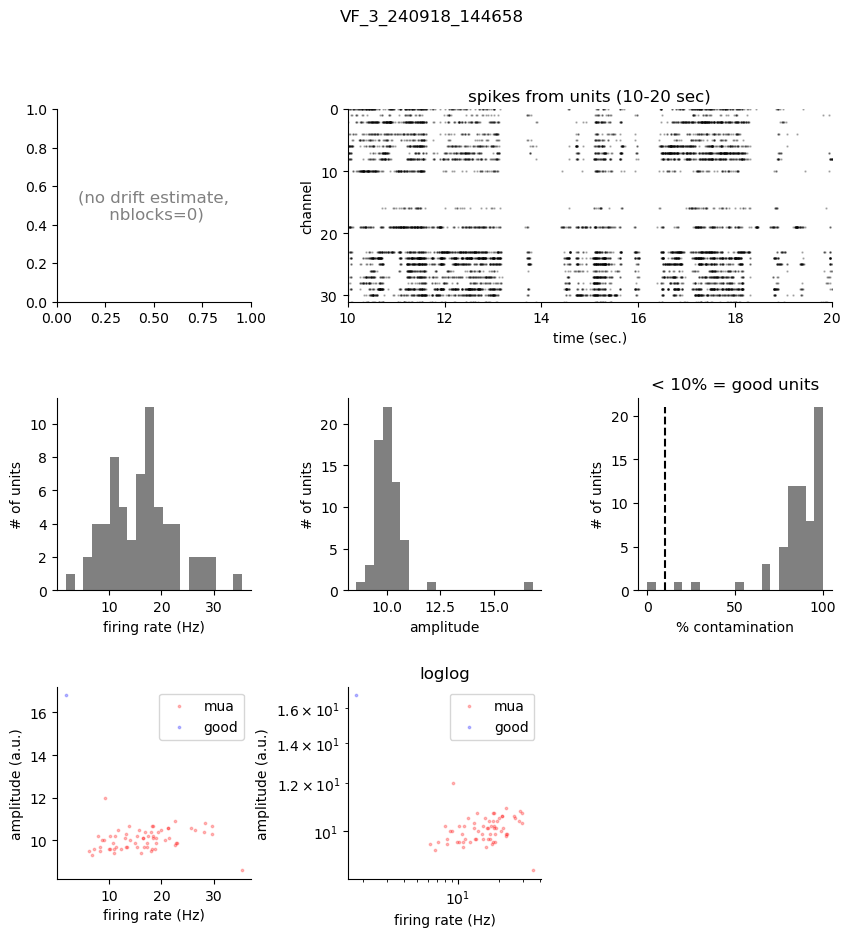

ERROR: could not plot units for VF_3_240918_144658, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\VF_4_240918_145638\DW322_VF_VF_4_240918_145638_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: --------------------------------

ERROR: could not plot units for VF_3_240918_144658, mua. skipping plot...
Custom labels applied and saved for trial: VF_3_240918_144658
|
|
|
|
|
|
Running kilosort on VF_4_240918_145638
|
|
|
|
|
|


kilosort.run_kilosort: N seconds: 243.5328
kilosort.run_kilosort: N batches: 5
kilosort.run_kilosort: Preprocessing filters computed in  1.27s; total  1.27s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    12.10 %
kilosort.run_kilosort: Memory:       85.37 %     |     40.92   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilos

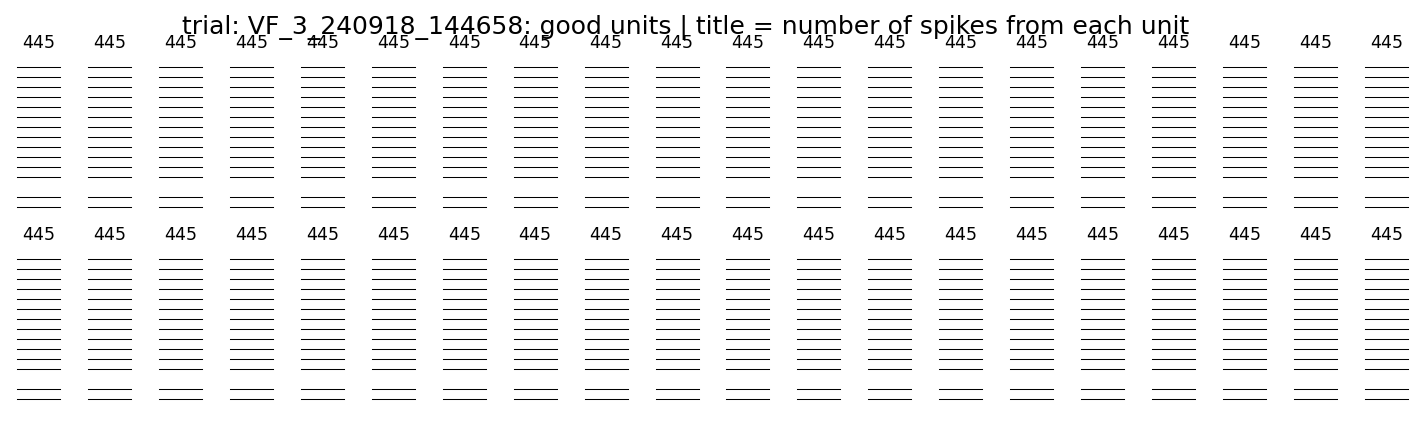

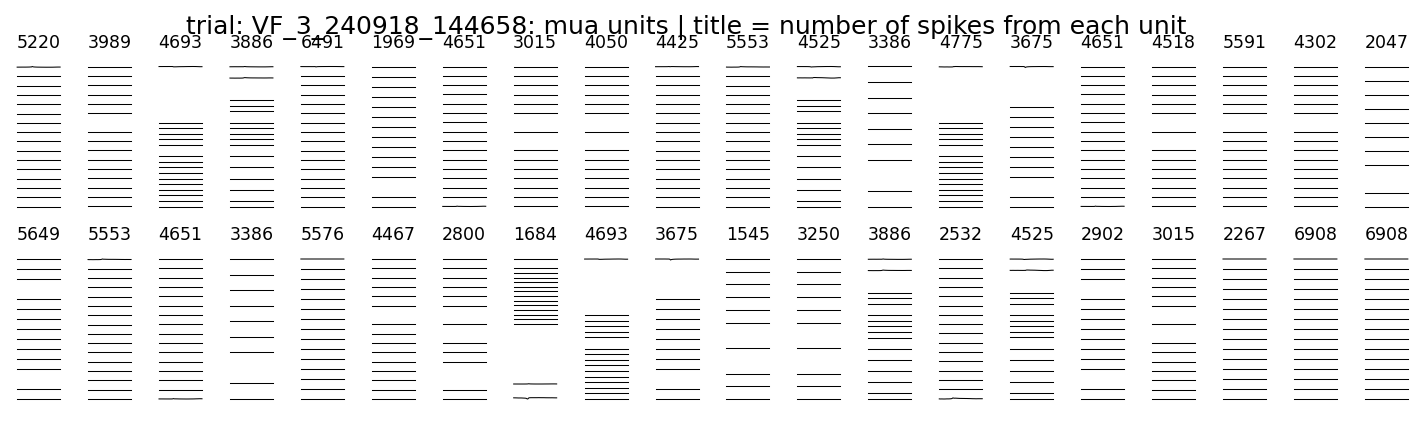

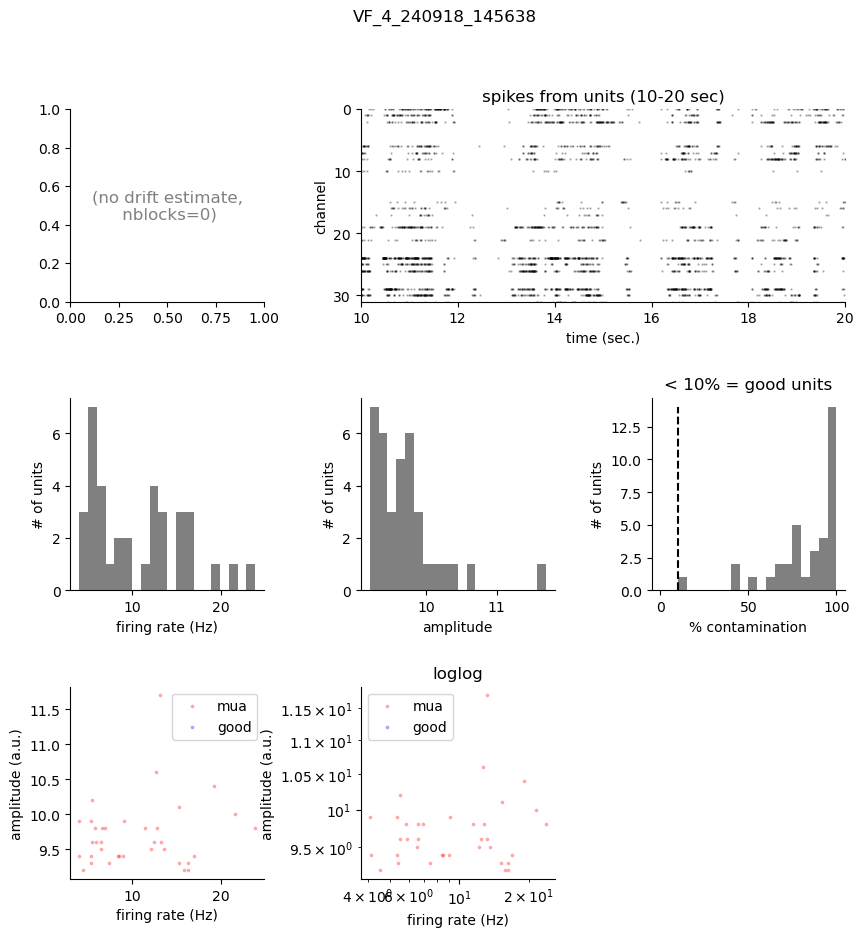

ERROR: could not plot units for VF_4_240918_145638, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\VF_5_240918_150137\DW322_VF_VF_5_240918_150137_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: --------------------------------

ERROR: could not plot units for VF_4_240918_145638, mua. skipping plot...
Custom labels applied and saved for trial: VF_4_240918_145638
|
|
|
|
|
|
Running kilosort on VF_5_240918_150137
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  0.93s; total  0.93s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    11.40 %
kilosort.run_kilosort: Memory:       85.19 %     |     40.84   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

<Figure size 1800x450 with 0 Axes>

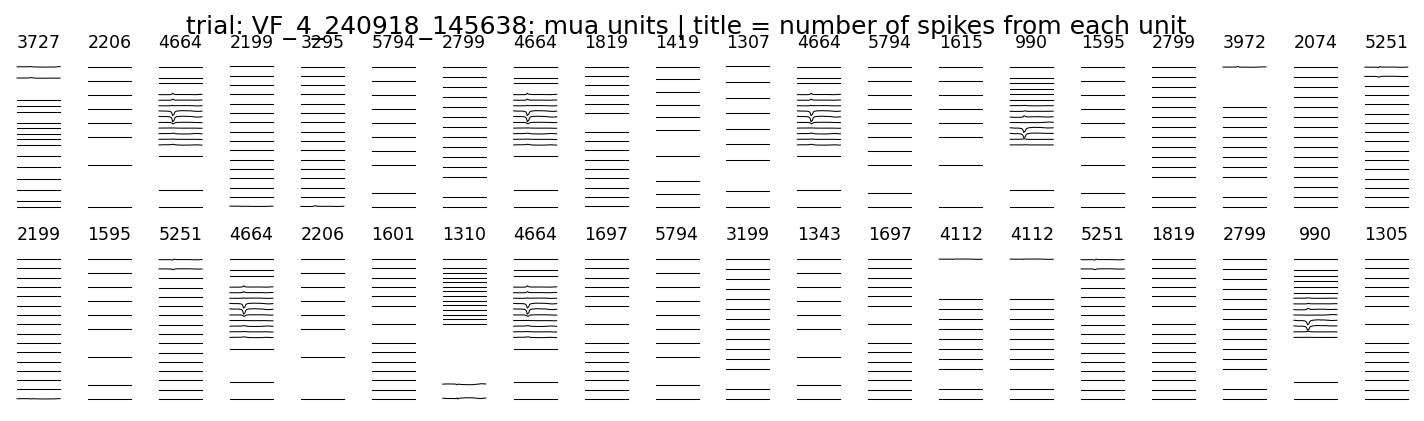

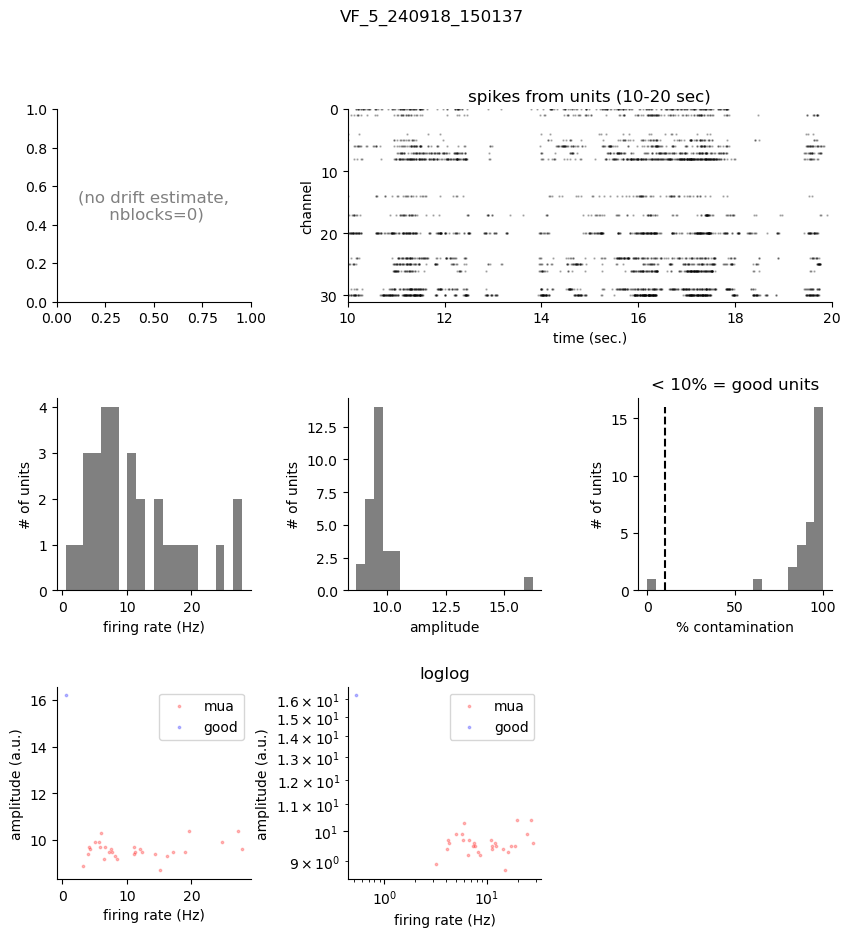

ERROR: could not plot units for VF_5_240918_150137, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\VF_6_240918_150811\DW322_VF_VF_6_240918_150811_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: --------------------------------

ERROR: could not plot units for VF_5_240918_150137, mua. skipping plot...
Custom labels applied and saved for trial: VF_5_240918_150137
|
|
|
|
|
|
Running kilosort on VF_6_240918_150811
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  0.94s; total  0.95s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    12.10 %
kilosort.run_kilosort: Memory:       85.24 %     |     40.86   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

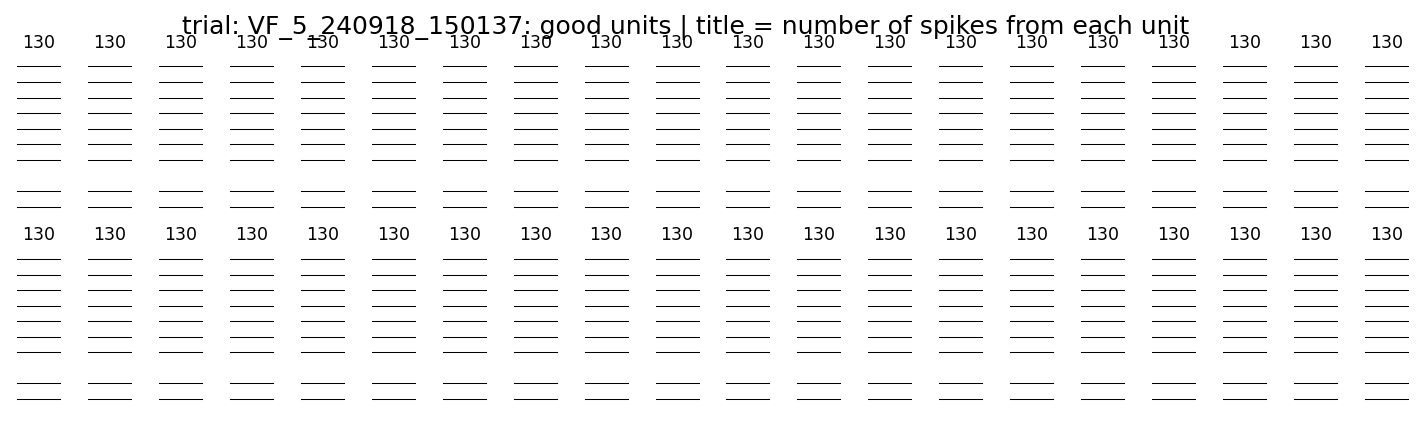

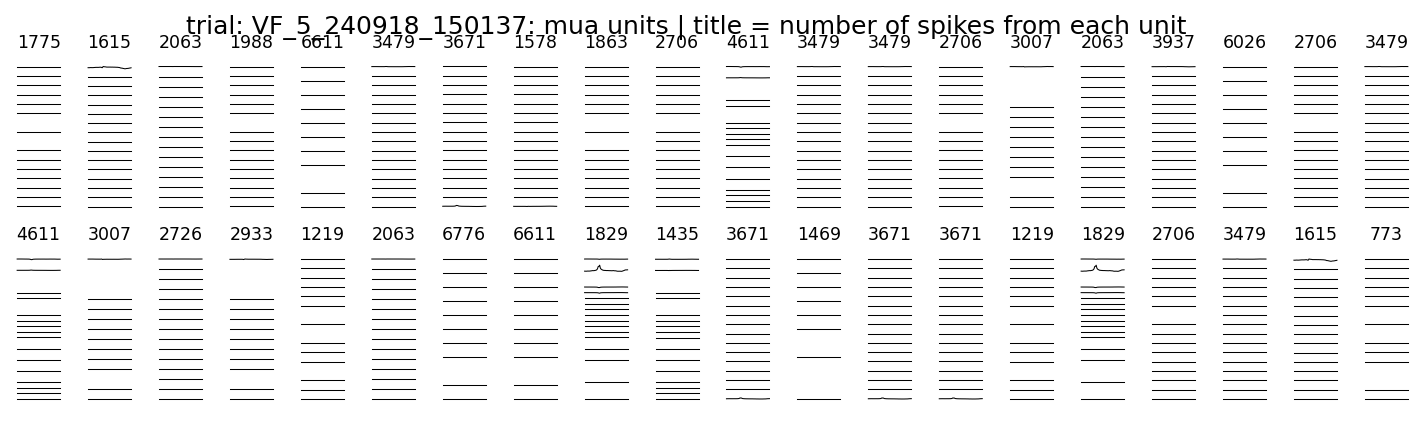

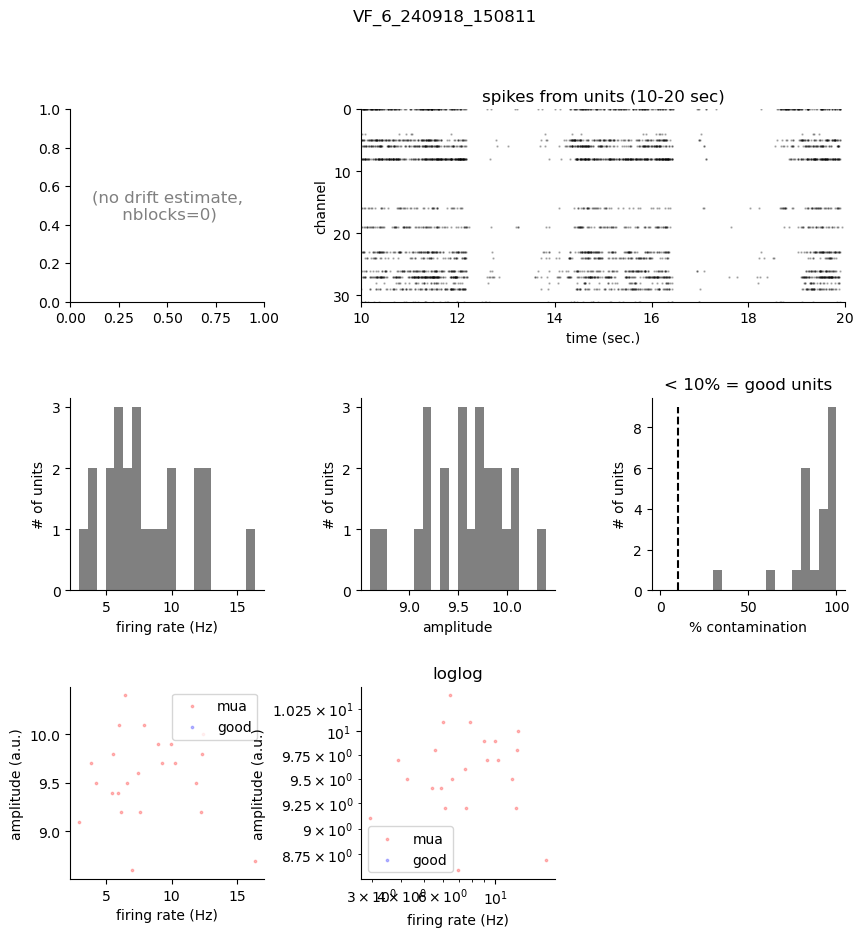

ERROR: could not plot units for VF_6_240918_150811, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\VF_7_240918_151516\DW322_VF_VF_7_240918_151516_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: --------------------------------

ERROR: could not plot units for VF_6_240918_150811, mua. skipping plot...
Custom labels applied and saved for trial: VF_6_240918_150811
|
|
|
|
|
|
Running kilosort on VF_7_240918_151516
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  1.09s; total  1.09s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    11.70 %
kilosort.run_kilosort: Memory:       84.21 %     |     40.36   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

<Figure size 1800x450 with 0 Axes>

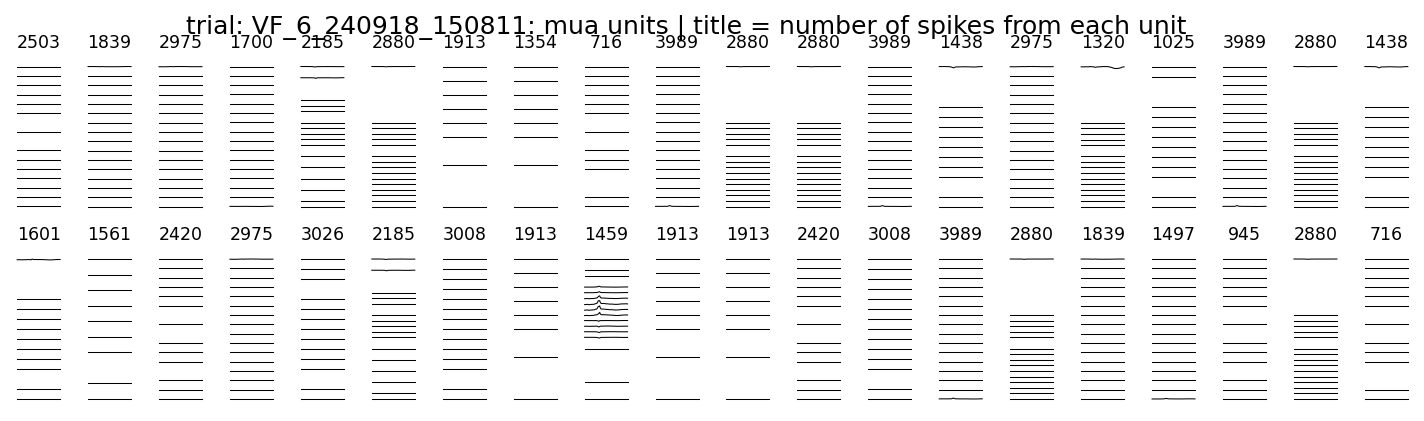

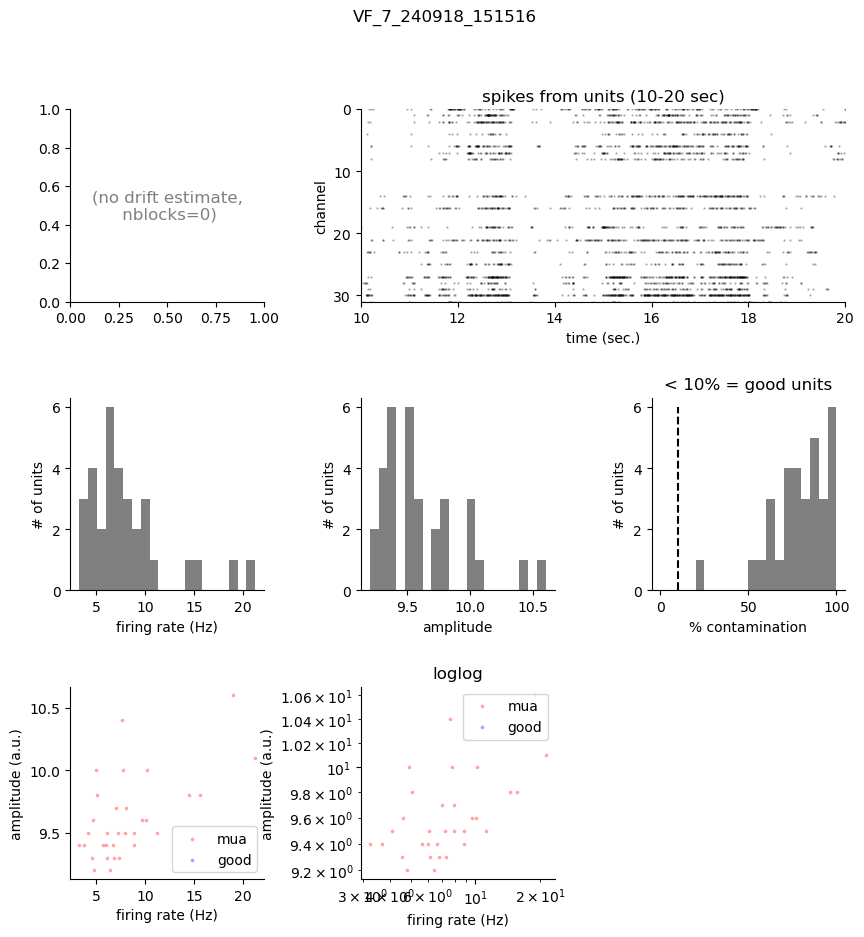

ERROR: could not plot units for VF_7_240918_151516, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\VF_8_240918_152056\DW322_VF_VF_8_240918_152056_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: --------------------------------

ERROR: could not plot units for VF_7_240918_151516, mua. skipping plot...
Custom labels applied and saved for trial: VF_7_240918_151516
|
|
|
|
|
|
Running kilosort on VF_8_240918_152056
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  0.96s; total  0.96s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    12.70 %
kilosort.run_kilosort: Memory:       84.18 %     |     40.35   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

<Figure size 1800x450 with 0 Axes>

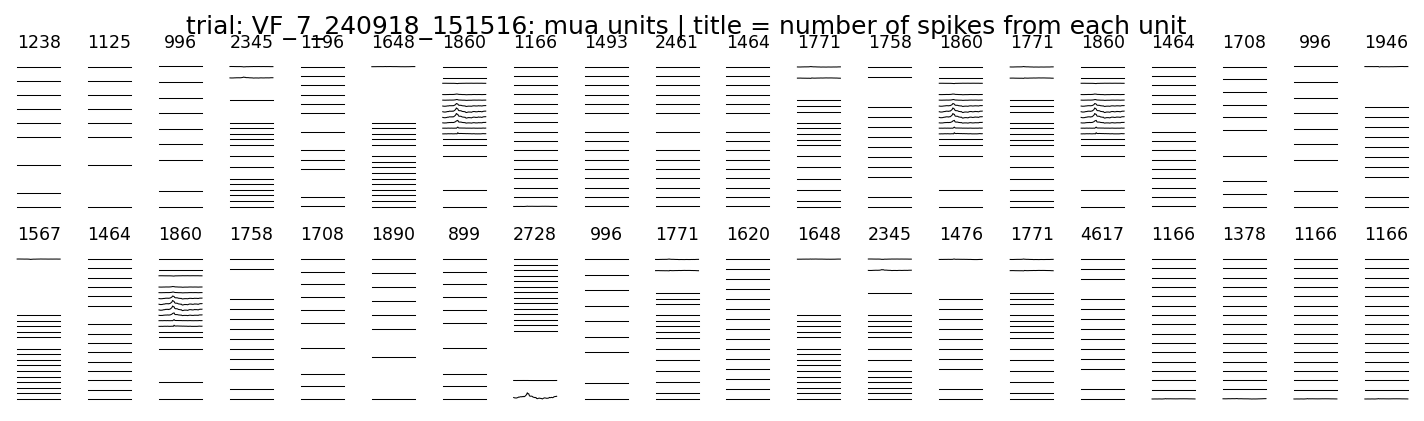

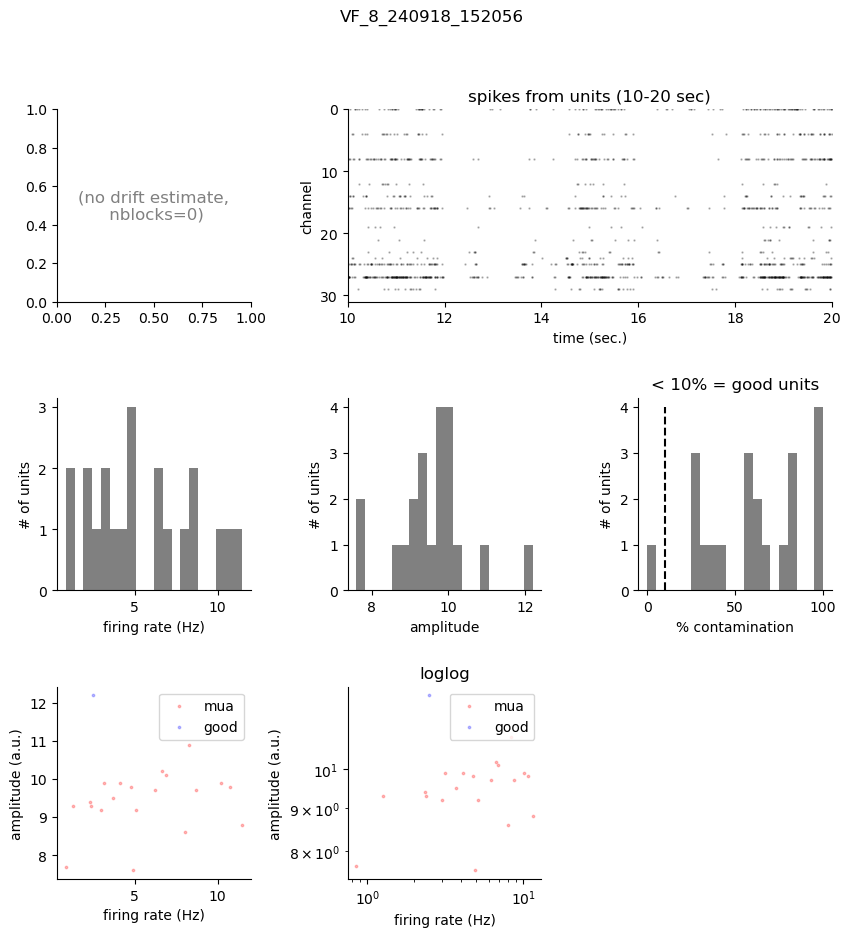

ERROR: could not plot units for VF_8_240918_152056, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW322\binary\VF_9_240918_152753\DW322_VF_VF_9_240918_152753_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: --------------------------------

ERROR: could not plot units for VF_8_240918_152056, mua. skipping plot...
Custom labels applied and saved for trial: VF_8_240918_152056
|
|
|
|
|
|
Running kilosort on VF_9_240918_152753
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  0.85s; total  0.86s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    13.80 %
kilosort.run_kilosort: Memory:       84.16 %     |     40.34   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

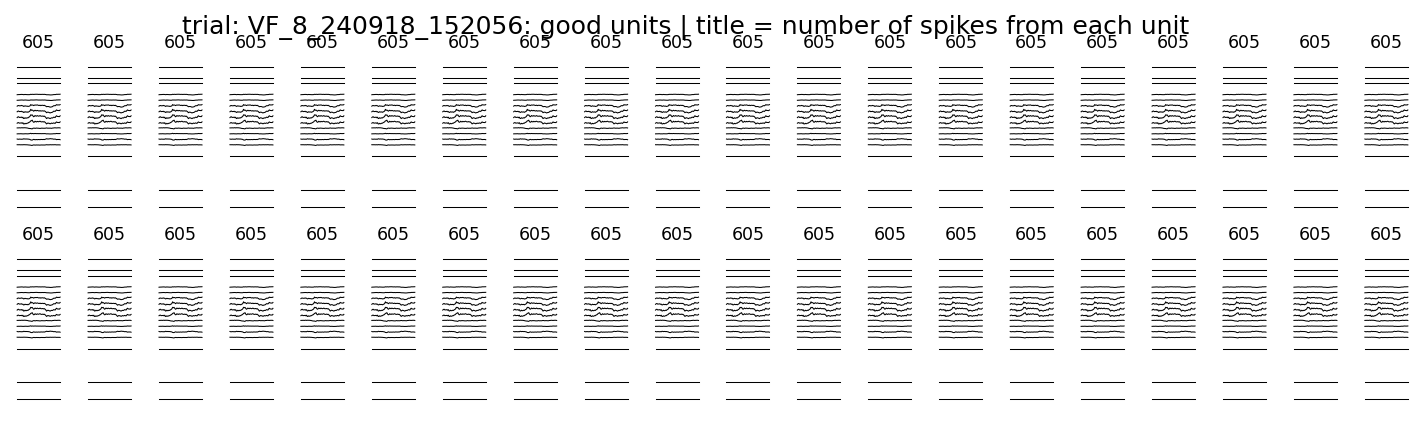

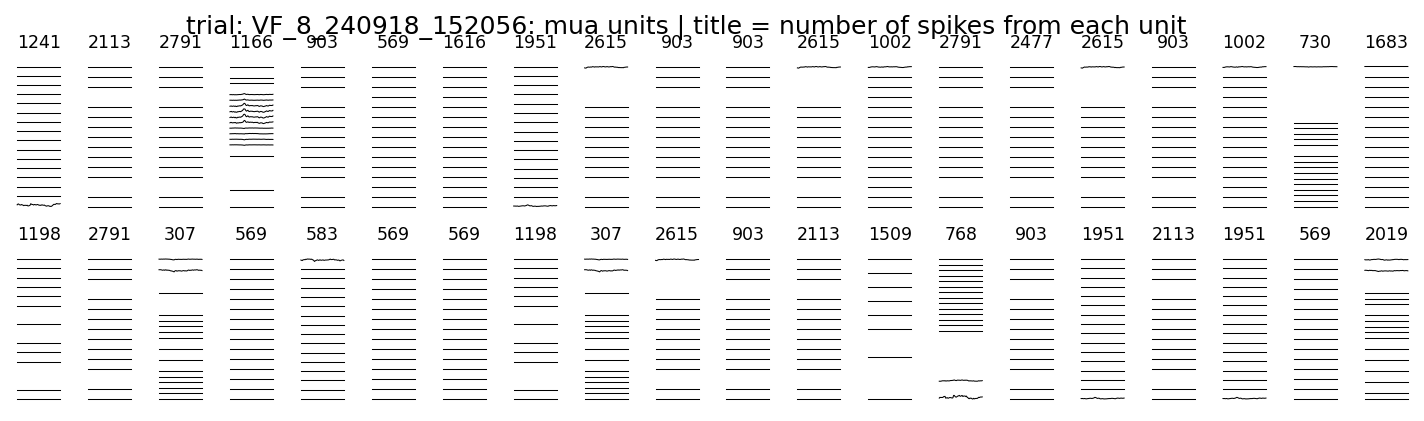

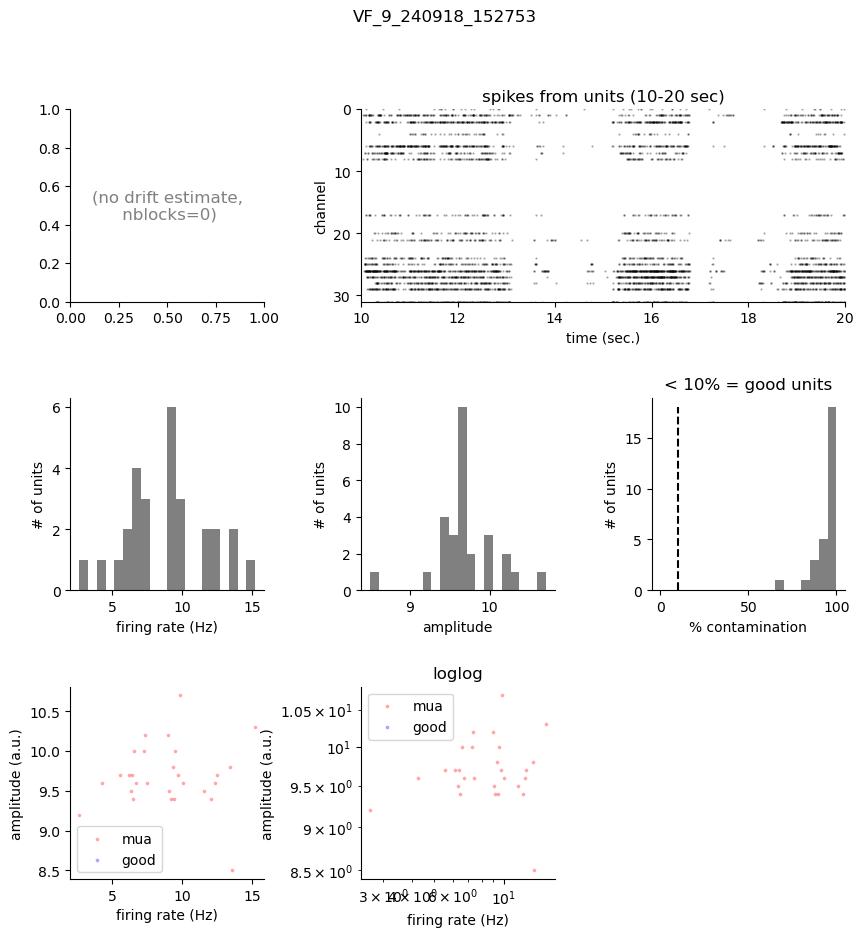

ERROR: could not plot units for VF_9_240918_152753, good. skipping plot...
ERROR: could not plot units for VF_9_240918_152753, mua. skipping plot...
Custom labels applied and saved for trial: VF_9_240918_152753
Preparing Kilosort wrapper...
|
|
|
|
|
|
Running kilosort on DRGS_10_240911_155921
|
|
|
|
|
|


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323\binary\DRGS_10_240911_155921\DW323_DRGS_10_240911_155921_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -----------------------------

<Figure size 1800x450 with 0 Axes>

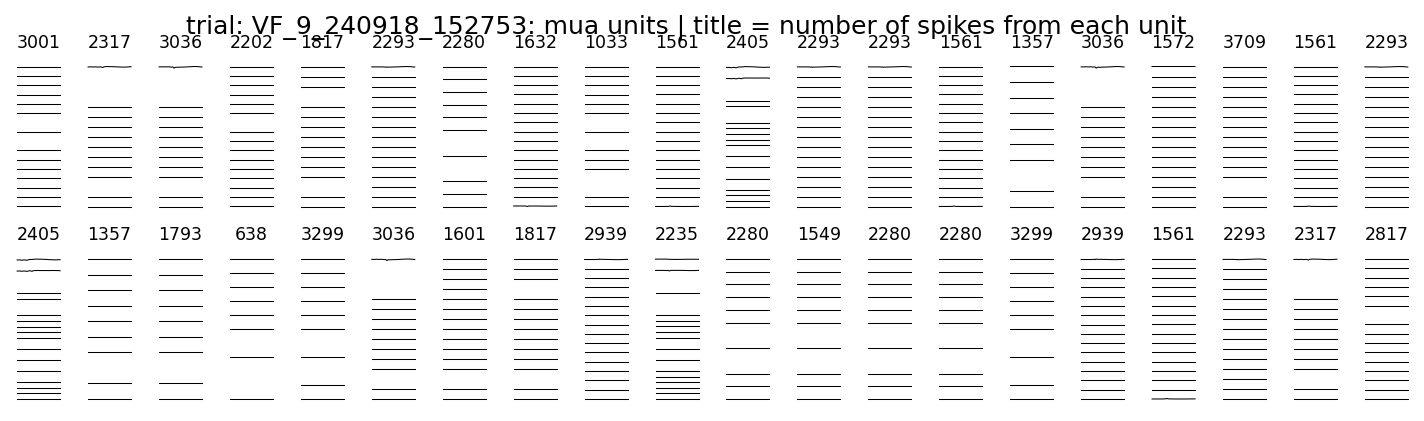

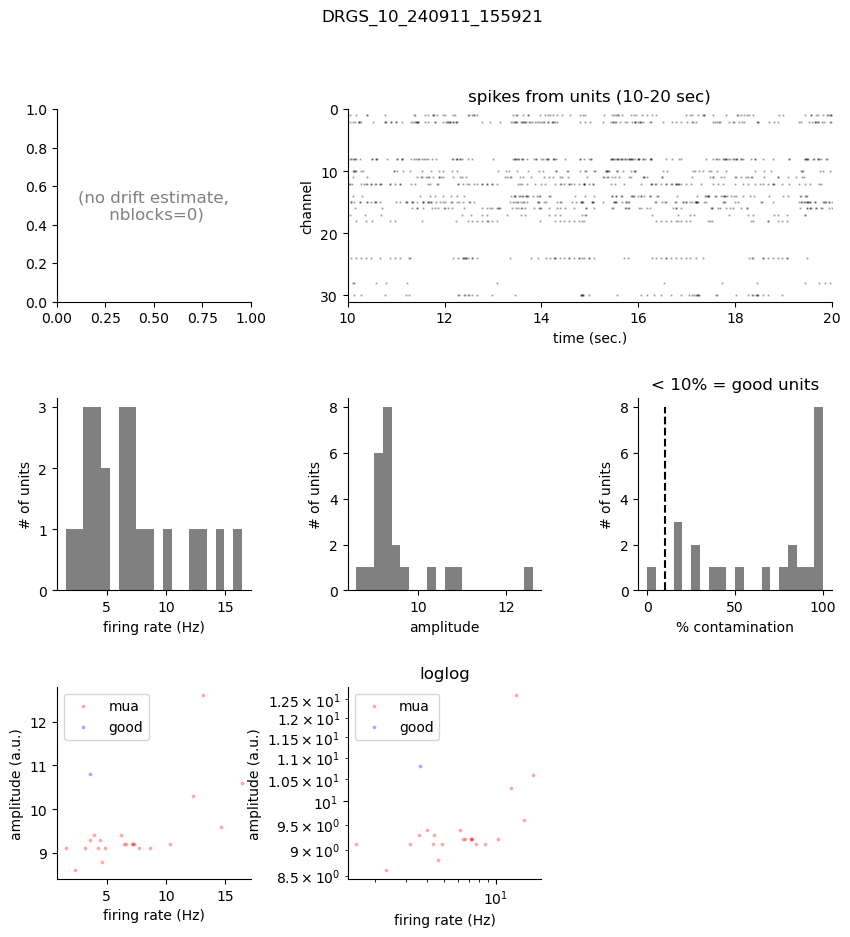

ERROR: could not plot units for DRGS_10_240911_155921, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323\binary\DRGS_11_240911_160638\DW323_DRGS_11_240911_160638_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -----------------------------

ERROR: could not plot units for DRGS_10_240911_155921, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_10_240911_155921
|
|
|
|
|
|
Running kilosort on DRGS_11_240911_160638
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  1.06s; total  1.06s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    10.40 %
kilosort.run_kilosort: Memory:       83.69 %     |     40.12   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

<Figure size 1800x450 with 0 Axes>

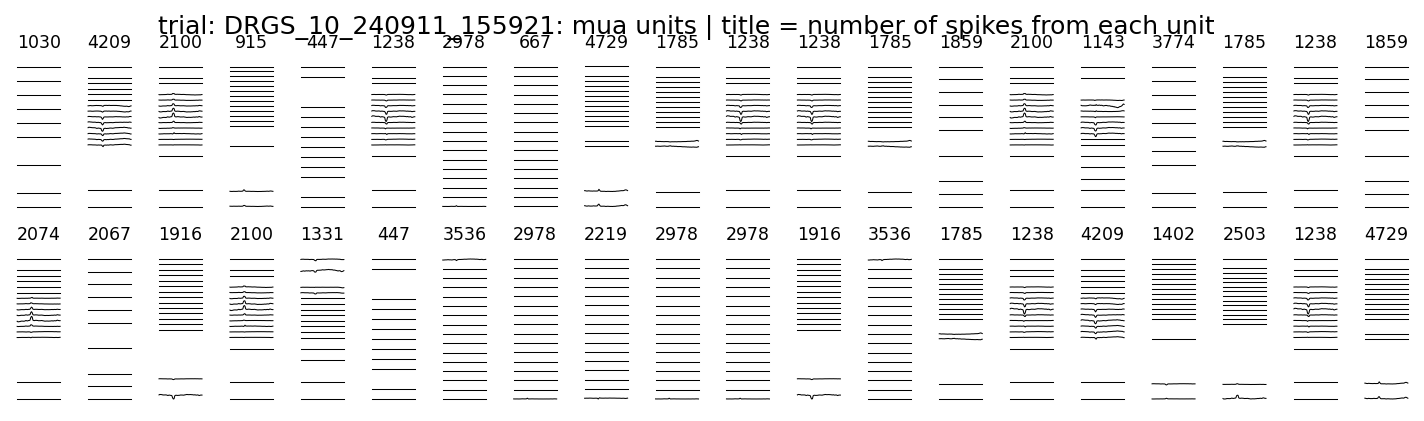

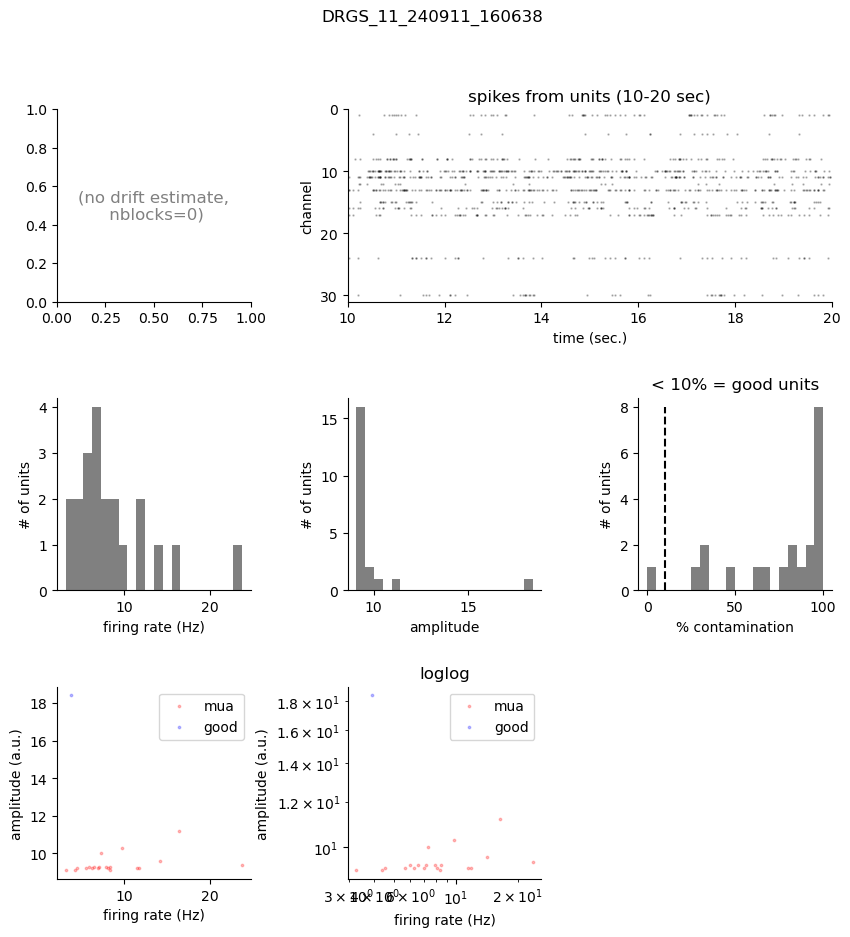

ERROR: could not plot units for DRGS_11_240911_160638, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323\binary\DRGS_1_240911_144910\DW323_DRGS_1_240911_144910_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------

ERROR: could not plot units for DRGS_11_240911_160638, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_11_240911_160638
|
|
|
|
|
|
Running kilosort on DRGS_1_240911_144910
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  0.94s; total  0.94s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    14.20 %
kilosort.run_kilosort: Memory:       84.23 %     |     40.37   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

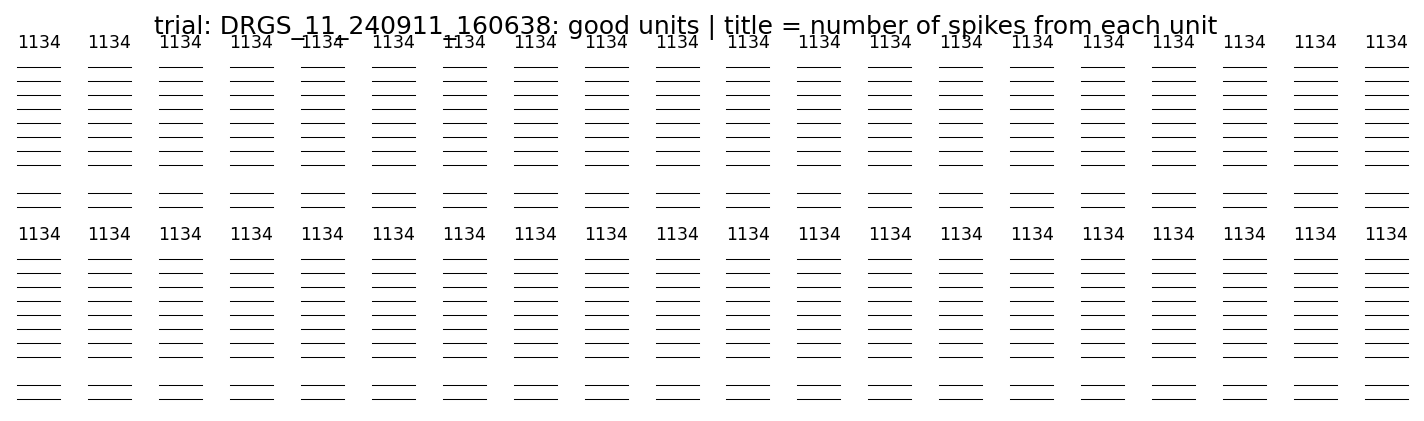

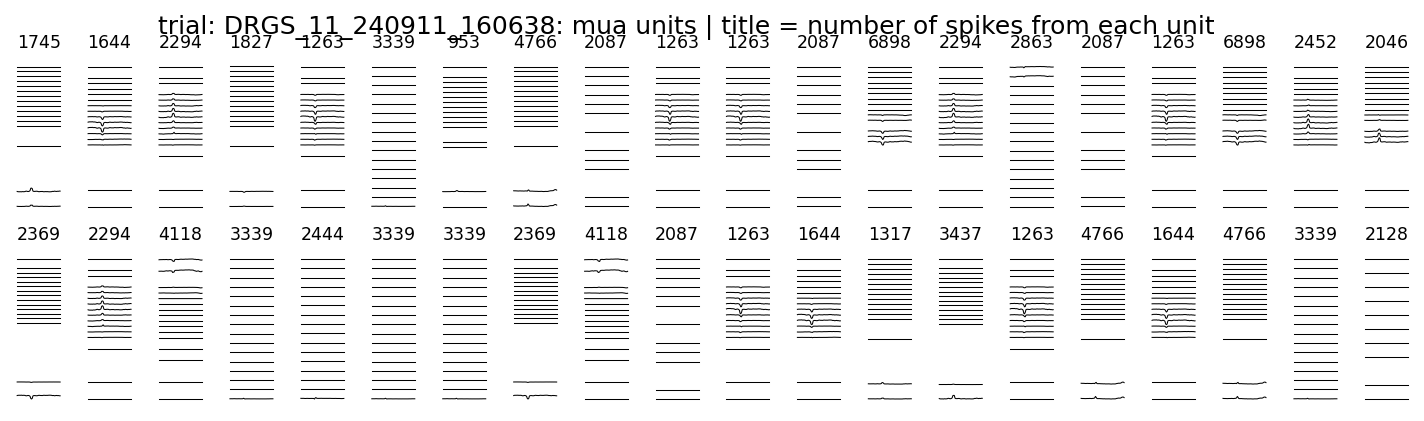

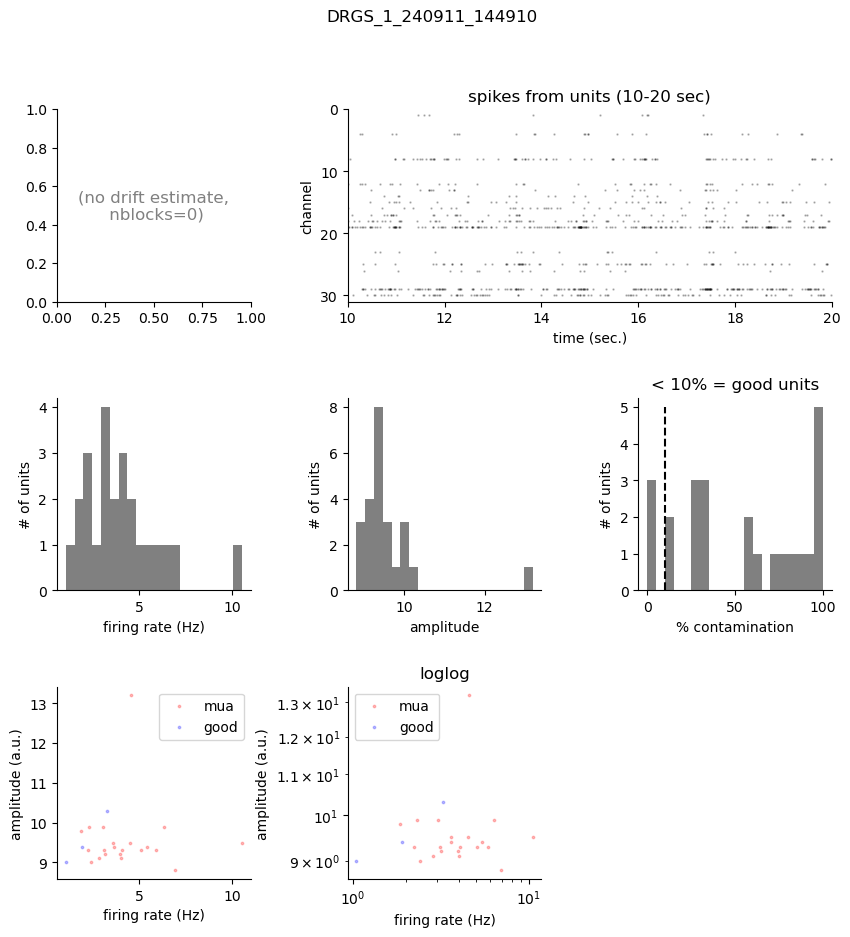

ERROR: could not plot units for DRGS_1_240911_144910, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323\binary\DRGS_2_240911_145808\DW323_DRGS_2_240911_145808_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------

ERROR: could not plot units for DRGS_1_240911_144910, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_1_240911_144910
|
|
|
|
|
|
Running kilosort on DRGS_2_240911_145808
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  1.12s; total  1.12s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    13.60 %
kilosort.run_kilosort: Memory:       84.27 %     |     40.39   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

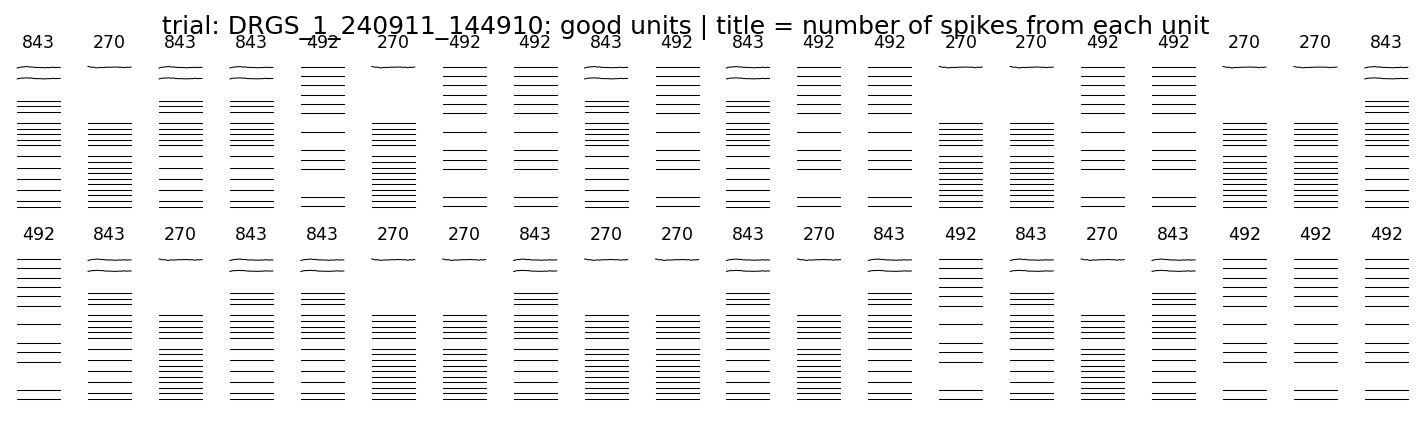

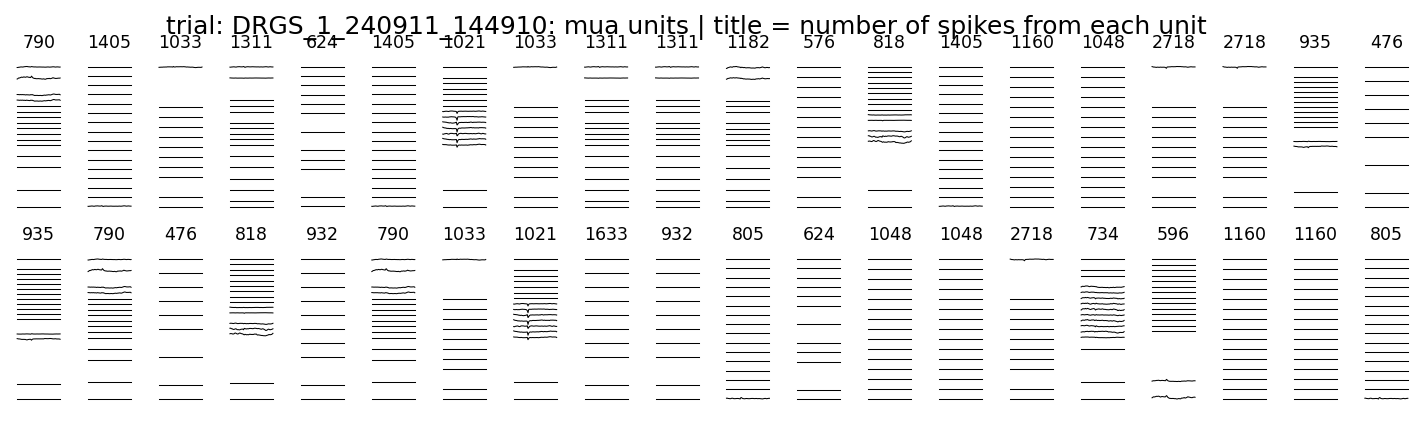

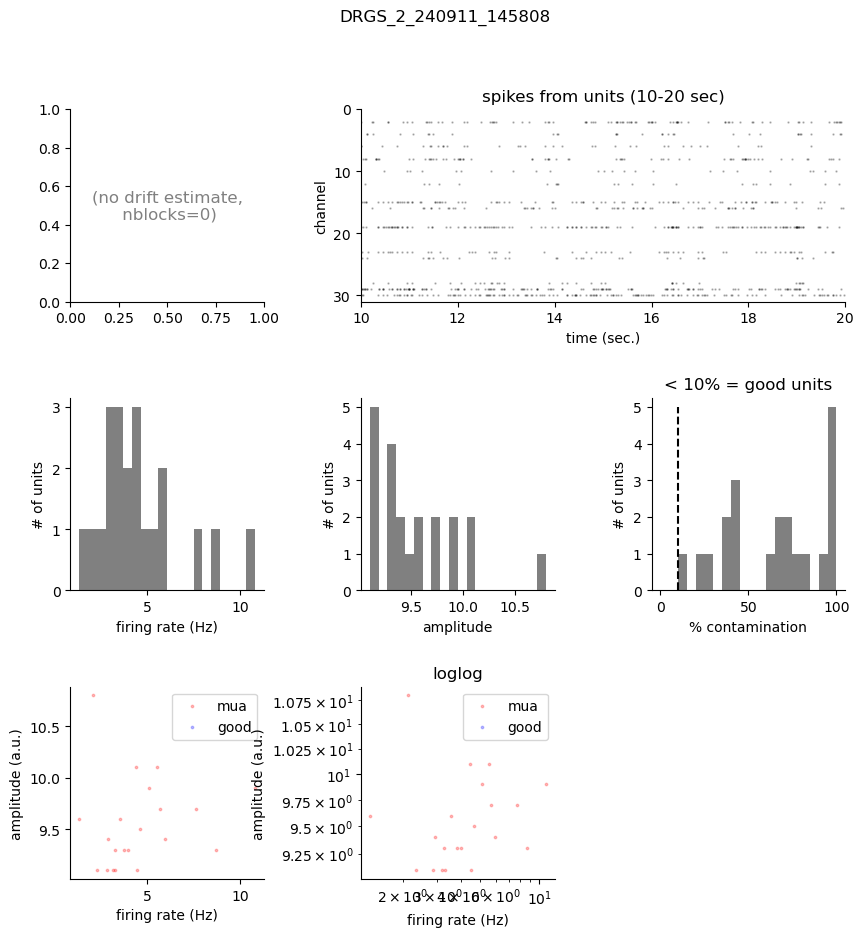

ERROR: could not plot units for DRGS_2_240911_145808, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323\binary\DRGS_3_240911_150506\DW323_DRGS_3_240911_150506_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------

ERROR: could not plot units for DRGS_2_240911_145808, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_2_240911_145808
|
|
|
|
|
|
Running kilosort on DRGS_3_240911_150506
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  0.98s; total  0.98s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    11.30 %
kilosort.run_kilosort: Memory:       84.24 %     |     40.38   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

<Figure size 1800x450 with 0 Axes>

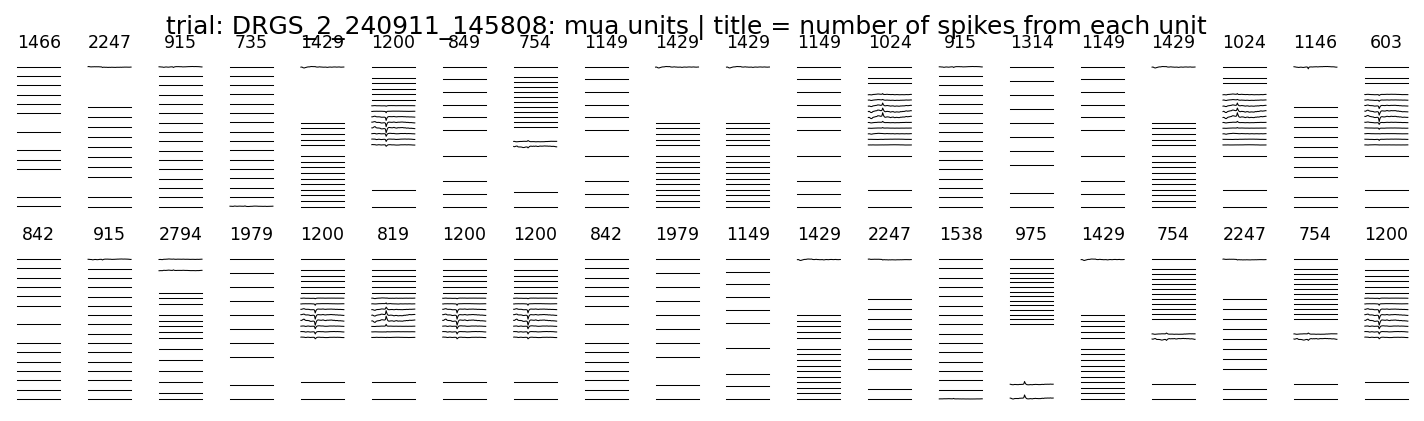

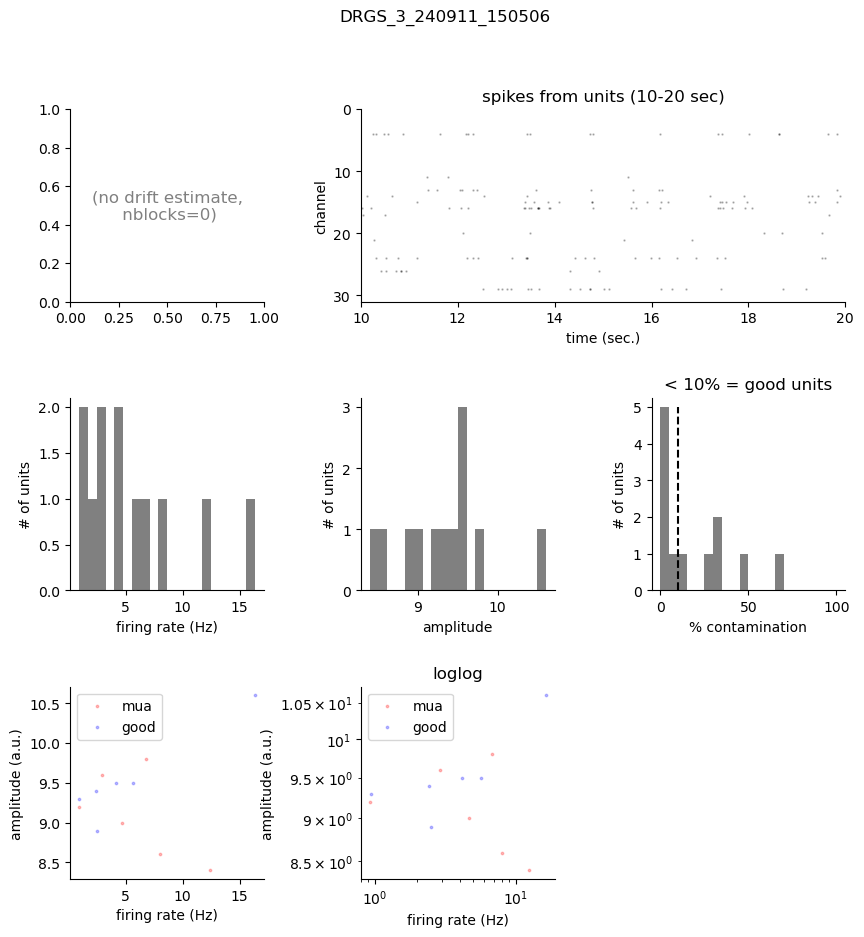

ERROR: could not plot units for DRGS_3_240911_150506, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323\binary\DRGS_4_240911_151137\DW323_DRGS_4_240911_151137_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------

ERROR: could not plot units for DRGS_3_240911_150506, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_3_240911_150506
|
|
|
|
|
|
Running kilosort on DRGS_4_240911_151137
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  1.06s; total  1.06s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    15.10 %
kilosort.run_kilosort: Memory:       83.93 %     |     40.23   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

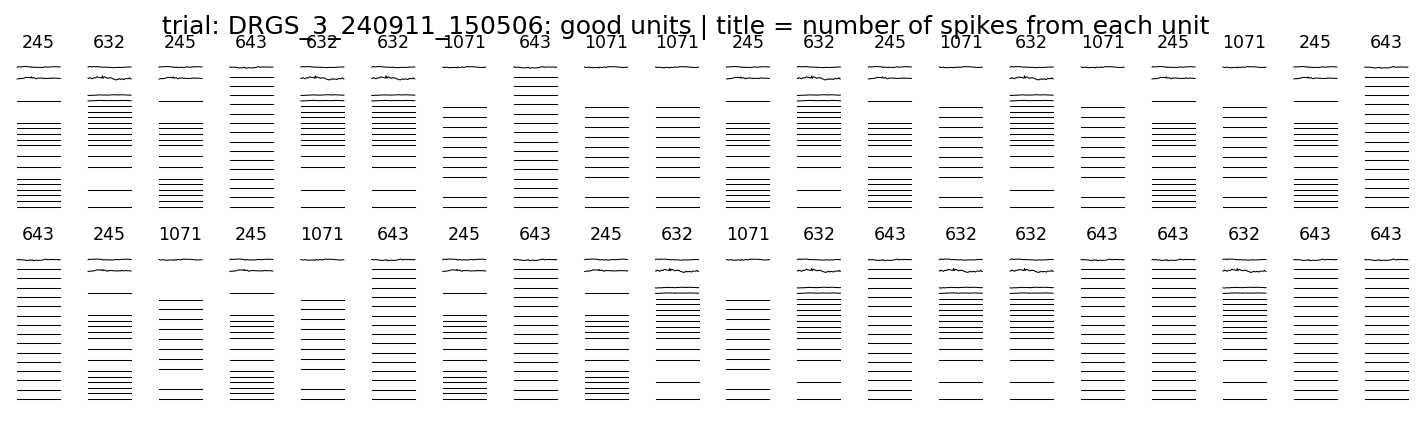

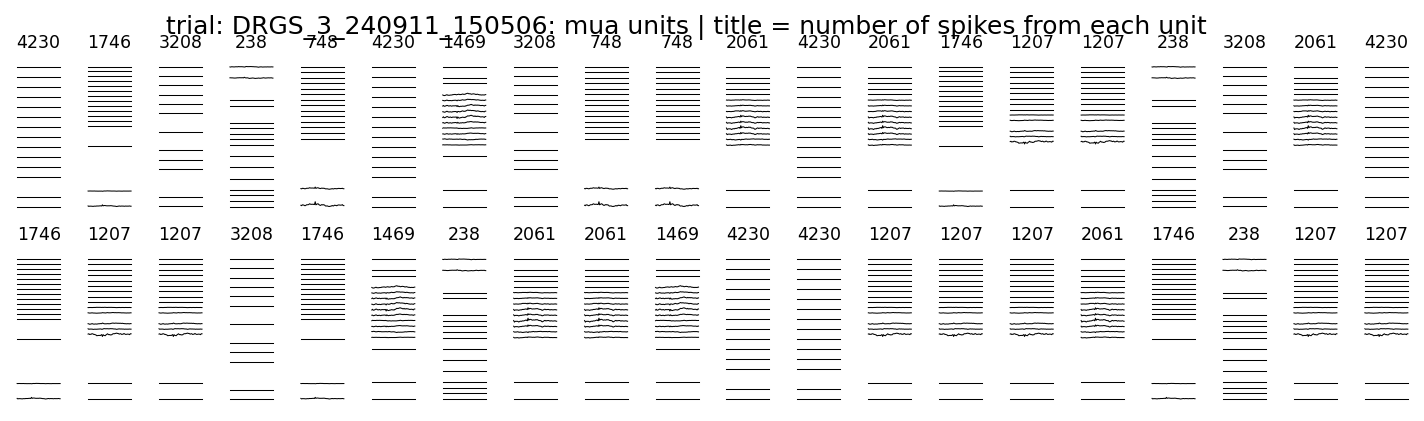

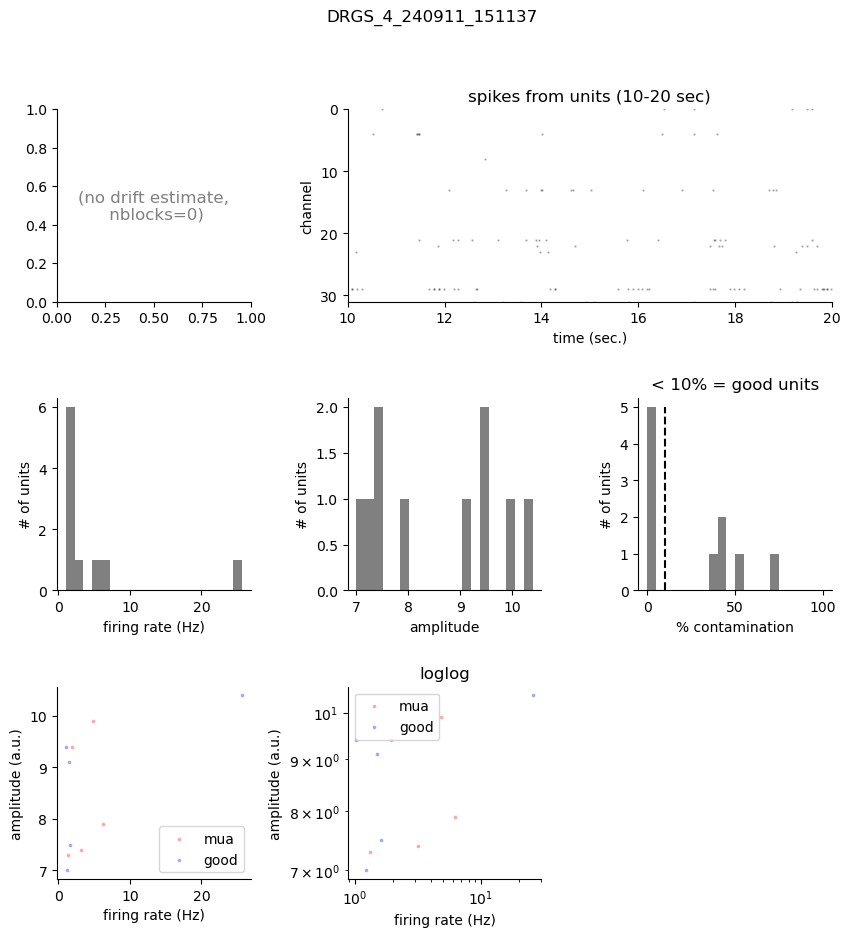

ERROR: could not plot units for DRGS_4_240911_151137, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323\binary\DRGS_5_240911_151925\DW323_DRGS_5_240911_151925_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------

ERROR: could not plot units for DRGS_4_240911_151137, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_4_240911_151137
|
|
|
|
|
|
Running kilosort on DRGS_5_240911_151925
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  2.13s; total  2.13s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    16.50 %
kilosort.run_kilosort: Memory:       83.40 %     |     39.98   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

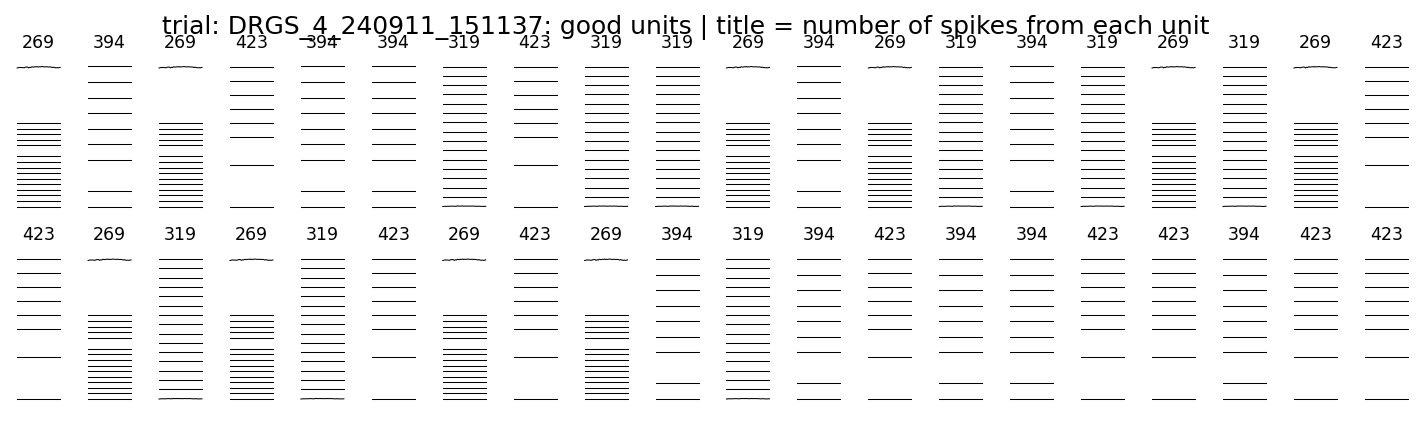

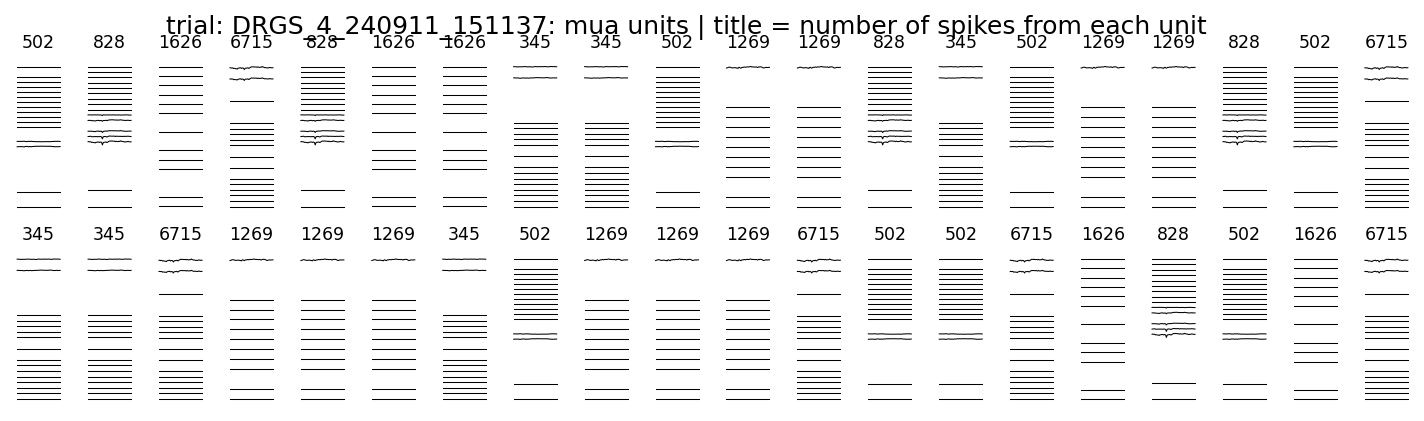

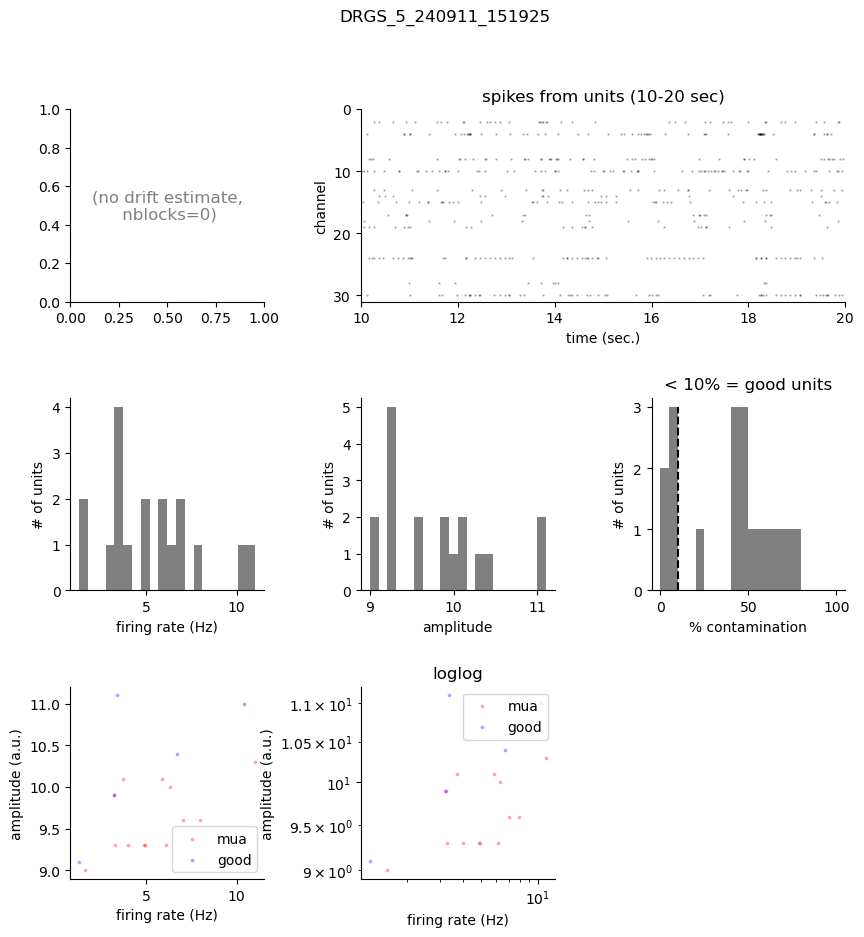

ERROR: could not plot units for DRGS_5_240911_151925, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323\binary\DRGS_6_240911_152522\DW323_DRGS_6_240911_152522_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------

ERROR: could not plot units for DRGS_5_240911_151925, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_5_240911_151925
|
|
|
|
|
|
Running kilosort on DRGS_6_240911_152522
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  1.15s; total  1.15s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    16.20 %
kilosort.run_kilosort: Memory:       83.84 %     |     40.18   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

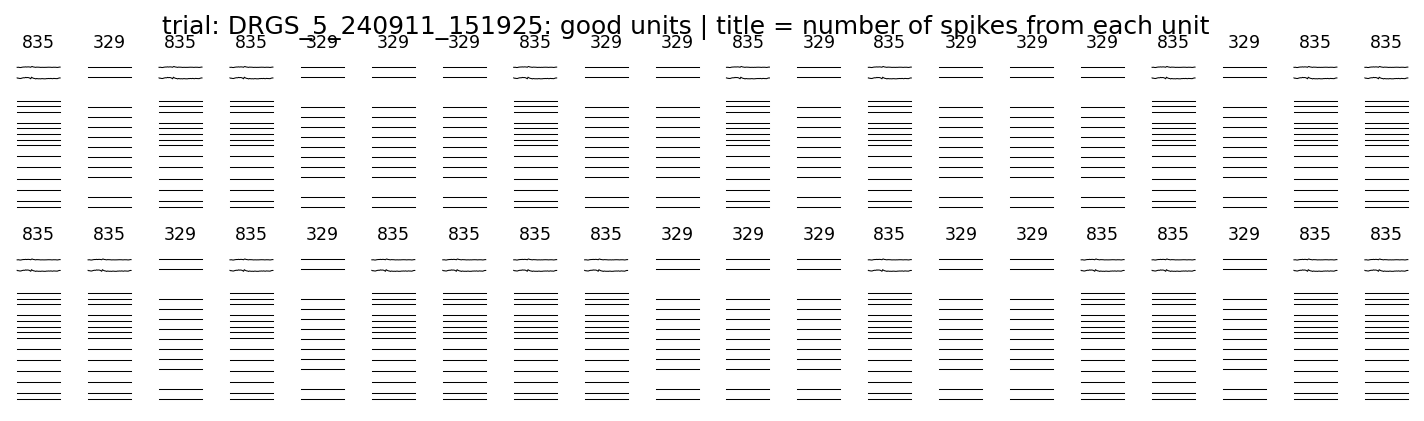

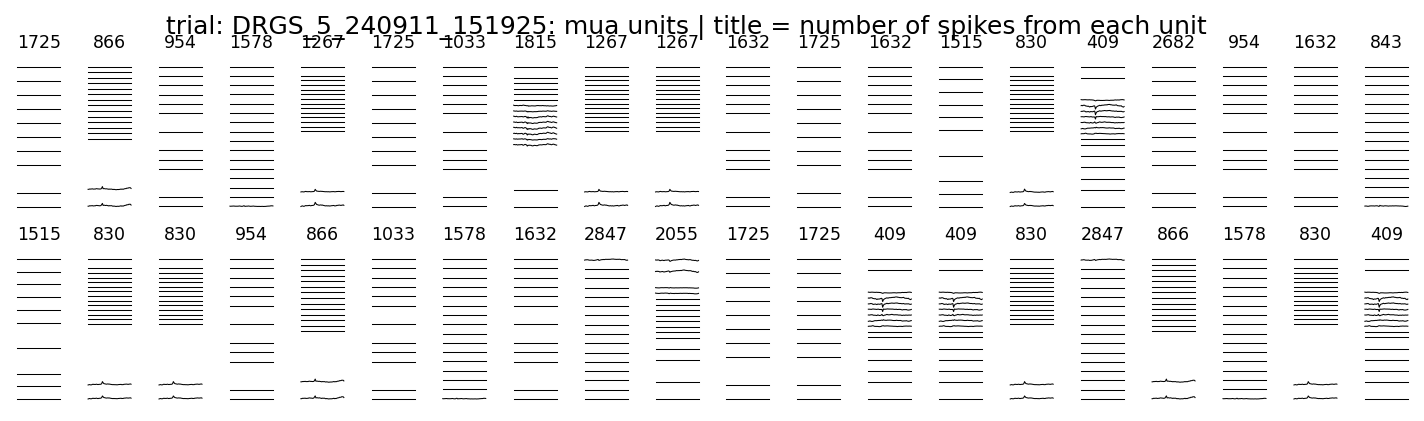

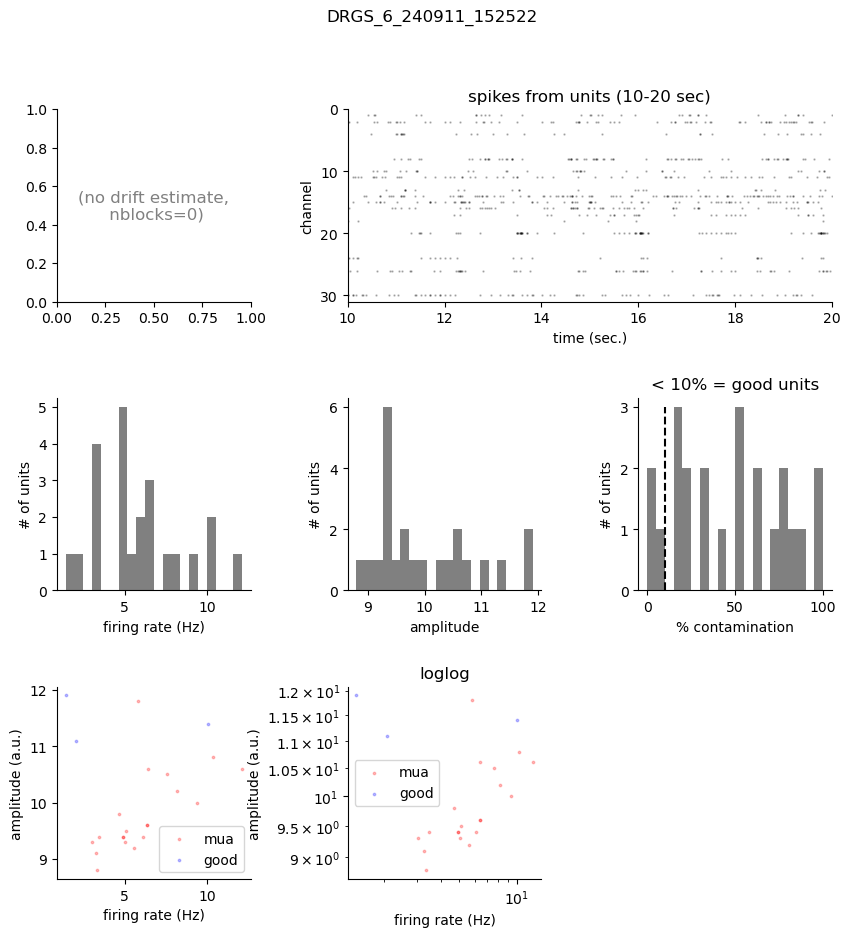

ERROR: could not plot units for DRGS_6_240911_152522, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323\binary\DRGS_7_240911_153255\DW323_DRGS_7_240911_153255_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------

ERROR: could not plot units for DRGS_6_240911_152522, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_6_240911_152522
|
|
|
|
|
|
Running kilosort on DRGS_7_240911_153255
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  0.92s; total  0.93s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    18.10 %
kilosort.run_kilosort: Memory:       83.98 %     |     40.25   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

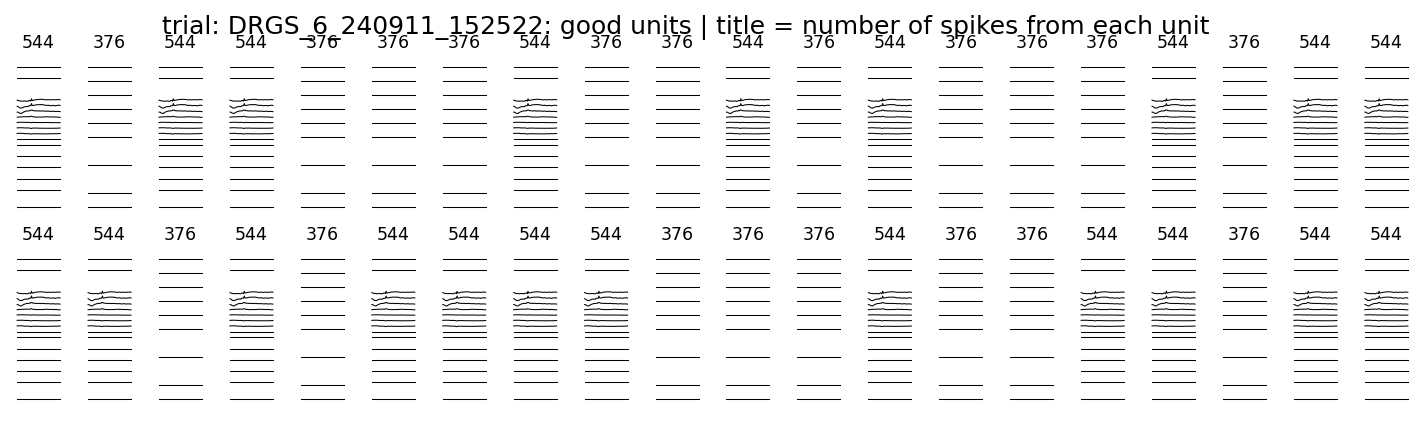

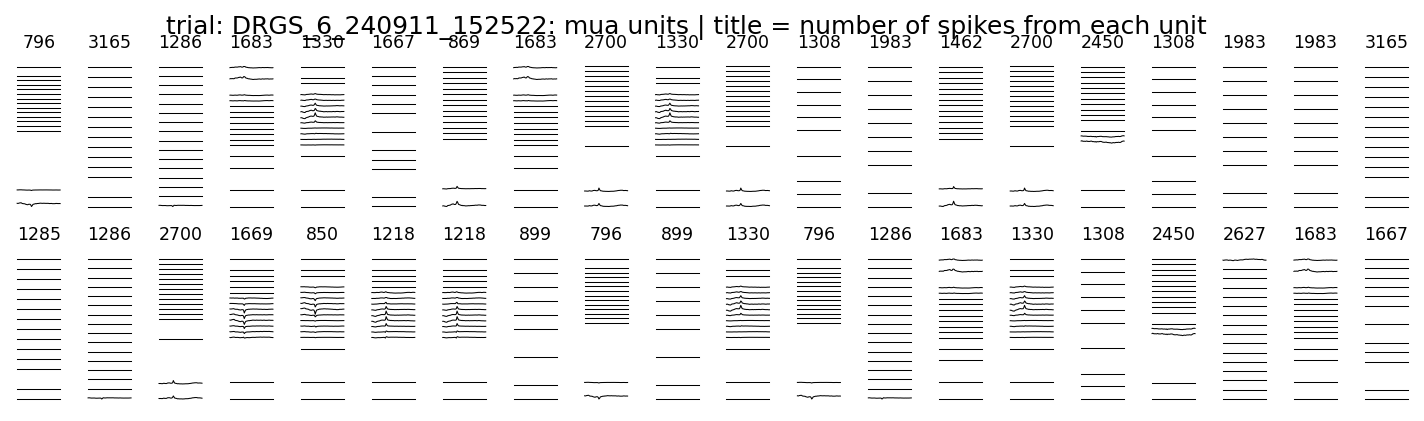

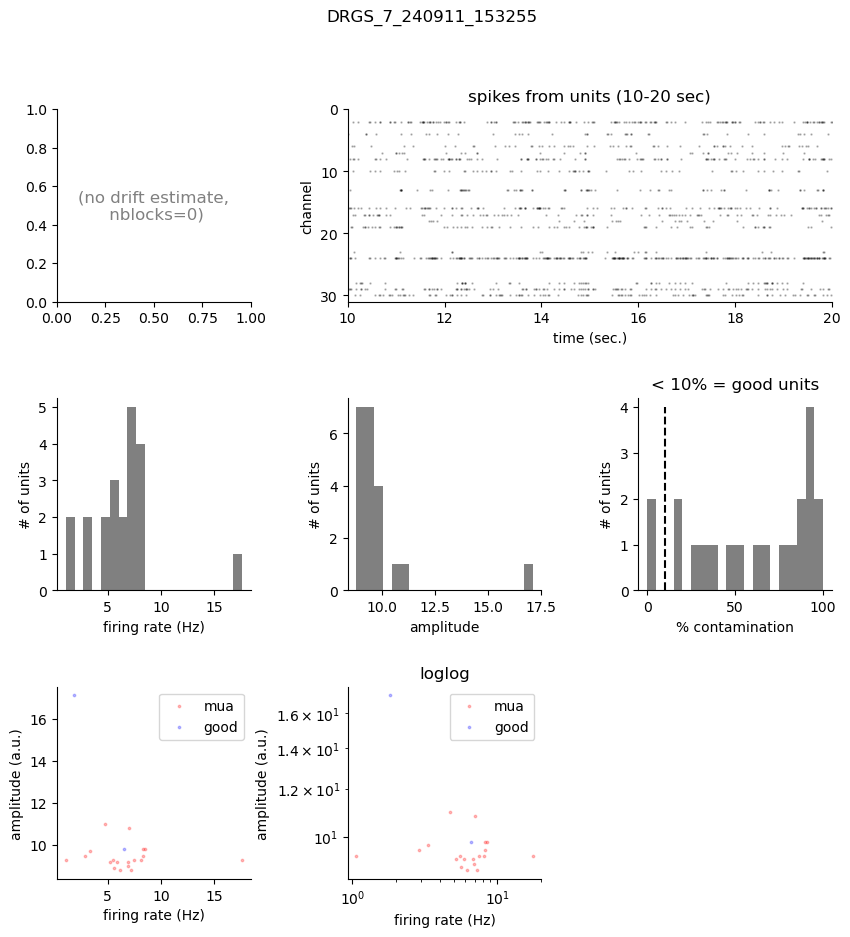

ERROR: could not plot units for DRGS_7_240911_153255, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323\binary\DRGS_8_240911_154319\DW323_DRGS_8_240911_154319_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------

ERROR: could not plot units for DRGS_7_240911_153255, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_7_240911_153255
|
|
|
|
|
|
Running kilosort on DRGS_8_240911_154319
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  1.20s; total  1.20s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    15.10 %
kilosort.run_kilosort: Memory:       84.06 %     |     40.29   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

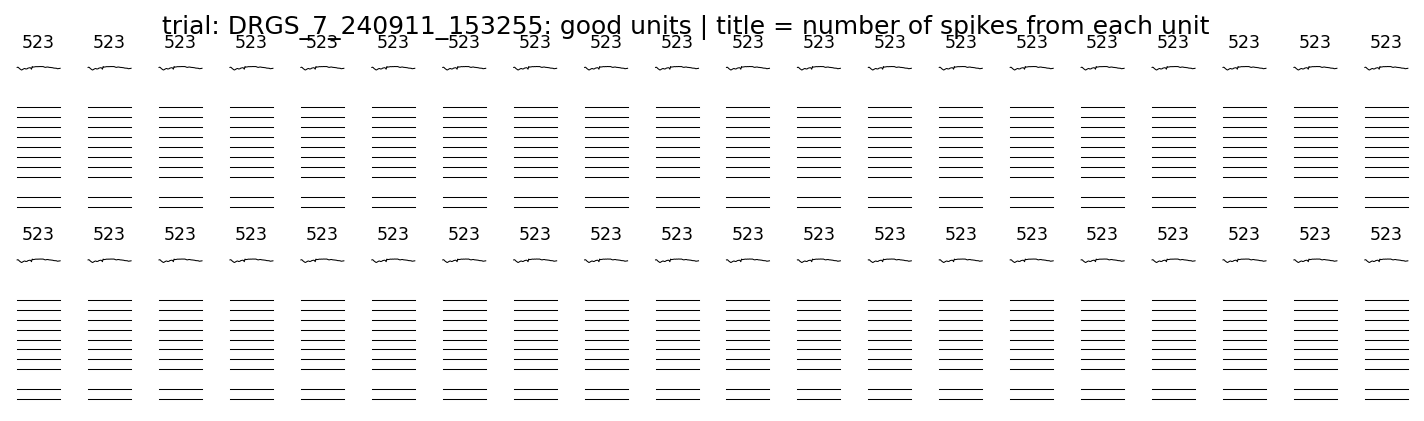

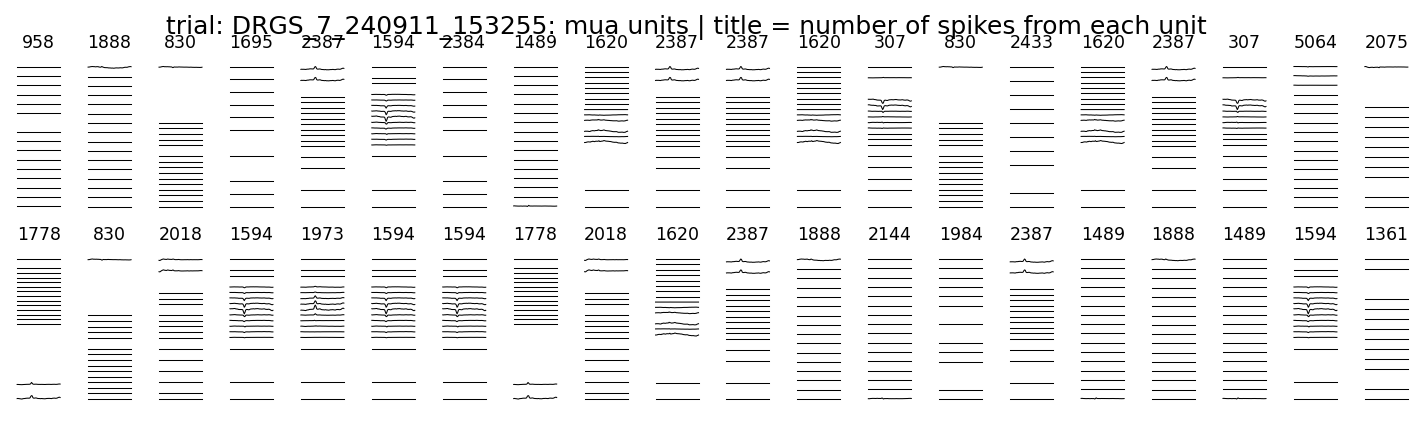

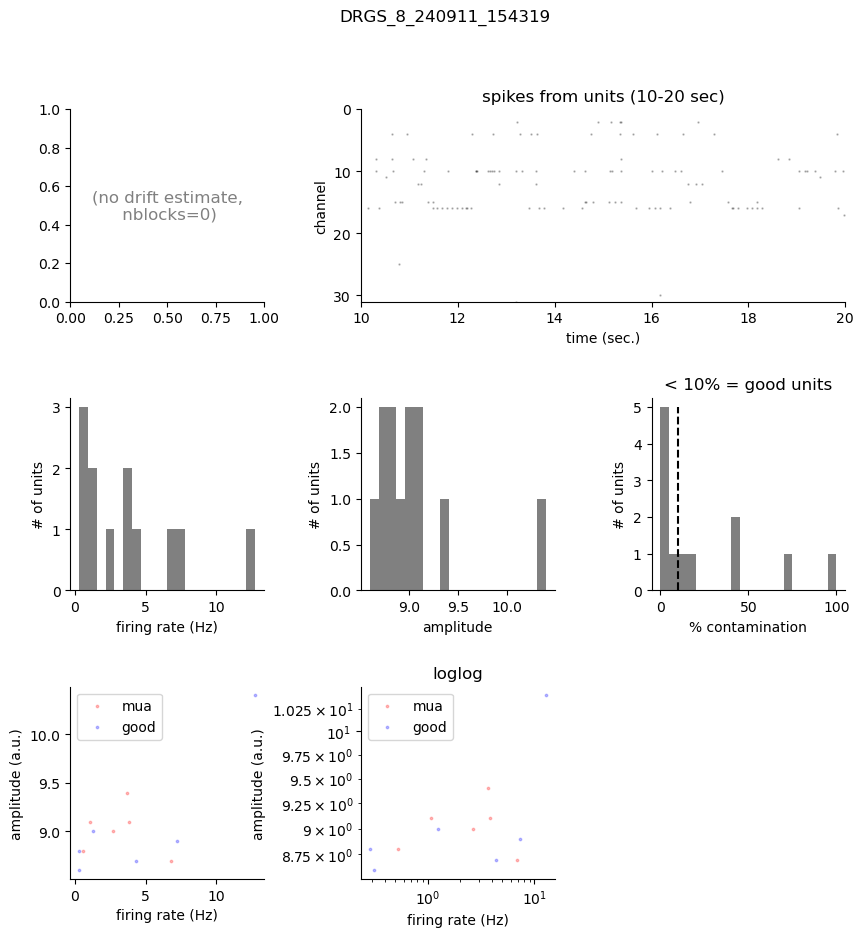

ERROR: could not plot units for DRGS_8_240911_154319, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323\binary\DRGS_9_240911_155057\DW323_DRGS_9_240911_155057_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------------------

ERROR: could not plot units for DRGS_8_240911_154319, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_8_240911_154319
|
|
|
|
|
|
Running kilosort on DRGS_9_240911_155057
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  1.09s; total  1.09s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    16.10 %
kilosort.run_kilosort: Memory:       84.00 %     |     40.26   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

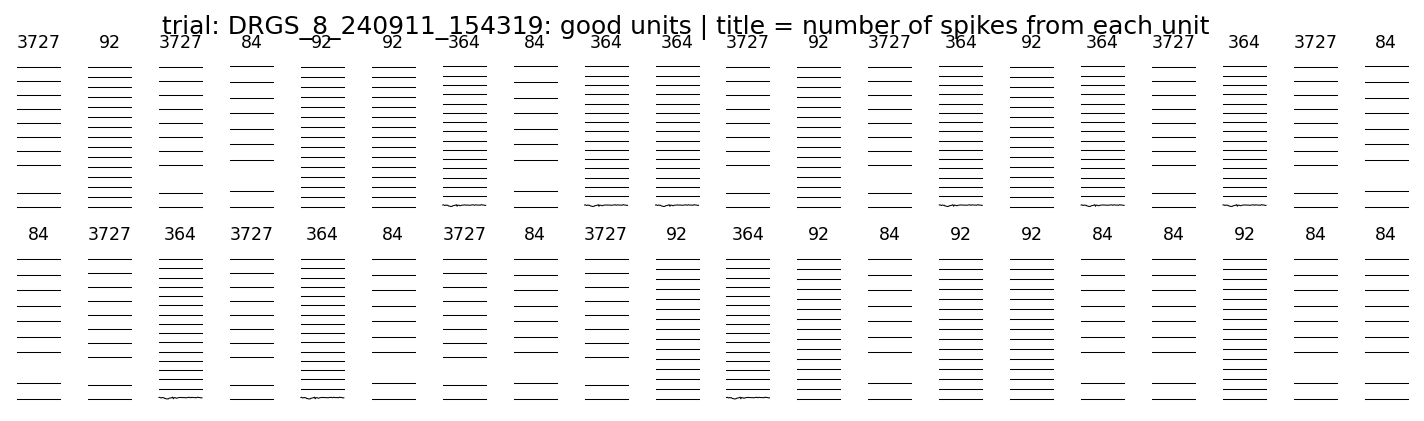

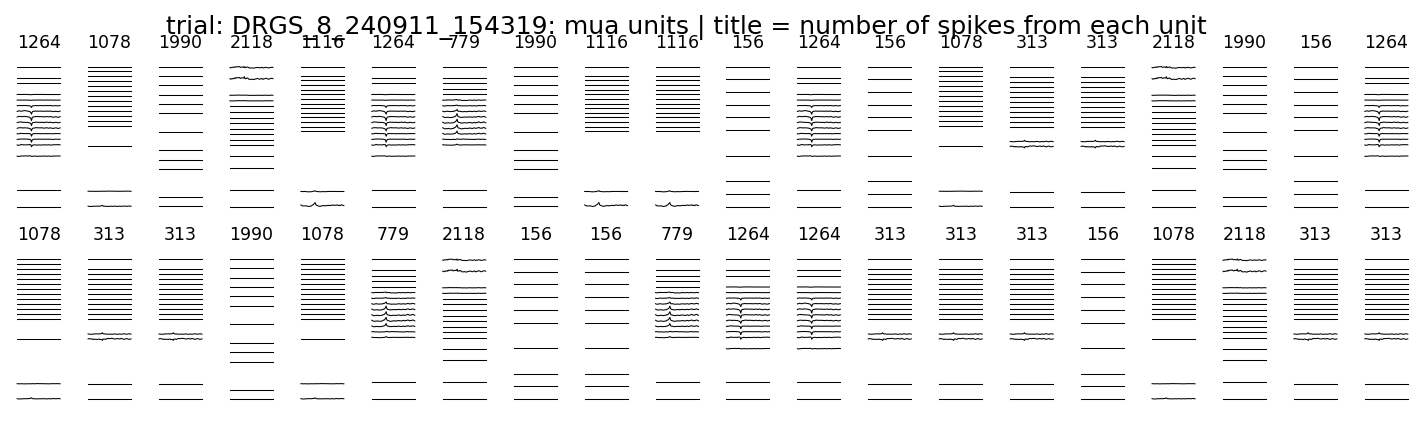

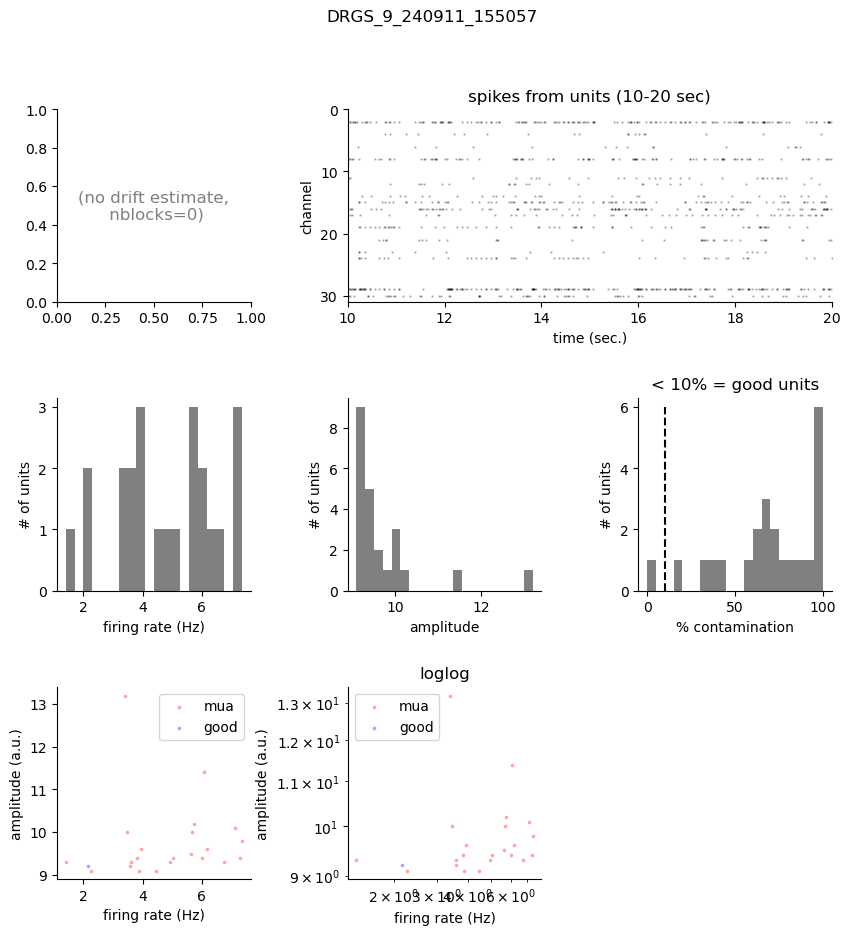

ERROR: could not plot units for DRGS_9_240911_155057, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323\binary\nninsertion_240911_130746\DW323_nninsertion_240911_130746_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ---------------------

ERROR: could not plot units for DRGS_9_240911_155057, mua. skipping plot...
Custom labels applied and saved for trial: DRGS_9_240911_155057
|
|
|
|
|
|
Running kilosort on nninsertion_240911_130746
|
|
|
|
|
|


kilosort.run_kilosort: N samples: 2595584
kilosort.run_kilosort: N seconds: 86.51946666666667
kilosort.run_kilosort: N batches: 2
kilosort.run_kilosort: Preprocessing filters computed in  1.06s; total  1.06s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    14.70 %
kilosort.run_kilosort: Memory:       83.79 %     |     40.16   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilos

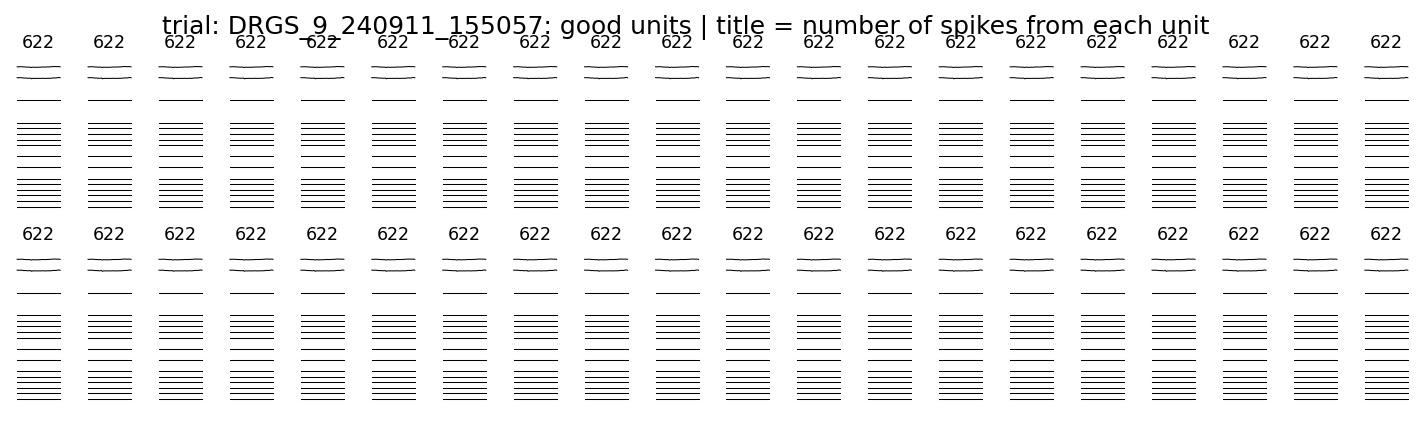

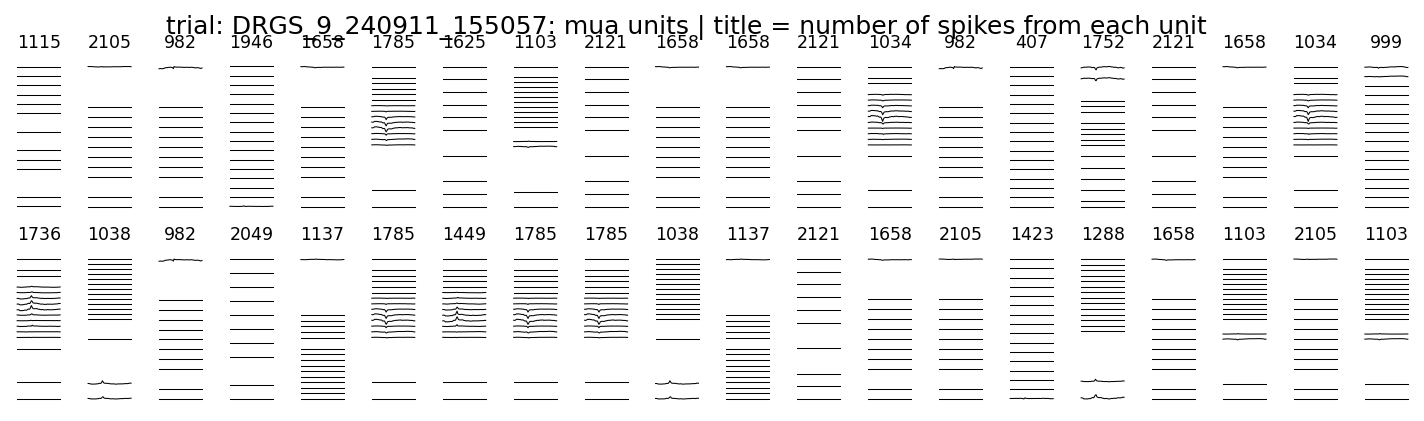

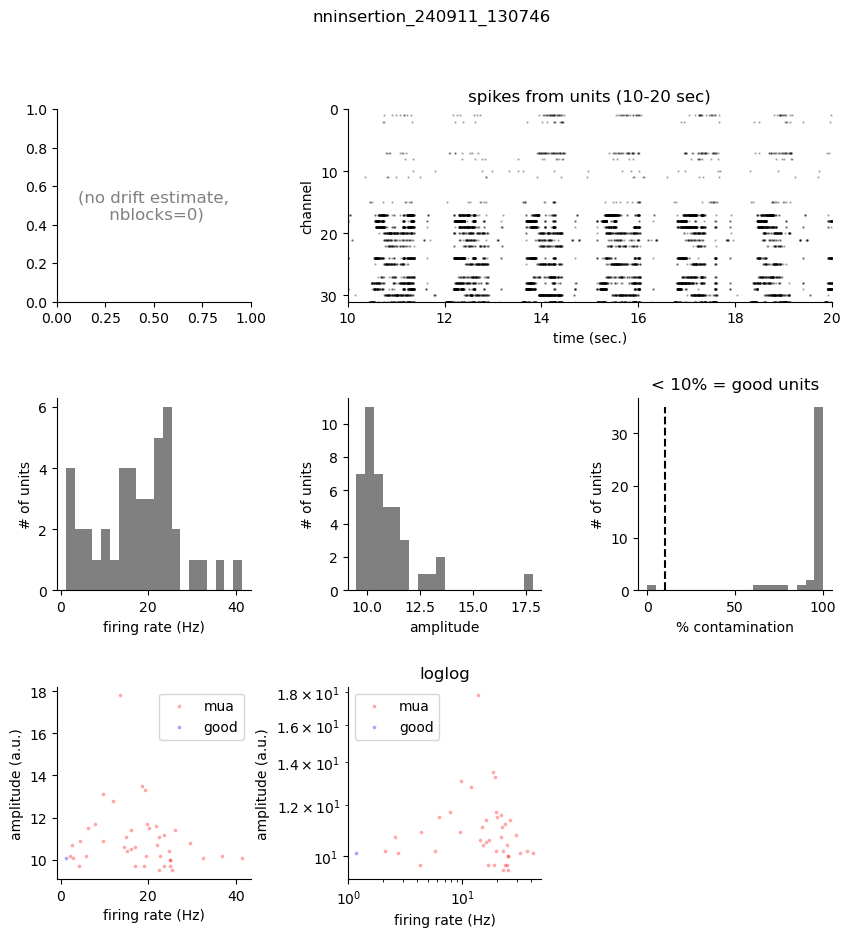

ERROR: could not plot units for nninsertion_240911_130746, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323\binary\nn_seond_insertion_240911_144433\DW323_nn_seond_insertion_240911_144433_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------

ERROR: could not plot units for nninsertion_240911_130746, mua. skipping plot...
Custom labels applied and saved for trial: nninsertion_240911_130746
|
|
|
|
|
|
Running kilosort on nn_seond_insertion_240911_144433
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  0.54s; total  0.54s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    17.40 %
kilosort.run_kilosort: Memory:       83.86 %     |     40.20   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 


error processing data in folder: nn_seond_insertion_240911_144433

An unexpected error occurred:
Found array with 0 sample(s) (shape=(0, 61)) while a minimum of 1 is required by TruncatedSVD.
Error applying custom labels to trial nn_seond_insertion_240911_144433: [Errno 2] No such file or directory: 'D:\\Data\\CMU.80 Data\\88 Analyzed Data\\88.002 Multi rat kilosort export\\DW323\\binary\\nn_seond_insertion_240911_144433\\kilosort4\\ops.npy'
|
|
|
|
|
|
Running kilosort on QST_2_240911_181341
|
|
|
|
|
|


kilosort.run_kilosort: N samples: 5801728
kilosort.run_kilosort: N seconds: 193.39093333333332
kilosort.run_kilosort: N batches: 4
kilosort.run_kilosort: Preprocessing filters computed in  1.09s; total  1.09s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     9.70 %
kilosort.run_kilosort: Memory:       83.25 %     |     39.90   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilo

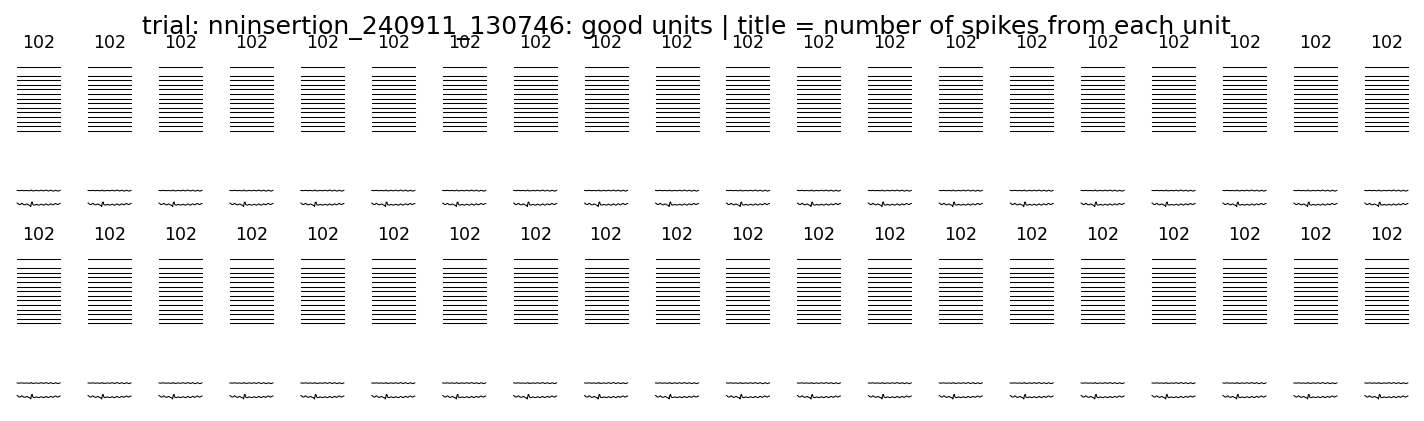

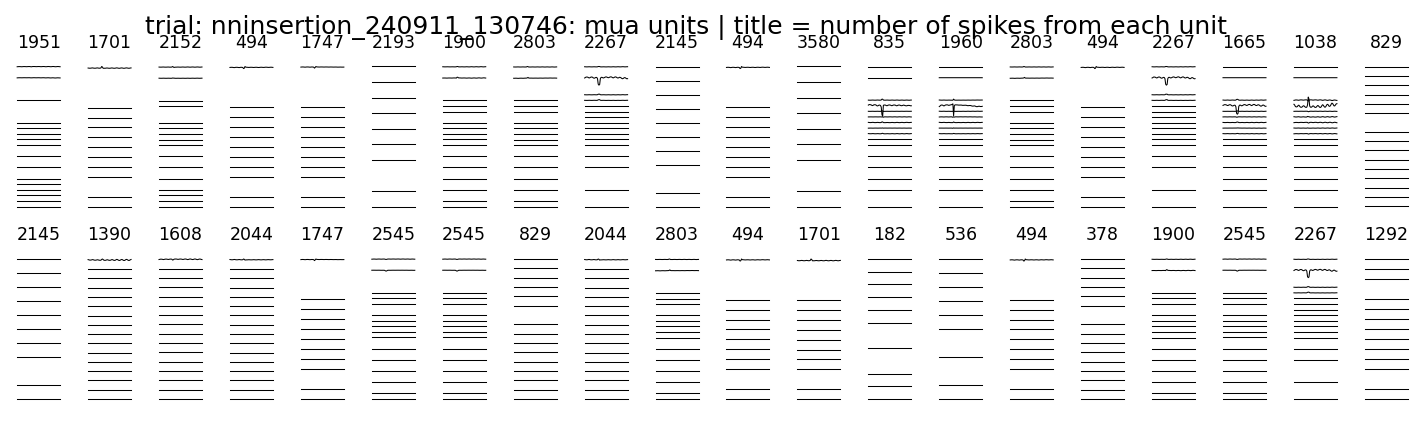

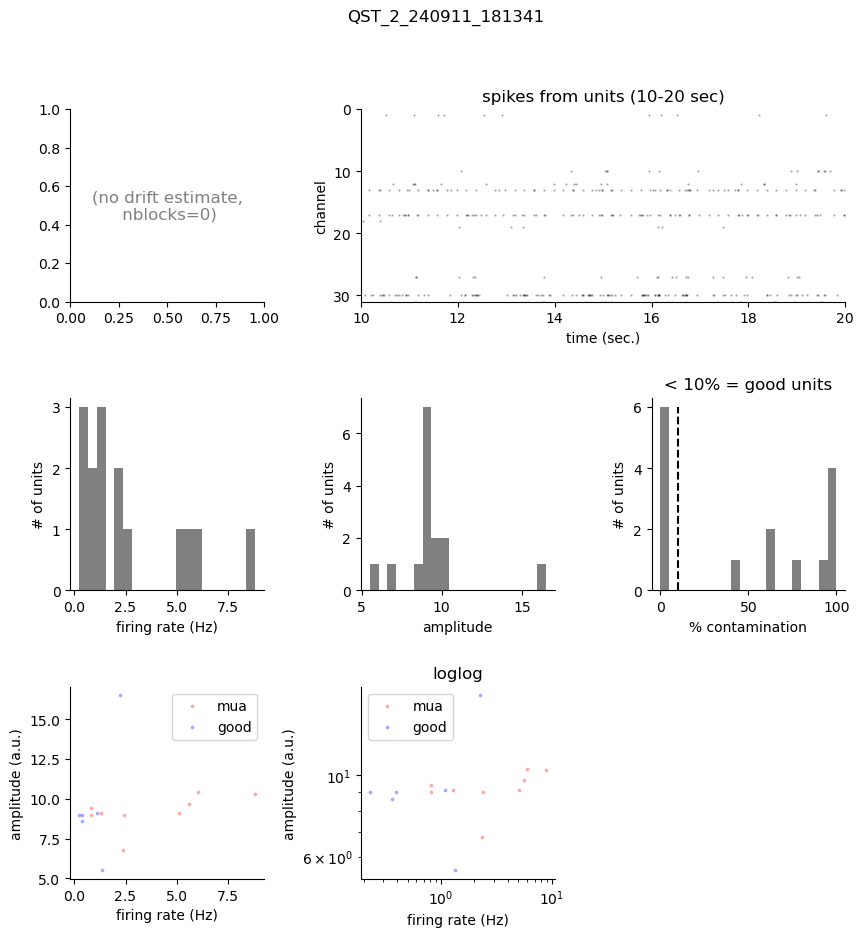

ERROR: could not plot units for QST_2_240911_181341, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323\binary\VF_1_240911_164342\DW323_VF_1_240911_164342_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -----------------------------------

ERROR: could not plot units for QST_2_240911_181341, mua. skipping plot...
Custom labels applied and saved for trial: QST_2_240911_181341
|
|
|
|
|
|
Running kilosort on VF_1_240911_164342
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  1.04s; total  1.04s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    19.10 %
kilosort.run_kilosort: Memory:       83.78 %     |     40.16   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

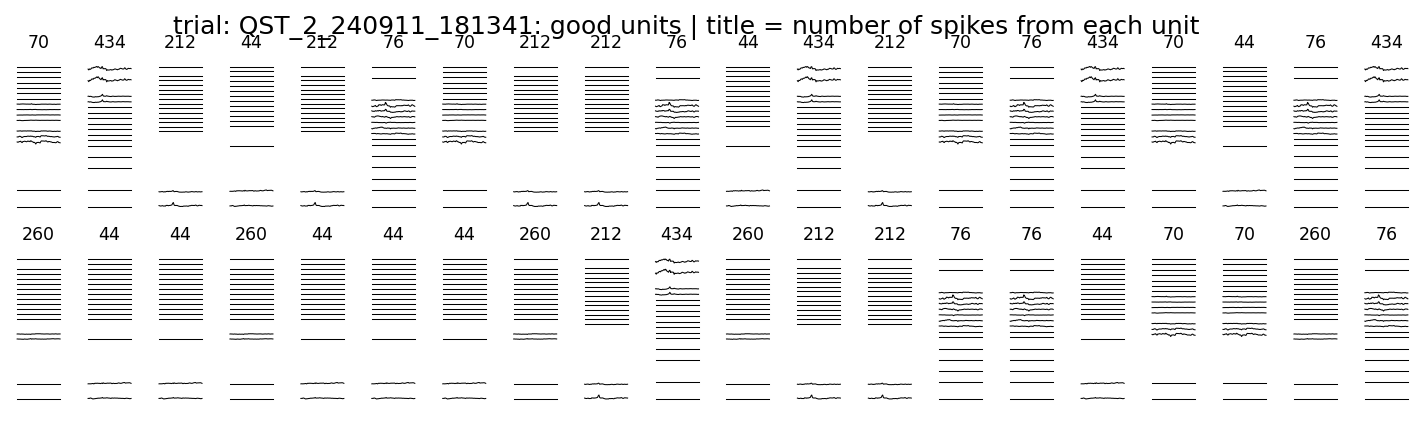

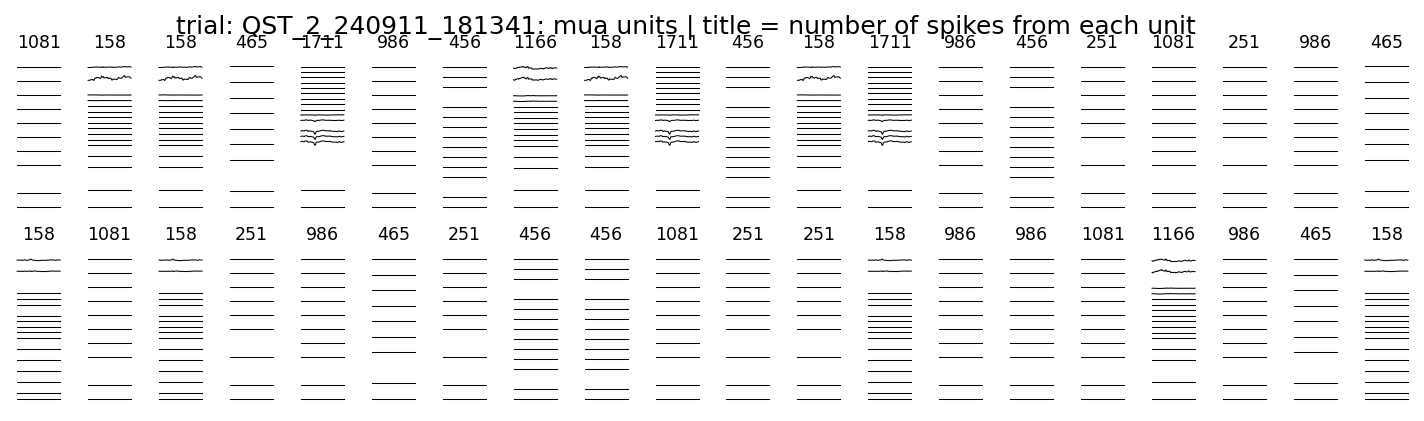

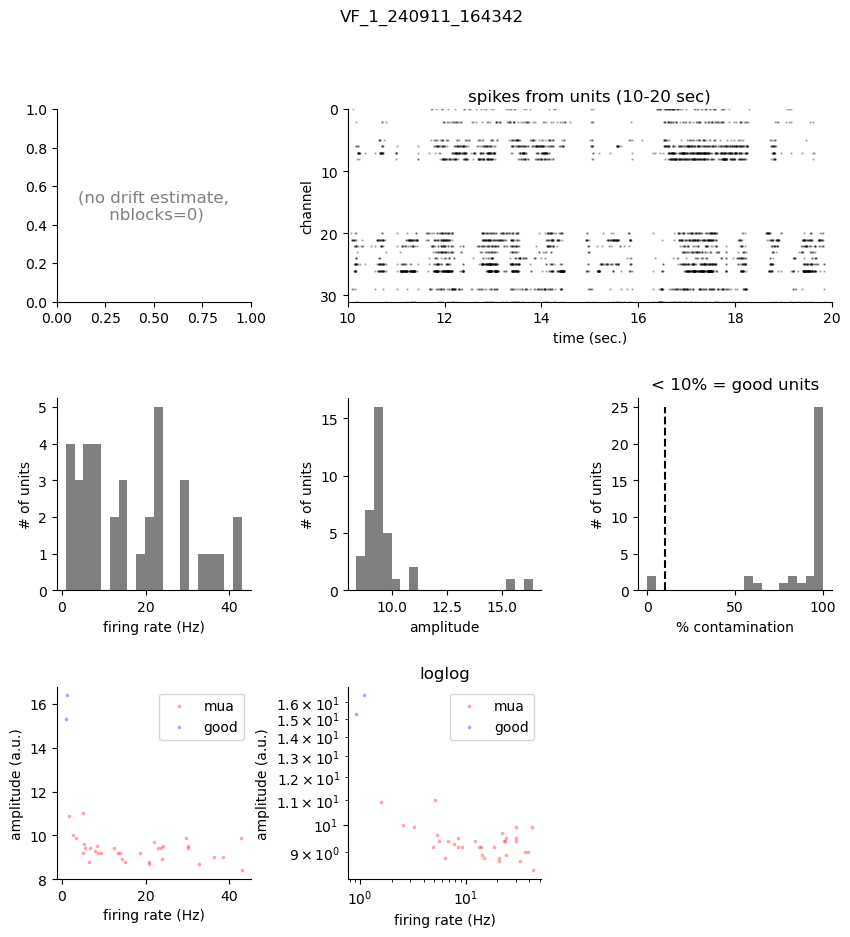

ERROR: could not plot units for VF_1_240911_164342, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323\binary\VF_2_240911_165039\DW323_VF_2_240911_165039_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -----------------------------------

ERROR: could not plot units for VF_1_240911_164342, mua. skipping plot...
Custom labels applied and saved for trial: VF_1_240911_164342
|
|
|
|
|
|
Running kilosort on VF_2_240911_165039
|
|
|
|
|
|


kilosort.run_kilosort: Preprocessing filters computed in  1.26s; total  1.27s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    15.50 %
kilosort.run_kilosort: Memory:       84.31 %     |     40.41   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.datashift: nblocks = 0, 

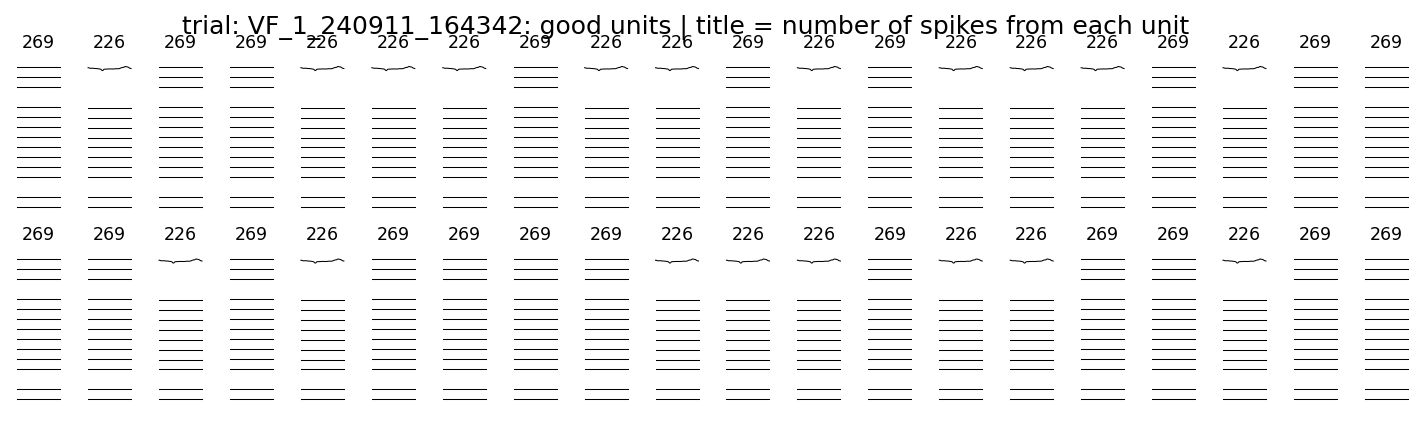

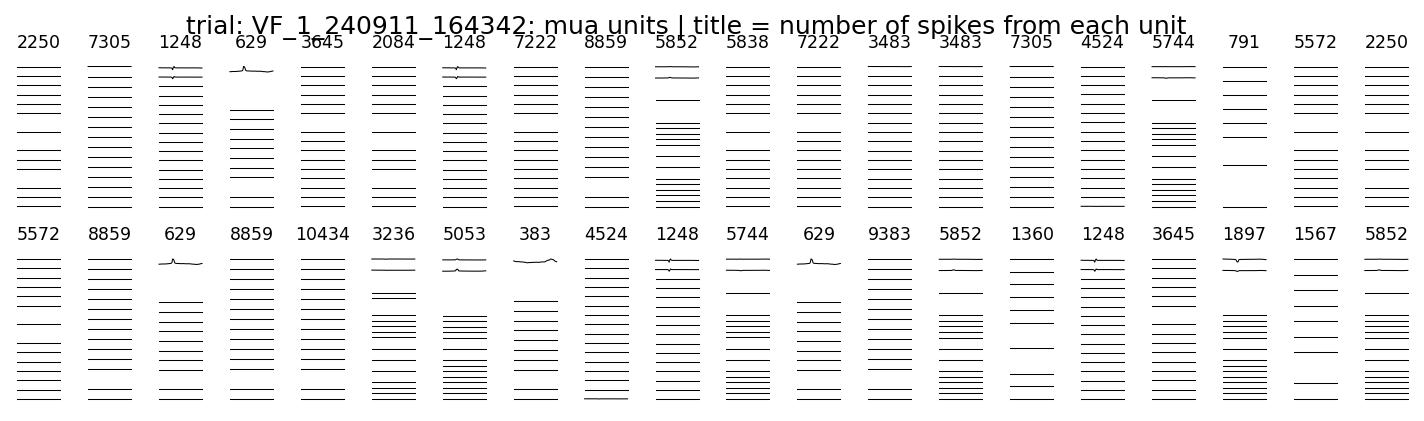

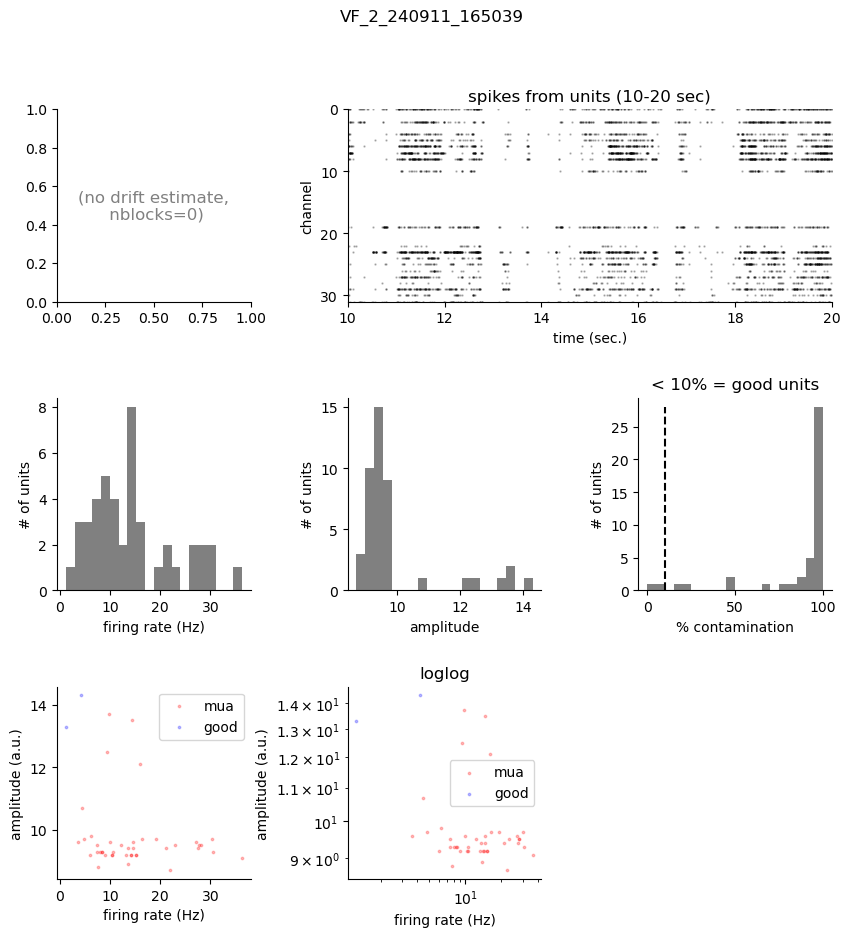

ERROR: could not plot units for VF_2_240911_165039, good. skipping plot...


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\DW323\binary\VF_3_240911_165617\DW323_VF_3_240911_165617_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -----------------------------------

ERROR: could not plot units for VF_2_240911_165039, mua. skipping plot...
Custom labels applied and saved for trial: VF_2_240911_165039
|
|
|
|
|
|
Running kilosort on VF_3_240911_165617
|
|
|
|
|
|


kilosort.run_kilosort: N samples: 7307008
kilosort.run_kilosort: N seconds: 243.56693333333334
kilosort.run_kilosort: N batches: 5
kilosort.run_kilosort: Preprocessing filters computed in  1.21s; total  1.22s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    15.80 %
kilosort.run_kilosort: Memory:       84.07 %     |     40.30   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   100.00 %     |      8.00   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:    50.83 %     |      4.07   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilo

RuntimeError: The expanded size of the tensor (1763) must match the existing size (4687) at non-singleton dimension 0.  Target sizes: [1763].  Tensor sizes: [4687]

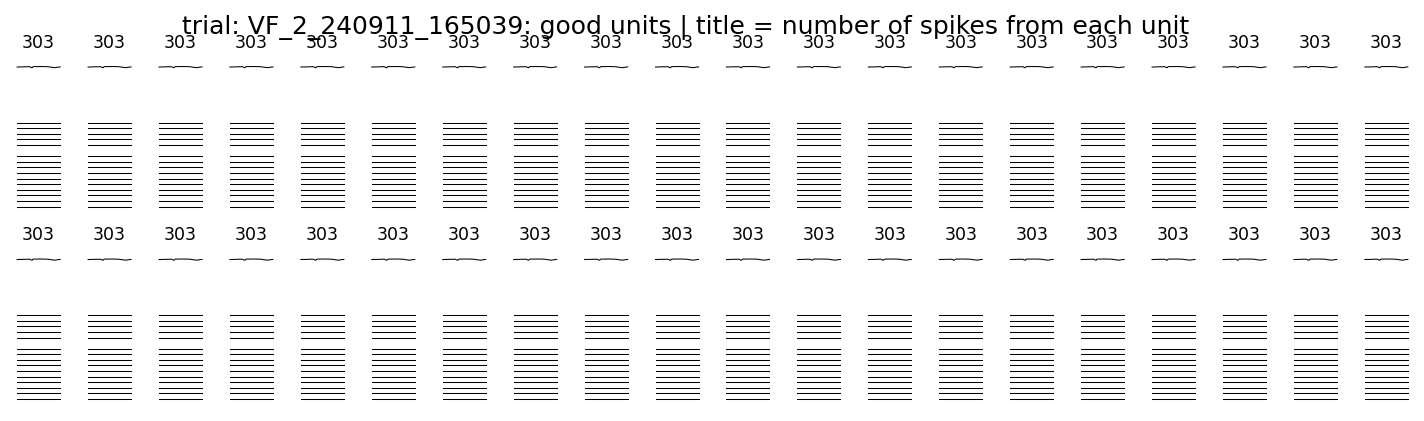

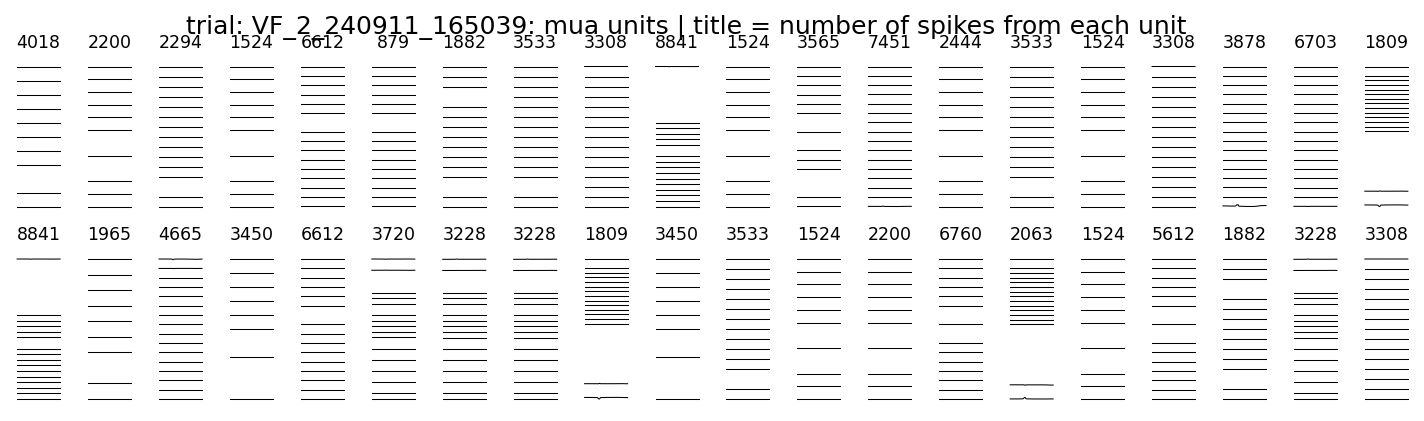

In [16]:
### DW322
spikes_DW322 = Kilosort_wrapper(SAVE_DIRECTORY_DW322, PROBE_DIRECTORY)
# # Run Kilosort and apply custom labels with custom criteria
spikes_DW322.run_kilosort_trial_summary(new_settings="vf_settings",custom_criteria=my_custom_criteria)

### DW323
spikes_DW323 = Kilosort_wrapper(SAVE_DIRECTORY_DW323, PROBE_DIRECTORY)
# # Run Kilosort and apply custom labels with your custom criteria
spikes_DW323.run_kilosort_trial_summary(new_settings="vf_settings",custom_criteria=my_custom_criteria)

### DW327
spikes_DW327 = Kilosort_wrapper(SAVE_DIRECTORY_DW327, PROBE_DIRECTORY)
# # Run Kilosort and apply custom labels with your custom criteria
spikes_DW327.run_kilosort_trial_summary(new_settings="vf_settings",custom_criteria=my_custom_criteria)

extract results

(again, I've already run kilosort so I can skip right to extracting the results)

In [ ]:
spikes_DW322.extract_kilosort_outputs()
spikes_DW323.extract_kilosort_outputs()
spikes_DW327.extract_kilosort_outputs()

##### explanation of output files
- **`ops`**: Loads the Kilosort options dictionary, which includes parameters and processing information.
- **`cluster_amplitudes` & `contamination_percentage`**: Load cluster amplitudes and contamination percentages from TSV files.
- **`channel_mapping`**: Loads the mapping of electrode channels.
- **`templates`**: Loads the spike waveform templates.
- **`chan_best`**: Identifies the best (most representative) channel for each template by finding the channel with the maximum energy (sum of squared amplitudes).
- **`amplitudes`**: Loads the amplitudes of detected spikes.
- **`spike_times`**: Loads spike times, typically in sample indices.
- **`spike_clusters`**: Loads cluster assignments for each spike.
- **`firing_rates`**: Calculates the firing rate for each unit (cluster) by counting the number of spikes and normalizing by the total recording time.
- **`dshift`**: Extracts the drift shift values from the options dictionary, which indicates the movement of the recording probe over time.

# 📊 Calculate firing rate per cluster - `DW327`

---

### steps

        1. Extracts Von Frey windows.
        2. Subdivides into sub-windows.
        3. Computes average voltage for each sub-window.
        4. Computes unit firing rates for each sub-window.

In [ ]:
VF_test = analysis_functions.VonFreyAnalysis(DW327, signals_DW327, spikes_DW237)
# VF_test.extract_von_frey_windows() # this works, but it also rungs when I run the extract_cluster_firing_rates
# VF_test.compute_unit_firing_rates()
# VF_test.extract_von_frey_windows()

# Extract the main Von Frey windows
# intervals_dict = VF_test.extract_von_frey_windows()

# Subdivide the windows into smaller sub-windows of a chosen width (e.g., 0.5 seconds)
subwindows_dict = VF_test.subdivide_intervals(VF_test.extract_von_frey_windows(), subwindow_width=0.5)

# Compute average voltage and unit firing rates for these smaller sub-windows
# The analyze_subwindows method internally calls subdivide_intervals, compute_average_von_frey_voltage, and compute_unit_firing_rates_for_subwindows
VF_test.analyze_subwindows(subwindow_width=0.5)

# # to look at the results, you can use the dictionary keys like this:
# avg_voltage_df = results["VF_10_241125_162725"]["avg_voltage_df"]
# firing_rates_df = results["VF_10_241125_162725"]["firing_rates_df"]

In [ ]:
avg_voltage_df = VF_test.windowed_results["VF_9_241125_162141"]["avg_voltage_df"]
avg_voltage_df

In [ ]:
firing_rates_df = VF_test.windowed_results["VF_9_241125_162141"]["firing_rates_df"]
firing_rates_df

In [ ]:
plots.vf_pre_post_stim_per_trial(VF_test)

In [ ]:
plots.vf_pre_post_stim_all_trials(VF_test)